## Final ML project: Telco_customer_churn

### Problem state: 

In a telco industry, lots of factors will affect customer to churn, i.e., stop the service. As attracting a new customer is much more costly than retaining an existing customer. To identify the potential 'churn' customers in the following period via Machine Learning is very valuable for Telco companys. Based on the ML prediction, it can further target these predicted 'churn' customers rather than randomly or equally targeting the existing customers. To maximize the bussiness value, we want to identify all potential 'churn' customers. Meanwhile, we also want the accuracy of ML model. If the accuracy is not good, we may target the false 'predicted' churn customer and miss the real ones.

In [88]:
### all libraries used information
import pandas as pd
import numpy as np
# warnings ignore
import warnings
warnings.filterwarnings('ignore')
# plot
import matplotlib.pyplot as plt
import seaborn as sns
#plot in a map
import math
import folium
from folium.plugins import MarkerCluster
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap
#calculate distance
!pip install geopy
import geopy
from geopy.distance import geodesic
# feature
from sklearn.metrics import mutual_info_score
# Normalization
from sklearn.preprocessing import MinMaxScaler
# data splitting
from sklearn.model_selection import train_test_split
# models
!pip install lightgbm
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.cluster import KMeans
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
# sampling method
from imblearn.over_sampling import SMOTE
# metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn.metrics import classification_report
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [89]:
### load dataset

# set the dataset location
Path = 'F:bootcamp/projects/Final project/'
# set the name of dataset
file_name = 'Telco_customer_churn'

# write a function to load data
def LoadData(path, file):
    df = pd.read_excel(path + file + '.xlsx')
    print ("Original Input Dataset: ",df.shape[0],"customers information, and ",df.shape[1],"features")
    return df

# load original data
df = LoadData(Path, file_name)

Original Input Dataset:  7043 customers information, and  33 features


### Data Overview

In [90]:
# display full dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [91]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [93]:
# statistic of numerical features
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [94]:
# write a data report on each column about missing, unique value, and numbers which help to decide some features may not be used for churn prediction.
def report(dataframe):
    col = []
    d_type = []
    missing = []
    uniques = []
    n_uniques = []
    for column in df.columns:
        col.append(column)
        d_type.append(df[column].dtypes)
        missing.append(df[column].isnull().sum())
        uniques.append(df[column].unique()[:5]) # just show 5 unique values as example
        n_uniques.append(df[column].nunique())
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'Numbers of Missing Value': missing, 'unique_value': uniques, 'n_uniques': n_uniques})

report(df)

Column   d_type  Numbers of Missing Value  \
0          CustomerID   object                         0   
1               Count    int64                         0   
2             Country   object                         0   
3               State   object                         0   
4                City   object                         0   
5            Zip Code    int64                         0   
6            Lat Long   object                         0   
7            Latitude  float64                         0   
8           Longitude  float64                         0   
9              Gender   object                         0   
10     Senior Citizen   object                         0   
11            Partner   object                         0   
12         Dependents   object                         0   
13      Tenure Months    int64                         0   
14      Phone Service   object                         0   
15     Multiple Lines   object                         0   
16   Internet Service   object                         0   
17    Online Security   object                         0   
18      Online Backup   object                         0   
19  Device Protection   object                         0   
20       Tech Support   object                         0   
21       Streaming TV   object                         0   
22   Streaming Movies   object                         0   
23           Contract   object                         0   
24  Paperless Billing   object                         0   
25     Payment Method   object                         0   
26    Monthly Charges  float64                         0   
27      Total Charges   object                         0   
28        Churn Label   object                         0   
29        Churn Value    int64                         0   
30        Churn Score    int64                         0   
31               CLTV    int64                         0   
32       Churn Reason   object                      5174   

                                         unique_value  n_uniques  
0   [3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...       7043  
1                                                 [1]          1  
2                                     [United States]          1  
3                                        [California]          1  
4   [Los Angeles, Beverly Hills, Huntington Park, ...       1129  
5                 [90003, 90005, 90006, 90010, 90015]       1652  
6   [33.964131, -118.272783, 34.059281, -118.30742...       1652  
7   [33.964131, 34.059281, 34.048013, 34.062125, 3...       1652  
8   [-118.272783, -118.30742, -118.293953, -118.31...       1651  
9                                      [Male, Female]          2  
10                                          [No, Yes]          2  
11                                          [No, Yes]          2  
12                                          [No, Yes]          2  
13                                 [2, 8, 28, 49, 10]         73  
14                                          [Yes, No]          2  
15                        [No, Yes, No phone service]          3  
16                             [DSL, Fiber optic, No]          3  
17                     [Yes, No, No internet service]          3  
18                     [Yes, No, No internet service]          3  
19                     [No, Yes, No internet service]          3  
20                     [No, Yes, No internet service]          3  
21                     [No, Yes, No internet service]          3  
22                     [No, Yes, No internet service]          3  
23               [Month-to-month, Two year, One year]          3  
24                                          [Yes, No]          2  
25  [Mailed check, Electronic check, Bank transfer...          4  
26                 [53.85, 70.7, 99.65, 104.8, 103.7]       1585  
27           [108.15, 151.65, 820.5, 3046.05, 5036.3]       6531  
28                             

#### Note:

#### We have 5 different information aspects of data:

##### 1) Demographics: CustomerID, Count, Gender, Senior Citizen, Partner, Dependent. (Total: 6)
##### 2) Location：Country, State, City, Zipcode, Lat Long, Latitude, Longtitude. (Total: 7)
##### 3) Customer Account Info: Tenure Months, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges. (Total: 6)
##### 4) Service Info: Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies. (Total: 9)
##### 5) Churn Status: Churn Label, Churn Value, Churn Score, CLTV, Churn Reason (Total: 5)

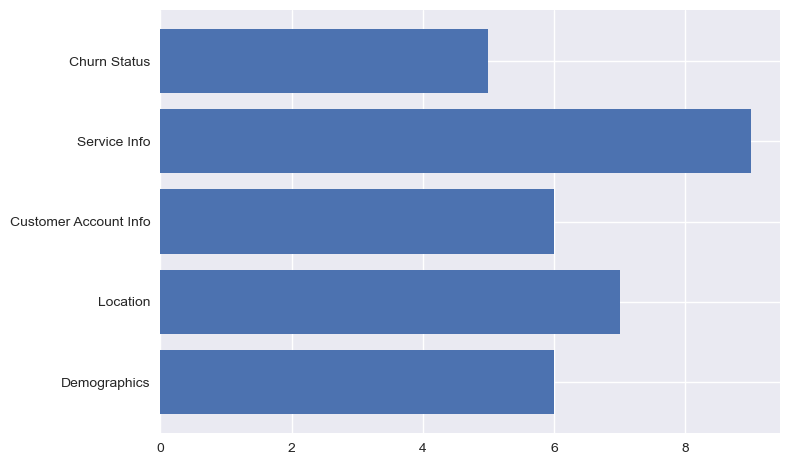

In [95]:
# plot histgram of data aspects info summary
dict_data_aspect = {'Demographics': 6 , 'Location': 7, 'Customer Account Info': 6, 'Service Info': 9, 'Churn Status': 5}
plt.barh(range(len(dict_data_aspect)), list(dict_data_aspect.values()),tick_label = list(dict_data_aspect.keys()))
plt.show()

### Data Cleaning, Visualization, EDA, and Processing

#### Look at the type of data in each column and non-null data. We found that except Churn Reason, we do not have any non-null data. Accurately, we plan to drop the Churn Reason data for modeling, the reason will be given once we reach here. So now we just leave churn reason here.
#### There is one abnormal data, which is Total Charges. It should be numerical type like Monthly Charges instead of object type.

In [96]:
#Convert it to numerical data for Total Charges Column
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].isnull().sum()

11

##### Since the numbers of missing data in Total Charges are just 11 in comparison with total 7043 data(i.e., 11/7043 = 0.156%), we could directly drop them.

In [97]:
df = df.dropna(subset = ['Total Charges'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

#### Look at the location data contain country, state, city, zipcode,Lat Long, Lattitude, Longitude 

In [99]:
#Country and State columns contain one data value for all customers, which means nothing to affect churn, we will drop these columns.
df.drop(columns=['Country', 'State'], inplace=True)
df.head()

CustomerID  Count         City  Zip Code                Lat Long  \
0  3668-QPYBK      1  Los Angeles     90003  33.964131, -118.272783   
1  9237-HQITU      1  Los Angeles     90005   34.059281, -118.30742   
2  9305-CDSKC      1  Los Angeles     90006  34.048013, -118.293953   
3  7892-POOKP      1  Los Angeles     90010  34.062125, -118.315709   
4  0280-XJGEX      1  Los Angeles     90015  34.039224, -118.266293   

    Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
0  33.964131 -118.272783    Male             No      No         No   
1  34.059281 -118.307420  Female             No      No        Yes   
2  34.048013 -118.293953  Female             No      No        Yes   
3  34.062125 -118.315709  Female             No     Yes        Yes   
4  34.039224 -118.266293    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  \
0              2           Yes             No              DSL   
1              2           Yes             No      Fiber optic   
2              8           Yes            Yes      Fiber optic   
3             28           Yes            Yes      Fiber optic   
4             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges  Total Charges Churn Label  \
0               Mailed check            53.85         108.15         Yes   
1           Electronic check            70.70         151.65         Yes   
2           Electronic check            99.65         820.50         Yes   
3           Electronic check           104.80        3046.05         Yes   
4  Bank transfer (automatic)           103.70        5036.30         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

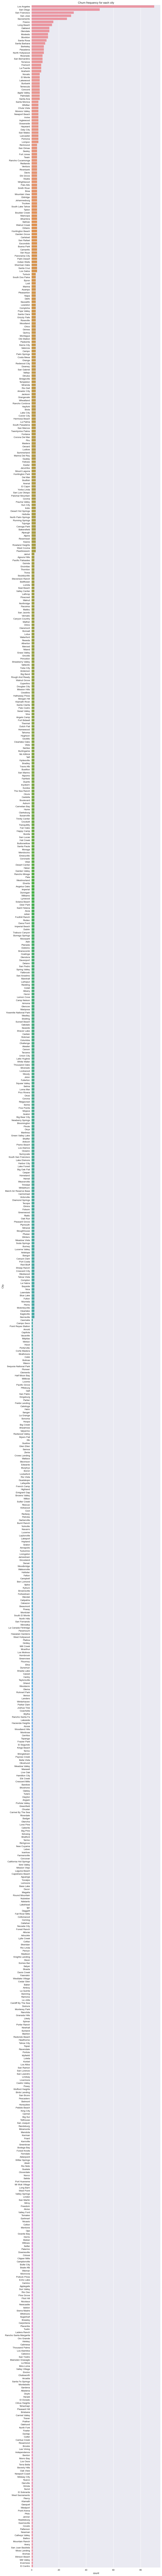

In [100]:
#We have 1129 unique values in City. Let us firstly find out which City have high churn rate.
df_churn = df[df['Churn Value'] == 1]
df_churn_City = df_churn['City']
plt.figure(figsize=(10,200))
sns.countplot(y = df_churn_City, order = df_churn_City.value_counts().index)
plt.title('Churn frequency for each city')
plt.savefig('f:bootcamp/projects/Final project/City churn rate distribution.png',dpi = 300)
plt.show()

#### Note: The top 5 cities have the most churn frequency: Los Angeles, San Diego, San Francisco, San Jose, and Sacramento.

##### Below I used folium library to identify which areas concentrate churners and get more immediate actions. Based on this idea at the feature engineering part of code distances are calculated for every customer from five major parts of California that has the most high churn frequency. This allows us to get advantage of the lat/long coordinates giving useful information.

In [101]:
#write a churn map function
def MapLocations(data):
    data['Latitude'] = data['Latitude'].astype(float)
    data['Longitude'] = data['Longitude'].astype(float)
    
    data_churn_map = data[data['Churn Value'] == 1]
    data_churn_map = data_churn_map[['Latitude', 'Longitude']]
    data_churn_map = data_churn_map.dropna(axis=0, subset=['Latitude','Longitude'])
    
    #create the map
    m = folium.Map(location=[33.964131,-118.272783], tiles='openstreetmap', zoom_start=5)
    #add points to the map
    mc = MarkerCluster()
    for idx, row in data_churn_map.iterrows():
        if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
            mc.add_child(Marker([row['Latitude'], row['Longitude']]))
    m.add_child(mc)

    heat_data = [[row['Latitude'],row['Longitude']] for index, row in data_churn_map.iterrows()]
    HeatMap(heat_data).add_to(m)
    m.save("f:bootcamp/projects/Final project/heat_map.html")
    
    return m

MapLocations(df)

#### Note: The churn frequency has something related to location data. As mentioned before, Los Angeles, San Diego, San Francisco, San Jose, and Sacramento have the highest churn frequency. It was also found that distance far from these cities has less churn frequency. So, instead of using detailed Zipcode, City Name, Latitude, Longitude, or Lat Long, we can calculate the distance from each city as new features.

In [102]:
# write a function to calculate distance from these 5 cities
def cal_distance(location, set_coord):   
    distance = geodesic(location, set_coord)  
    return distance.kilometers

In [103]:
#source from https://latitudelongitude.org/
los_angeles = (34.052235, -118.243683)
san_diego = (32.715736, -117.161087)
san_francisco = (37.773972, -122.431297)
san_jose = (37.33939, -121.89496)
sacramento = (38.575764, -121.478851)
df['los_angeles_distance'] = df.apply(lambda x: cal_distance((x['Latitude'],x['Longitude']),los_angeles), axis = 1)
df['san_diego_distance'] = df.apply(lambda x: cal_distance((x['Latitude'],x['Longitude']),san_diego), axis = 1)
df['san_francisco_distance'] = df.apply(lambda x: cal_distance((x['Latitude'],x['Longitude']),san_francisco), axis = 1)
df['san_jose_distance'] = df.apply(lambda x: cal_distance((x['Latitude'],x['Longitude']), san_jose), axis = 1)
df['sacramento_distance'] = df.apply(lambda x: cal_distance((x['Latitude'],x['Longitude']),sacramento), axis = 1)

In [104]:
#drop Zipcode, Latitude, Longitue, Lat Long, City columns
df.drop(columns=['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              7032 non-null   object 
 1   Count                   7032 non-null   int64  
 2   Gender                  7032 non-null   object 
 3   Senior Citizen          7032 non-null   object 
 4   Partner                 7032 non-null   object 
 5   Dependents              7032 non-null   object 
 6   Tenure Months           7032 non-null   int64  
 7   Phone Service           7032 non-null   object 
 8   Multiple Lines          7032 non-null   object 
 9   Internet Service        7032 non-null   object 
 10  Online Security         7032 non-null   object 
 11  Online Backup           7032 non-null   object 
 12  Device Protection       7032 non-null   object 
 13  Tech Support            7032 non-null   object 
 14  Streaming TV            7032 non-null   

#### Look at Churn Status Data inclusing Churn Label, Churn Value, Churn Score, Churn Reason, CLTV

#### Note: From the unique data values, CustomerID and Count are worthless to explain churn results. Therefore, I choose to drop these items. In addition, Churn Label, Churn Score, Churn Reason should be also dropped since they essentially are the same as Churn Value. CLTV will be kept.

In [105]:
df.drop(columns=['CustomerID', 'Count', 'Churn Label', 'Churn Score', 'Churn Reason'], inplace=True)

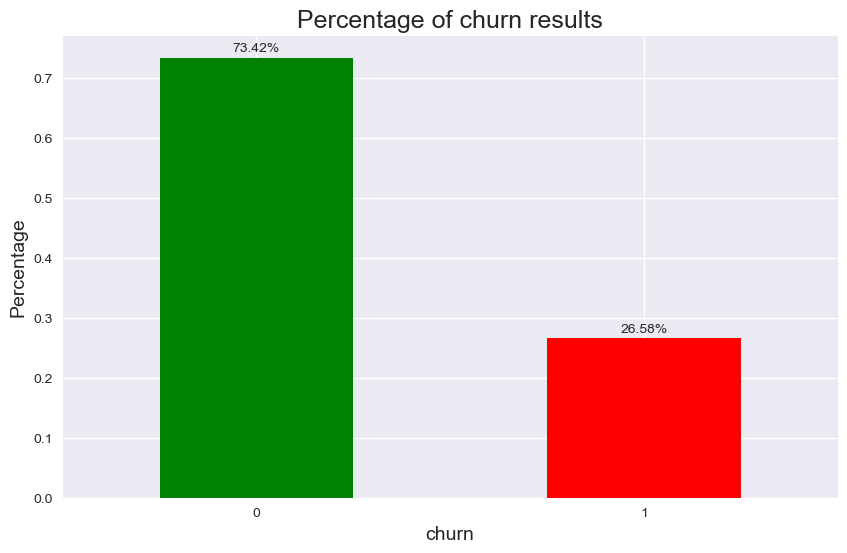

In [106]:
# Check Target Variable, i.e., Churn Value, whether has imbalance or not.
fig, ax = plt.subplots(figsize = (10, 6))
perc_target = df['Churn Value'].value_counts(normalize = True)
perc_target = perc_target.plot(kind = 'bar', ax = ax, color = ['green', 'red'])
ax.set_title('Percentage of churn results', fontsize = 18)
ax.set_xlabel('churn',fontsize=14)
ax.set_ylabel('Percentage',fontsize=14)
ax.tick_params(rotation='auto')
for p in perc_target.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() / 2, y=height+.01, s="{:0.2f}%".format(height*100),ha='center')
plt.show()    

#### Note: As shown above, '0', i.e., no churn, is a majority class (73.42%). It may have imbalance issue when modeling.

### Look at the Demographic data Vs. Churn Value after dropping CustomerID and Count

#### Gender, Senior Citizen, Partner, Dependents are categorical data.

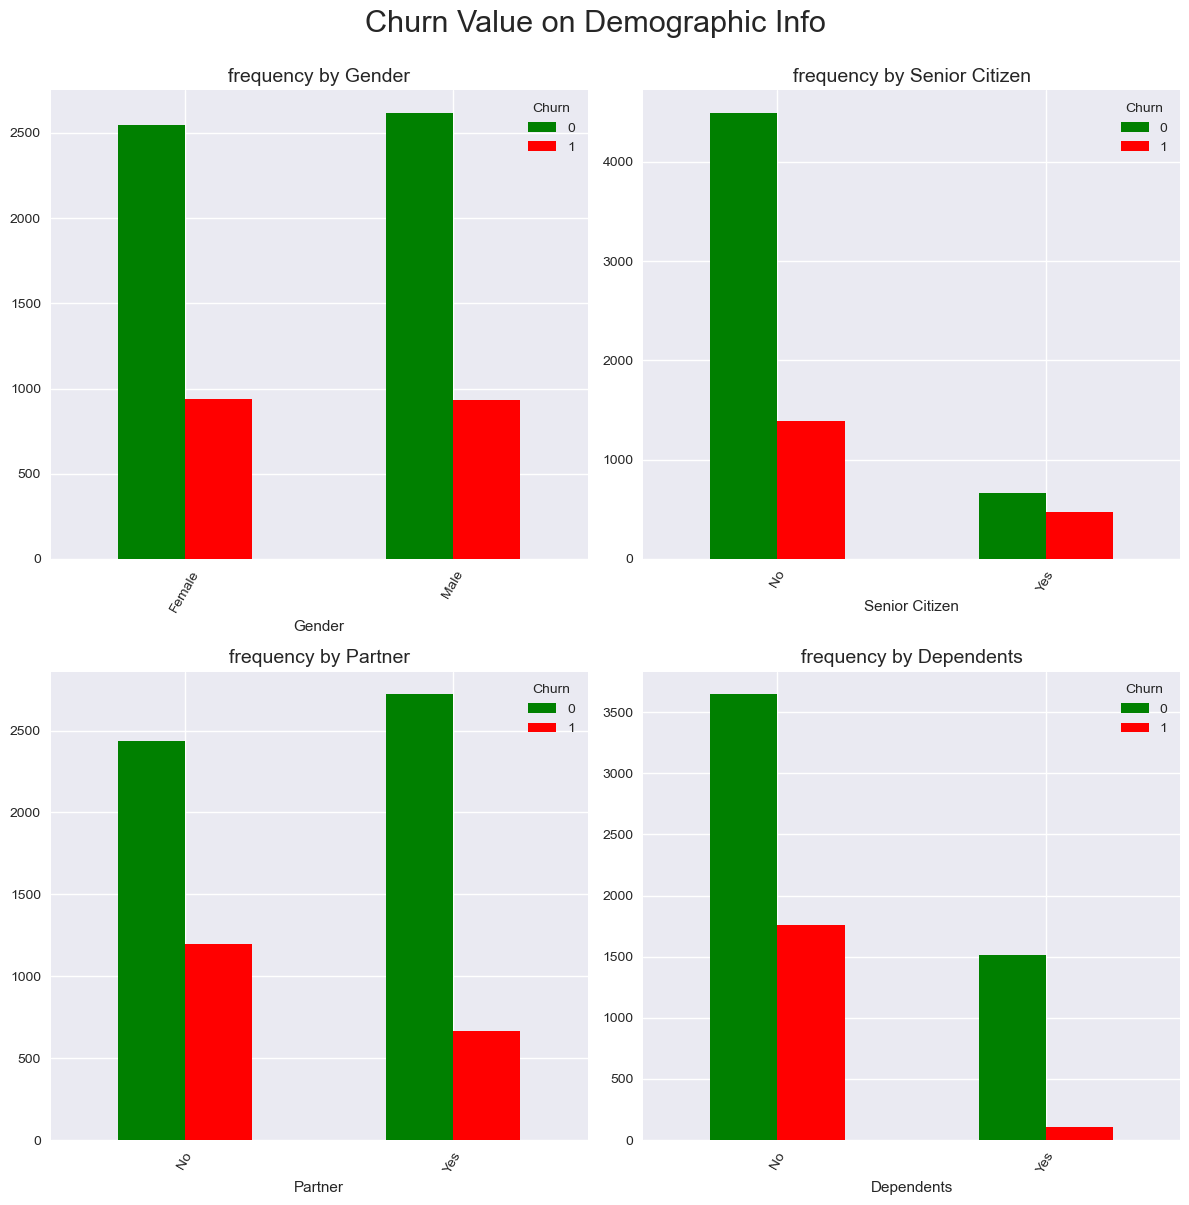

In [107]:
demographic_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

def freq_plot(columns_plot, top_title):
    #subfigures layout
    number_of_columns = 2 # 2 subfigures in each row
    number_of_rows = math.ceil(len(columns_plot)/2)
    #create a big figure containing all subfigures
    fig = plt.figure(figsize = (12, 6 * number_of_rows))
    fig.suptitle(top_title, fontsize = 22, y = 1.0)
    #for loop to creat each subfigure
    for index, column in enumerate(columns_plot, 1): #index start @ 1
        ax = fig.add_subplot(number_of_rows, number_of_columns, index) # create a subfigure
        freq_column = pd.crosstab(df[column], df['Churn Value'])
        freq_column.plot(kind = 'bar', ax = ax, color = ['green', 'red'])
        ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), title = 'Churn')
        ax.set_title('frequency by ' + column, fontsize = 14)
        ax.tick_params(axis='x', rotation=60)
        
    fig.tight_layout()

freq_plot(demographic_columns, 'Churn Value on Demographic Info')

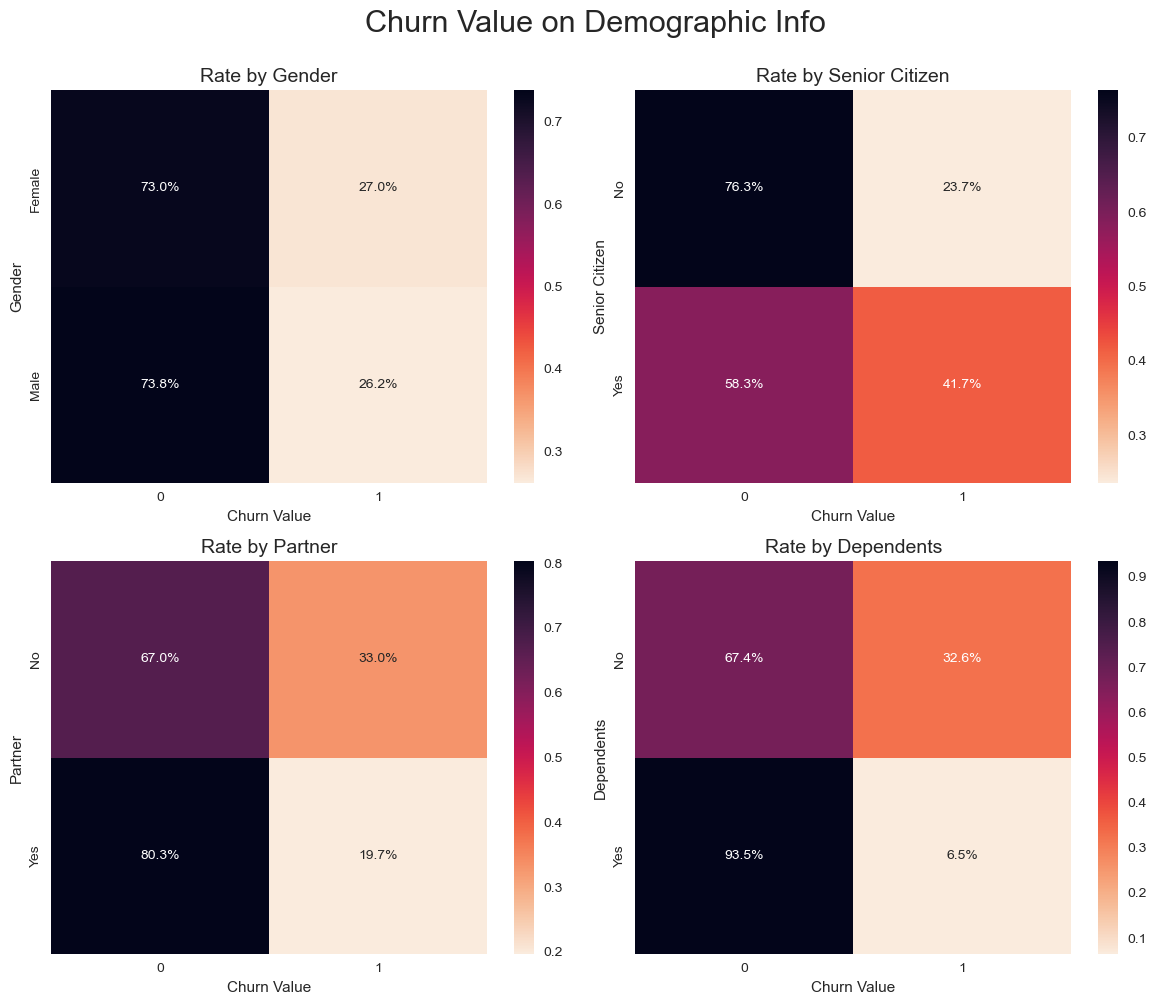

In [108]:
def rate_plot(columns_plot, top_title):
    #subfigures layout
    number_of_columns = 2 # 2 subfigures in each row
    number_of_rows = math.ceil(len(columns_plot)/2)
    #create a big figure containing all subfigures
    fig = plt.figure(figsize = (12, 5 * number_of_rows))
    fig.suptitle(top_title, fontsize = 22, y = 1.0)
    #for loop to creat each subfigure
    for index, column in enumerate(columns_plot, 1): #index start @ 1
        ax = fig.add_subplot(number_of_rows, number_of_columns, index) # create a subfigure
        perc_column = pd.crosstab(df[column], df['Churn Value']).apply(lambda x: x/x.sum(), axis = 1)
        sns.heatmap(perc_column, cmap='rocket_r', annot=True, fmt='0.1%')
        ax.set_title('Rate by ' + column, fontsize = 14)
    fig.tight_layout()
        
rate_plot(demographic_columns, 'Churn Value on Demographic Info')

#### Note: 1) It seems whether the customer is male or female has no obvious difference/tendency for Churning.
####           2) The data has more information on No Senior Citizen. However, The churn rate in Senior Citizen is higher than the churn rate in No Senior Citizen.
####           3) If customer has a partner, it shows it has less churn rate.
####           4) The customer with dependents tends to 'Not Churn'

### Look at Customer Account Info, including Tenure Months, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges

#### Contract, Paperless Billing, and Payment Method are Categorical data.
#### Tenure Months, Monthly Charges, Total Charges are Numerical data

##### Let us first check Categocial data. (Contract, Paperless Billing, and Payment Method)

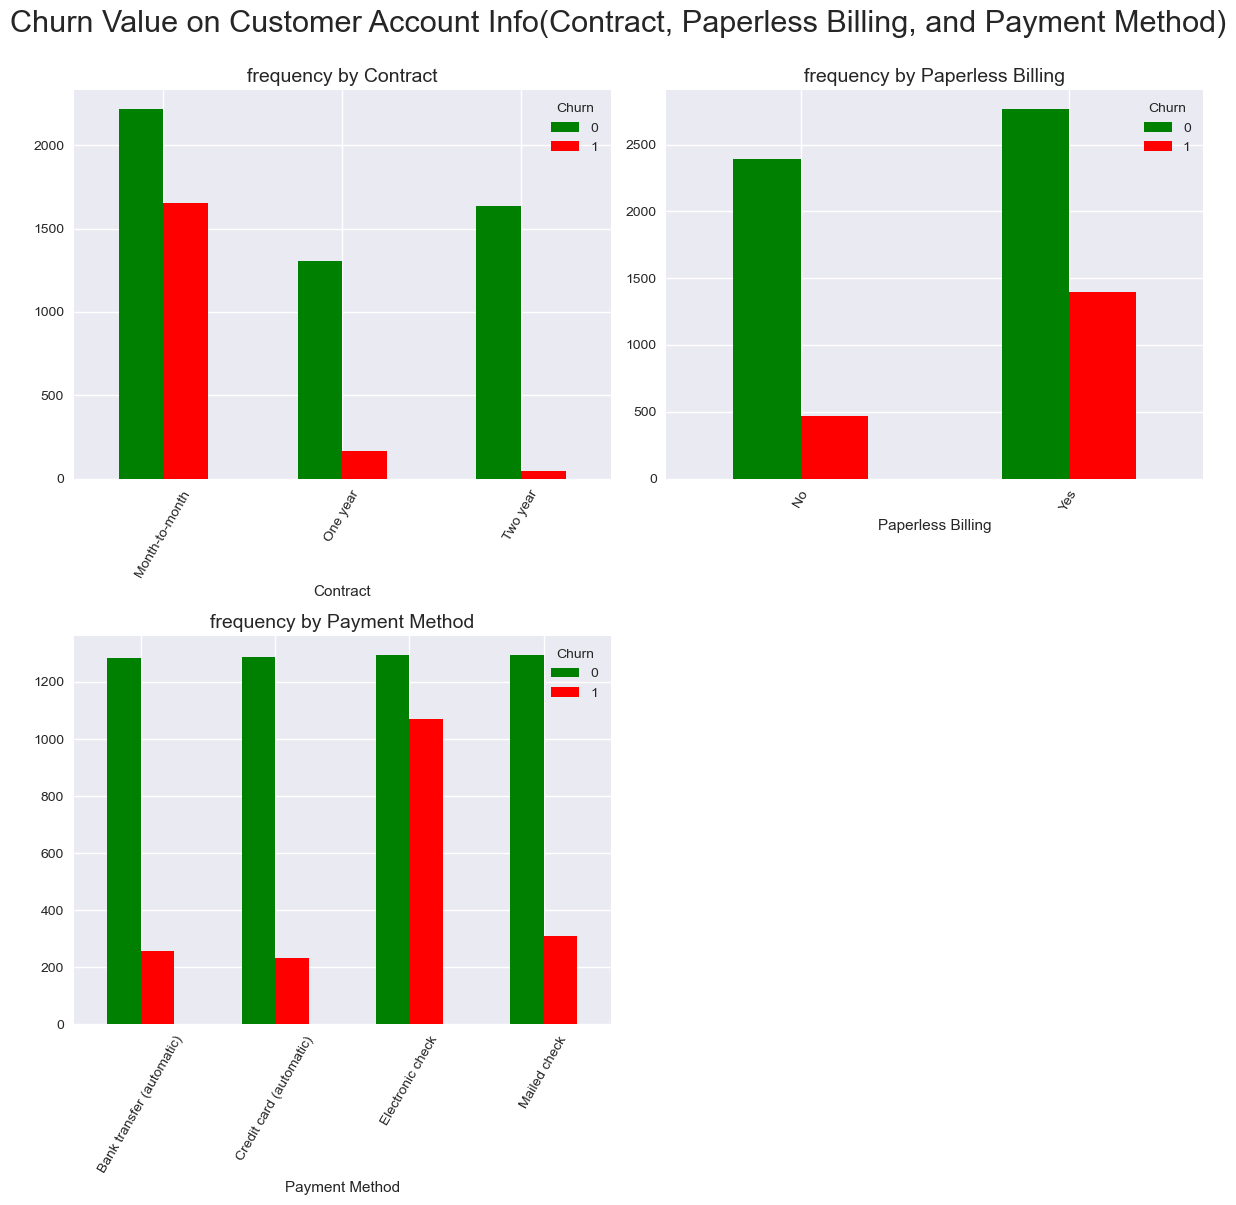

In [109]:
# check freq of customer account infor (Contract, Paperless Billing, and Payment Method) Vs. Churn Value
acct_cat_columns = ['Contract', 'Paperless Billing', 'Payment Method']
freq_plot(acct_cat_columns, 'Churn Value on Customer Account Info(Contract, Paperless Billing, and Payment Method)')

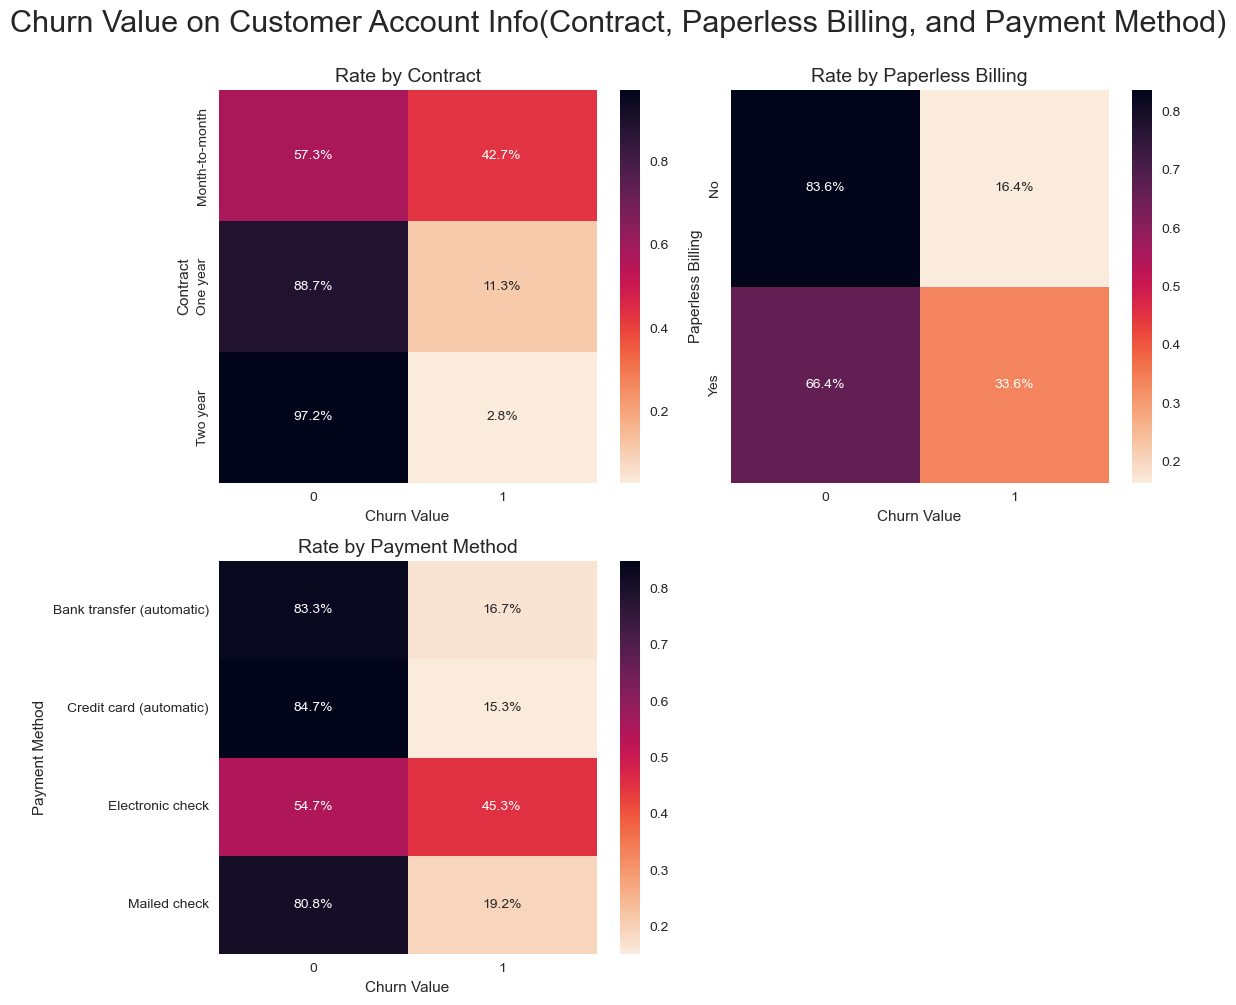

In [110]:
# check rate of customer account infor (Contract, Paperless Billing, and Payment Method) Vs. Churn Value
rate_plot(acct_cat_columns, 'Churn Value on Customer Account Info(Contract, Paperless Billing, and Payment Method)')

#### Note: 1) It shows Customers with Monthly-to-Monthly contract has much higher churn rate than other contract types. 
####           2) It shows Customers choosing Paperless Billing has higher churn rate than customers with paper billing.
####           3) It shows Customers with Electronic check have significant higher churn rate than customers with other three payment methods. The other three payment methods have the similar level of churn rates.

#### Let us look at Customer Account Info with numerical data(Tenure Months, Monthly Charges, Total Charges)

<AxesSubplot:xlabel='Tenure Months', ylabel='Density'>

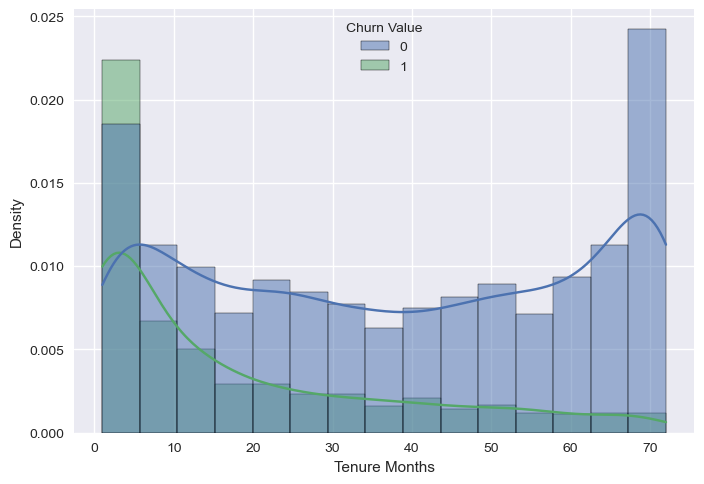

In [111]:
# we could not use previous functions freq_plot and rate_plot as they are numerical data.

# Check Tenure Months Vs. Churn
sns.histplot(data = df, x = 'Tenure Months', hue = 'Churn Value', stat = 'density', kde = True)

#### Note: The churn rate is decreasing as Tenure Months increasing. It may be help for us to understand the loyalty on churn rate.

Inflection points location on Tenure Months: 10
Inflection points location on Tenure Months: 16
Inflection points location on Tenure Months: 33
Inflection points location on Tenure Months: 49
Inflection points location on Tenure Months: 61


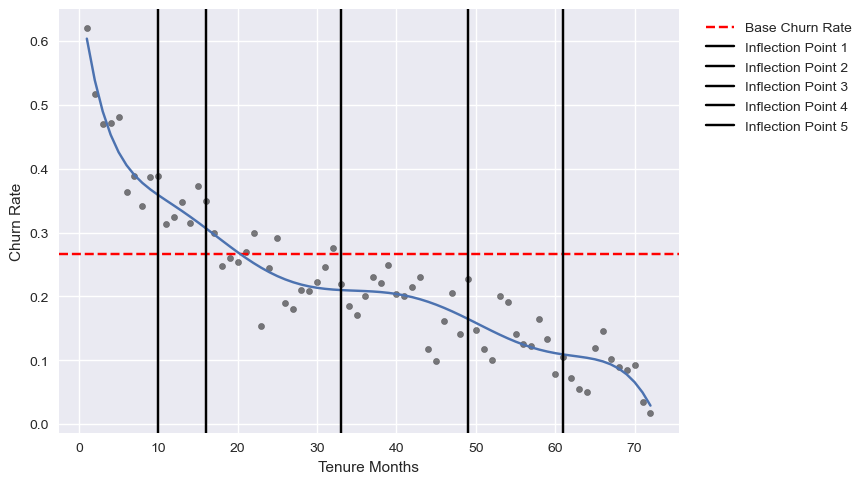

In [112]:
# scatter plot Tenure Months Vs. Churn Rate 
df_tenure_churn = pd.crosstab(df['Tenure Months'],df['Churn Value']).apply(lambda x: x/x.sum(), axis = 1)
df_tenure_churn = df_tenure_churn.reset_index()
plt.style.use('seaborn')
plt.scatter(df_tenure_churn['Tenure Months'], df_tenure_churn[1], s=20, color = 'k', alpha=0.5)
plt.xlabel('Tenure Months')
plt.ylabel('Churn Rate')
plt.axhline(y=0.2658, color='r', linestyle='--',label='Base Churn Rate')
plt.legend()
z = np.polyfit(df_tenure_churn['Tenure Months'], df_tenure_churn[1], 8)
p = np.poly1d(z)
dy = p(df_tenure_churn['Tenure Months']) - df_tenure_churn[1]
plt.plot(df_tenure_churn['Tenure Months'], p(df_tenure_churn['Tenure Months']))
# find inflection points
dev2 = np.gradient(np.gradient(p(df_tenure_churn['Tenure Months']))) # second order derivatives
infls = np.where(np.diff(np.sign(dev2)))[0] # points where the sign of curve slope changes
for i, infl in enumerate(infls, 1):
    print('Inflection points location on Tenure Months:', infl)
    plt.axvline(x=infl, color='k', label=f'Inflection Point {i}')
    plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()

#### Note: From the above Tenure Months Vs. Churn Rate curve, We find the inflection point locates at 10, 16, 33, 49 and 61 Tenure Months. We also have a base churn rate when we only look at 'Churn Value' column.  So, we also think the cross point between the fitting curve and red dash base churn line is meanful, i.e., Tenure Months = 20. So we define 'Loyalty' feature as ordinal feature.
##### Loyalty score = 1 when Tenure Months < = 10;
##### Loyalty score = 2 when 10 < Tenure Months < = 20;
##### Loyalty score = 3 when 20 < Tenure Months < = 33;
##### Loyalty score = 4 when 33 < Tenure Months < = 49;
##### Loyalty score = 5 when 49 < Tenure Months < = 61;
##### Loyalty score = 6 when 61 < Tenure Months.
          


In [113]:
# make Loyalty feature
def loyalty(x):
    if x <= 10:
        return 1
    elif 10 < x <= 20:
        return 2
    elif 20 < x <= 33:
        return 3
    elif 33 < x <= 49:
        return 4
    elif 49 < x <= 61:
        return 5
    else:
        return 6

df['Loyalty'] = df['Tenure Months'].map(loyalty)

In [114]:
df.head()

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  Multiple Lines Internet Service Online Security Online Backup  \
0             No              DSL             Yes           Yes   
1             No      Fiber optic              No            No   
2            Yes      Fiber optic              No            No   
3            Yes      Fiber optic              No            No   
4            Yes      Fiber optic              No           Yes   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

   Monthly Charges  Total Charges  Churn Value  CLTV  los_angeles_distance  \
0            53.85         108.15            1  3239             10.135686   
1            70.70         151.65            1  2701              5.936155   
2            99.65         820.50            1  5372              4.665020   
3           104.80        3046.05            1  5003              6.739529   
4           103.70        5036.30            1  5340              2.537988   

   san_diego_distance  san_francisco_distance  san_jose_distance  \
0          172.860054              565.325792         497.745459   
1          183.248097              555.234178         487.637125   
2          181.506741              556.992973         489.395517   
3          183.952959              554.494874         486.899058   
4          179.228076              559.403314         491.801908   

   sacramento_distance  Loyalty  
0           587.137368        1  
1           576.337767        1  
2           578.031199        1  
3           575.693965        3  
4           580.115971        4

In [115]:
# Check Monthly Charges Vs Churn Value

<AxesSubplot:xlabel='Monthly Charges', ylabel='Density'>

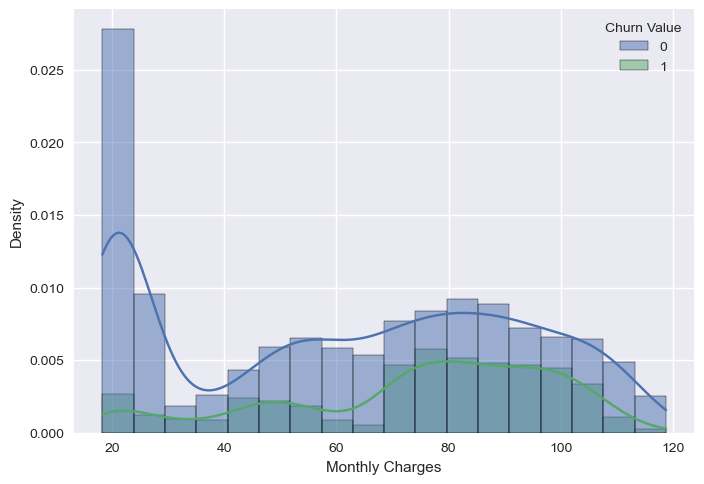

In [116]:
sns.histplot(data = df, x = 'Monthly Charges', hue = 'Churn Value', stat = 'density', kde = True)

#### Note: It seems customers with higher Monthly Charge more likely churn.

In [117]:
# Check Total Charges Vs Churn Value

<AxesSubplot:xlabel='Total Charges', ylabel='Density'>

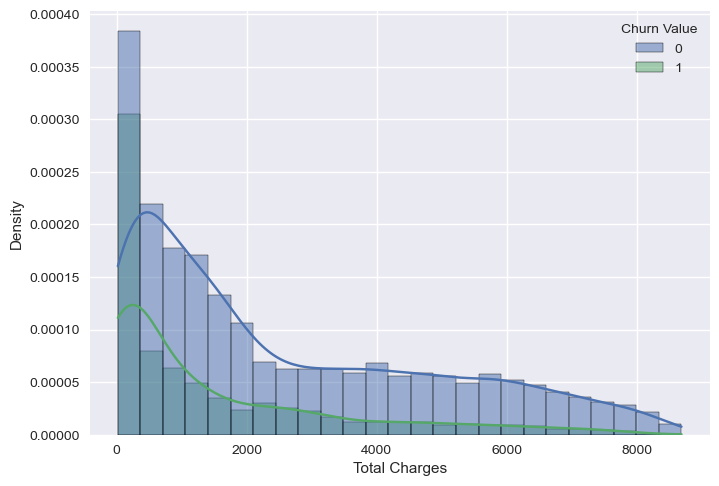

In [118]:
sns.histplot(data = df, x = 'Total Charges', hue = 'Churn Value', stat = 'density', kde = True)

#### Note: It seems customers with Total Charges more likely churn. Let us further check Total Charges.

### Look at Service Info, including Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies. All of the features are categotical data.

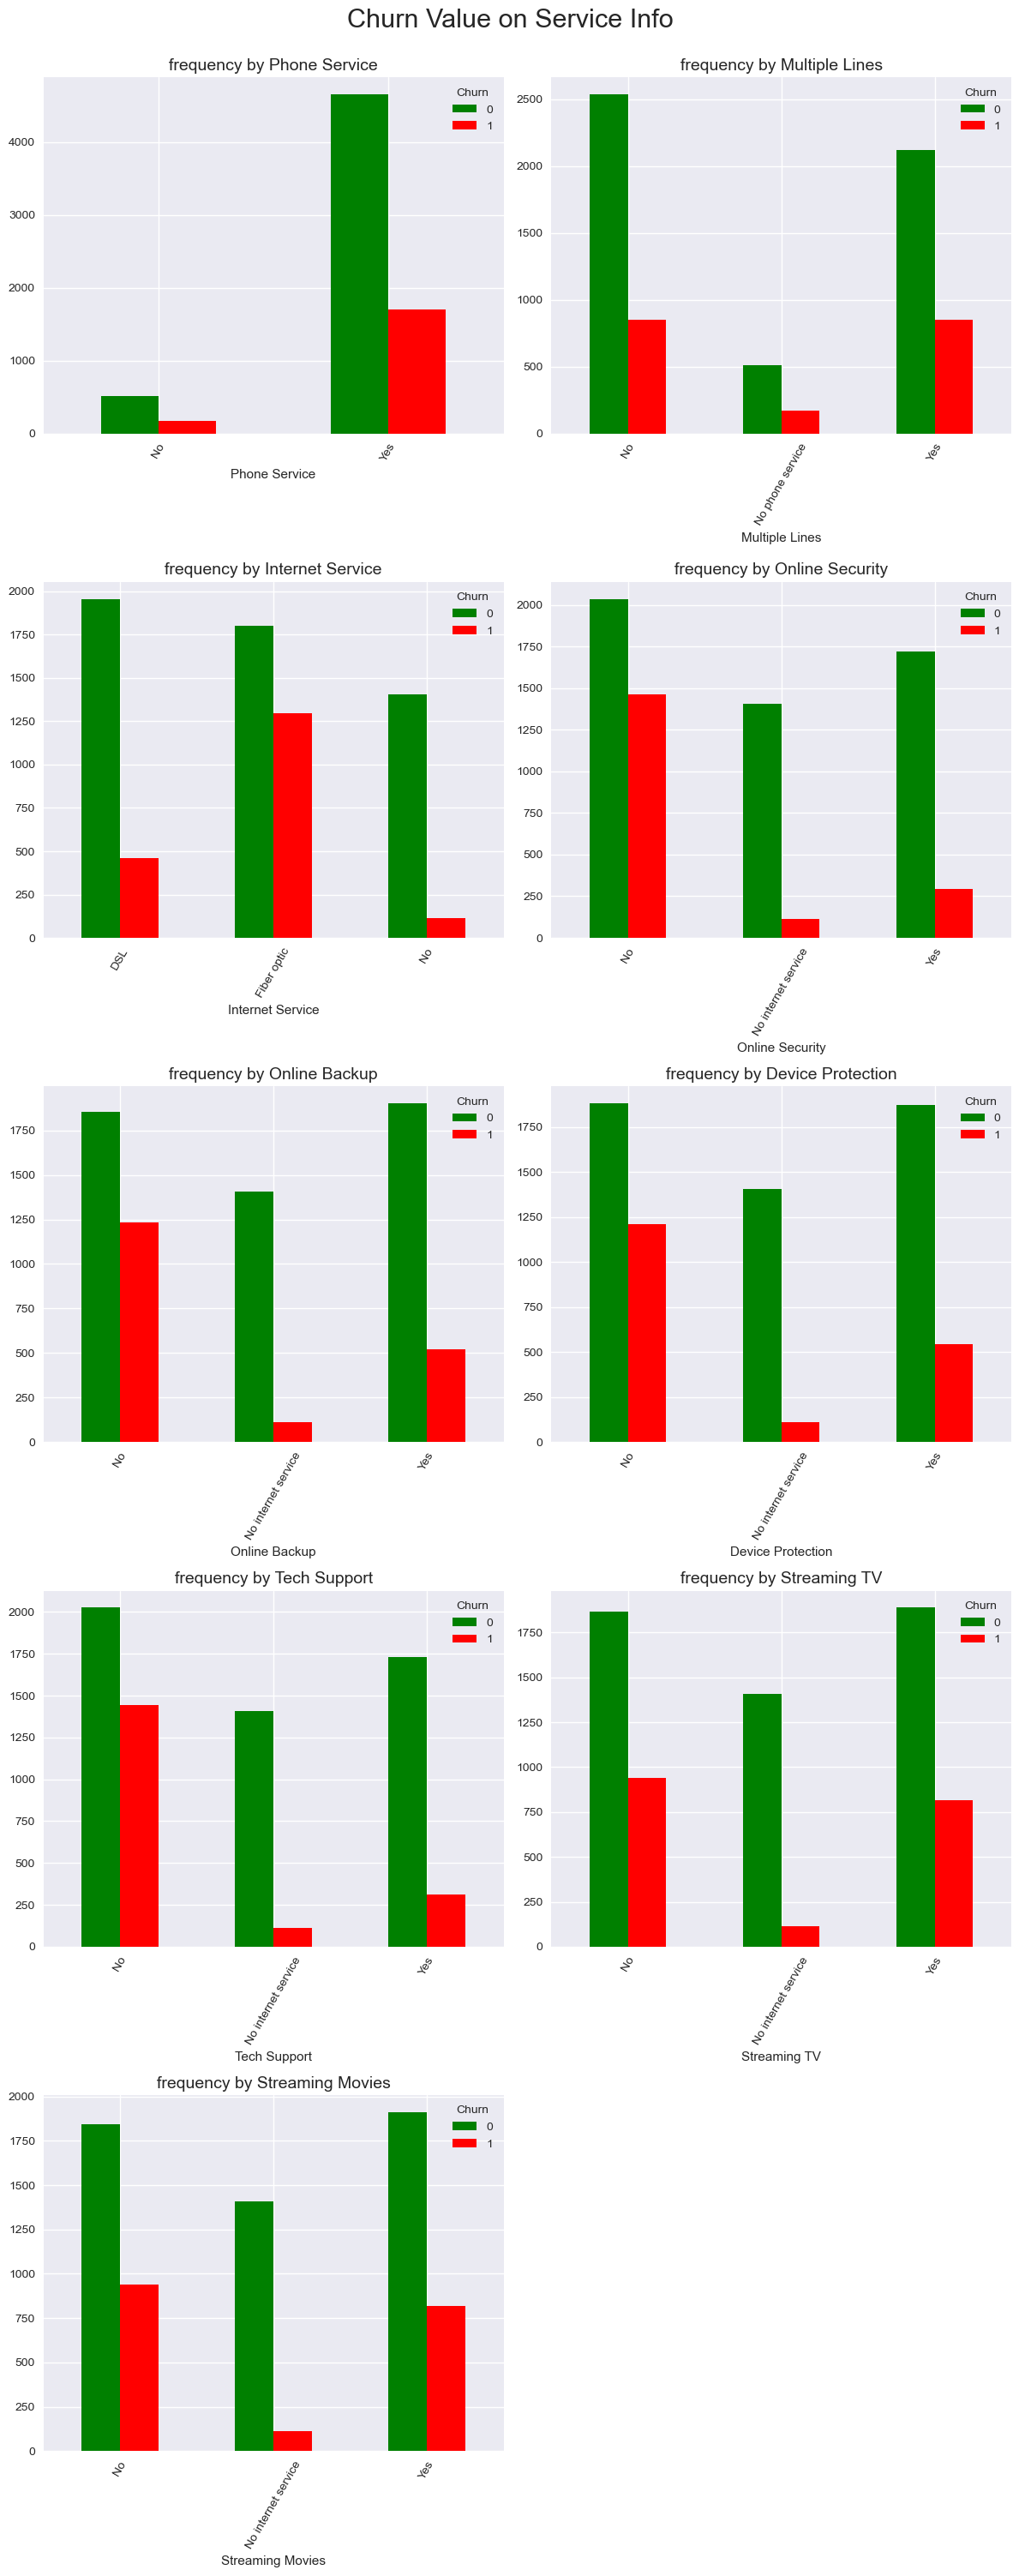

In [119]:
# check freq of service info
service_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                   'Tech Support', 'Streaming TV', 'Streaming Movies']
freq_plot(service_columns, 'Churn Value on Service Info')

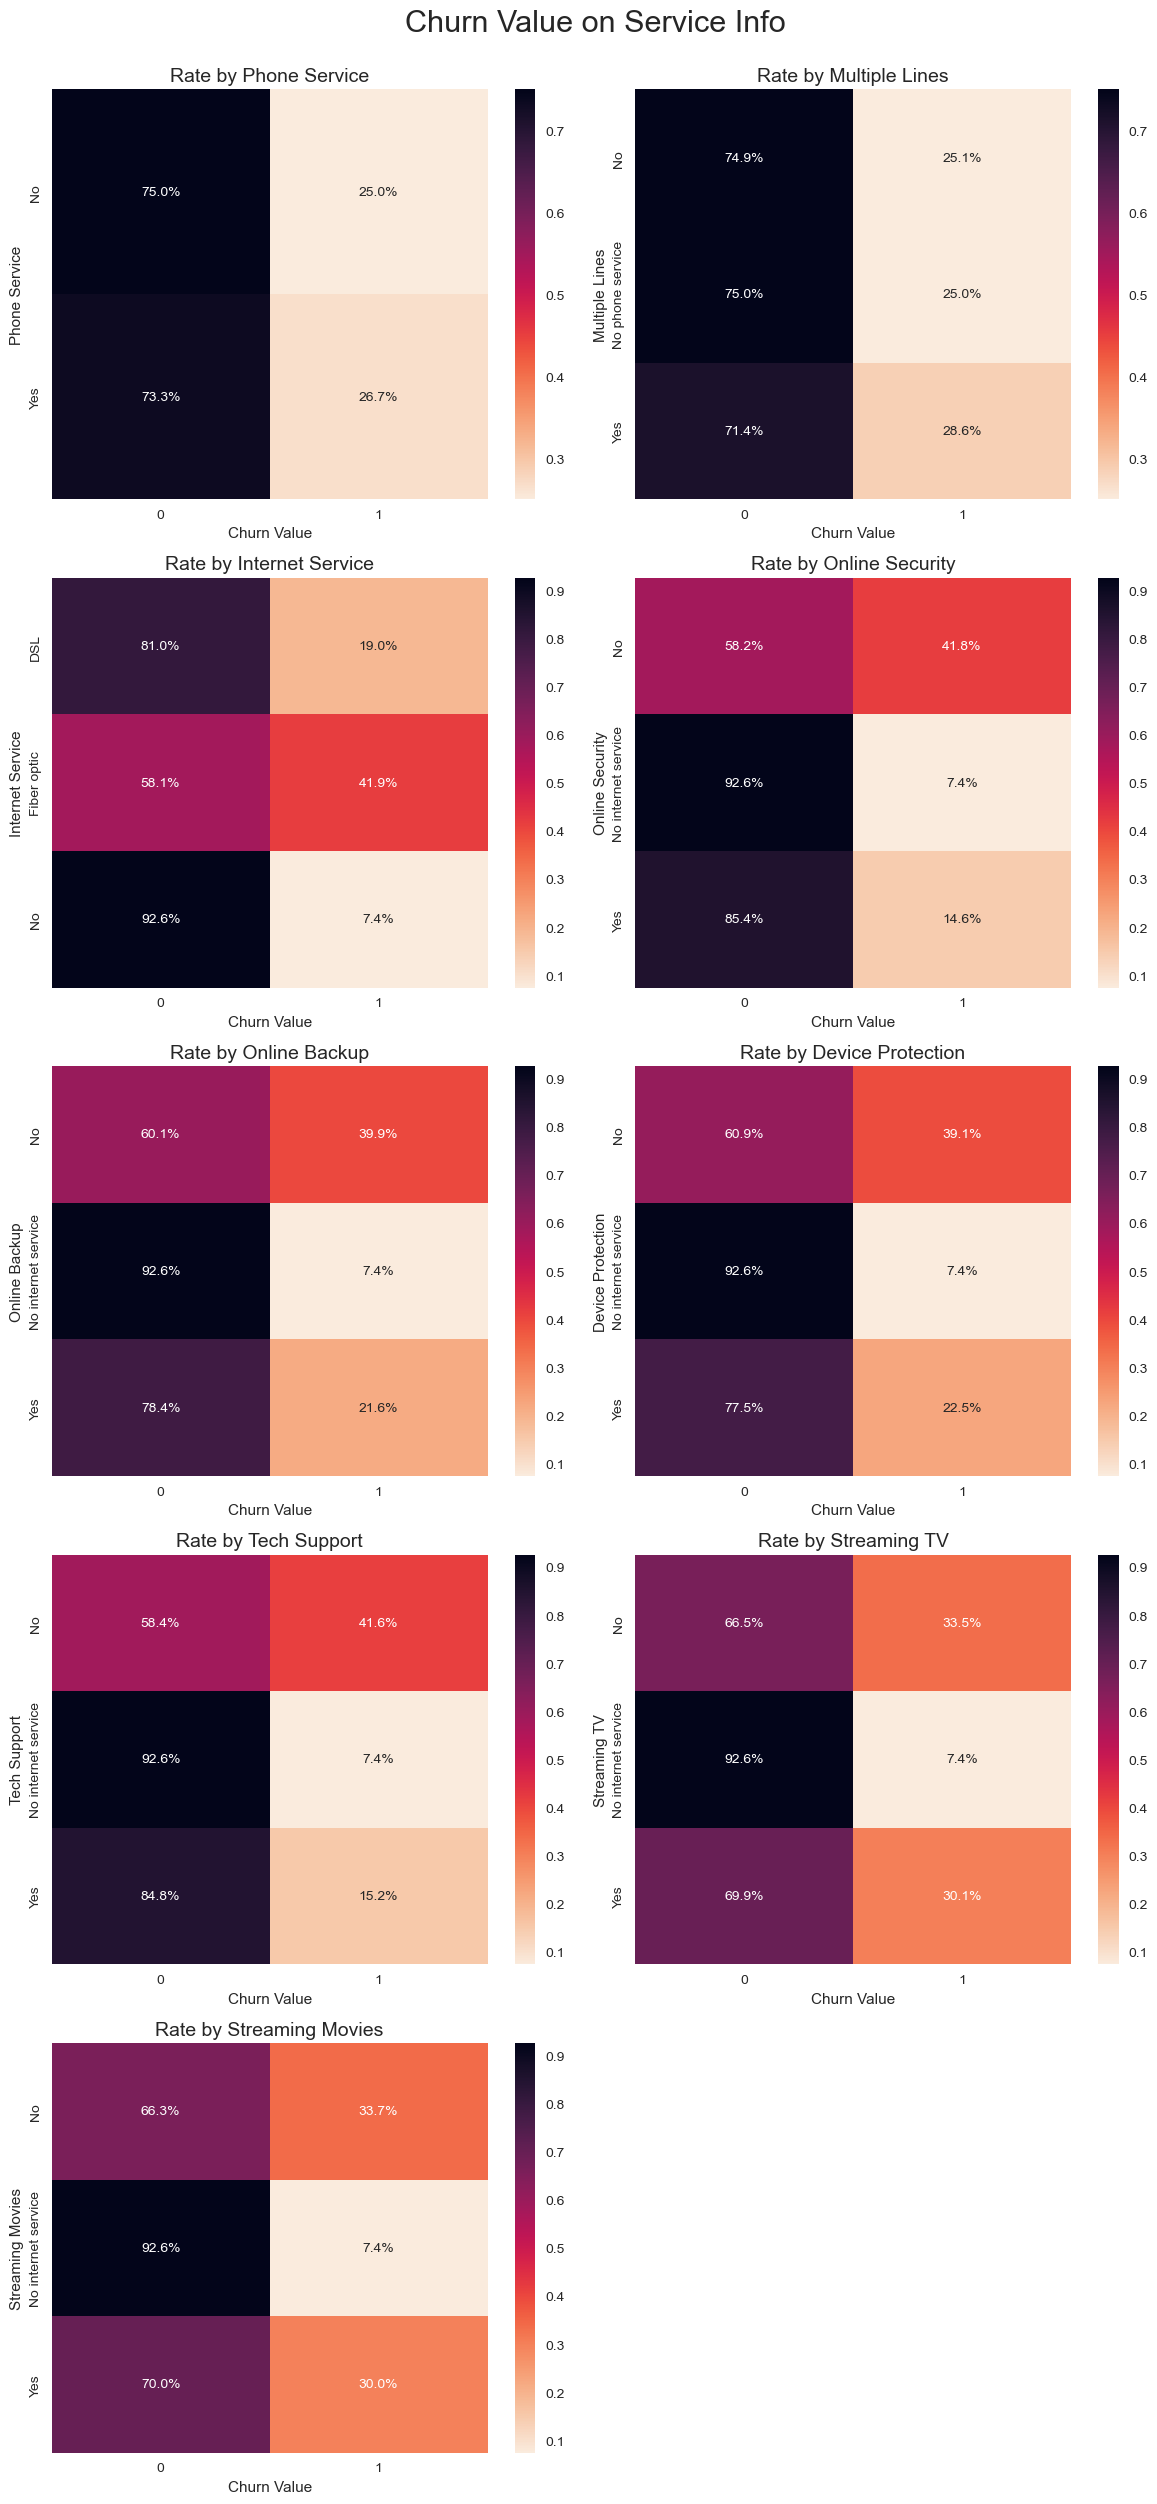

In [120]:
# check rate of service info 
rate_plot(service_columns, 'Churn Value on Service Info')

#### Note: 1) Customers with or without Phone Service have the similar Churn rate and it closes to our base rate;
####           2) Customers with Multiple Lines or not also have the similar Churn rate as customers with No phone Service. These Churn rates also close to our base rate;
####           3) Customers using Fiber Optical for Internet Service has the most higher churn rate than other type of Internet Service;
####           4) Customers with no online security, no online backup, no device protection, and no tech support have higher churn rate than customers with these choice. We could have a new feature called 'not_Help_Score'. 
####           5) Customers using Streaming TV or Streaming Movies have a little bit higher churn rate than these not using it. However, in general, their churn rates are higher than base rate.

#### not_Help_Score here means 4 if no online security, no online backup, no device protection, and no tech support; 3 if any one of four items is 'Yes'; 2 if two of these four items are 'Yes';  1 if three of these items are 'Yes'; 0 if all of these items are 'Yes'. For customers with 'No Internet Service', the not_Help_Score is set to 0 because it has much lower churn rate than base churn rate.


In [121]:
# build not_Help_Score column
df['not_Help_Score'] = (df[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']] == 'No').sum(axis = 1)

In [122]:
df.head(20)

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0     Male             No      No         No              2           Yes   
1   Female             No      No        Yes              2           Yes   
2   Female             No      No        Yes              8           Yes   
3   Female             No     Yes        Yes             28           Yes   
4     Male             No      No        Yes             49           Yes   
5   Female             No     Yes         No             10           Yes   
6     Male            Yes      No         No              1            No   
7     Male             No      No         No              1           Yes   
8     Male             No     Yes        Yes             47           Yes   
9     Male             No     Yes         No              1            No   
10  Female             No      No         No             17           Yes   
11    Male             No      No        Yes              5           Yes   
12    Male             No      No        Yes             34           Yes   
13  Female             No      No        Yes             11           Yes   
14  Female             No      No        Yes              2           Yes   
15  Female             No      No        Yes             15           Yes   
16  Female            Yes     Yes        Yes              8           Yes   
17    Male            Yes      No        Yes             18           Yes   
18  Female             No      No        Yes              9           Yes   
19  Female             No      No        Yes              1           Yes   

      Multiple Lines Internet Service      Online Security  \
0                 No              DSL                  Yes   
1                 No      Fiber optic                   No   
2                Yes      Fiber optic                   No   
3                Yes      Fiber optic                   No   
4                Yes      Fiber optic                   No   
5                 No              DSL                   No   
6   No phone service              DSL                   No   
7                 No               No  No internet service   
8                Yes      Fiber optic                   No   
9   No phone service              DSL                   No   
10                No              DSL                   No   
11                No      Fiber optic                   No   
12               Yes      Fiber optic                   No   
13               Yes      Fiber optic                   No   
14                No      Fiber optic                   No   
15                No      Fiber optic                  Yes   
16               Yes      Fiber optic                   No   
17               Yes      Fiber optic                   No   
18               Yes      Fiber optic                   No   
19                No      Fiber optic                   No   

          Online Backup    Device Protection         Tech Support  \
0                   Yes                   No                   No   
1                    No                   No                   No   
2                    No                  Yes                   No   
3                    No                  Yes                  Yes   
4                   Yes                  Yes                   No   
5                    No                  Yes                  Yes   
6                    No                  Yes                   No   
7   No internet service  No internet service  No internet service   
8                   Yes                   No                   No   
9                   Yes                   No                   No   
10                   No                   No                   No   
11                   No                   No                   No   
12                  Yes                  Yes                   No   
13                   No                  Yes                   No   
14                   No                   No    

### Look at CLTV Vs. Churn Value

<AxesSubplot:xlabel='CLTV', ylabel='Density'>

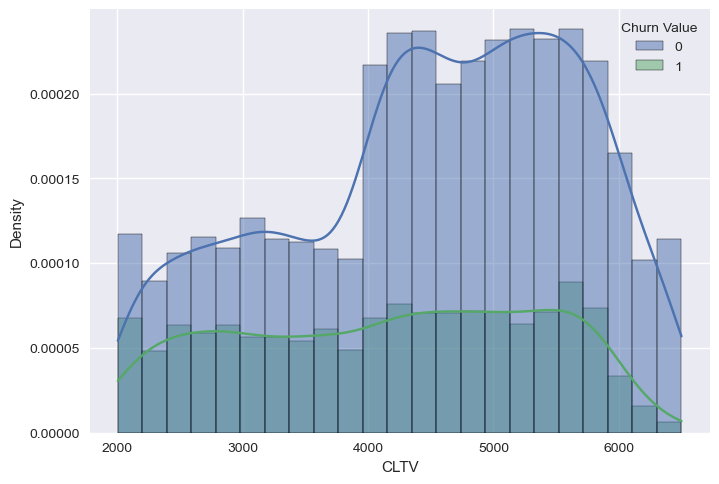

In [123]:
sns.histplot(data = df, x = 'CLTV', hue = 'Churn Value', stat = 'density', kde = True)

#### Note: Customers with higher CLTV have less likely to Churn.

In [124]:
# check dataframe info by far.
report(df)

Column   d_type  Numbers of Missing Value  \
0                   Gender   object                         0   
1           Senior Citizen   object                         0   
2                  Partner   object                         0   
3               Dependents   object                         0   
4            Tenure Months    int64                         0   
5            Phone Service   object                         0   
6           Multiple Lines   object                         0   
7         Internet Service   object                         0   
8          Online Security   object                         0   
9            Online Backup   object                         0   
10       Device Protection   object                         0   
11            Tech Support   object                         0   
12            Streaming TV   object                         0   
13        Streaming Movies   object                         0   
14                Contract   object                         0   
15       Paperless Billing   object                         0   
16          Payment Method   object                         0   
17         Monthly Charges  float64                         0   
18           Total Charges  float64                         0   
19             Churn Value    int64                         0   
20                    CLTV    int64                         0   
21    los_angeles_distance  float64                         0   
22      san_diego_distance  float64                         0   
23  san_francisco_distance  float64                         0   
24       san_jose_distance  float64                         0   
25     sacramento_distance  float64                         0   
26                 Loyalty    int64                         0   
27          not_Help_Score    int64                         0   

                                         unique_value  n_uniques  
0                                      [Male, Female]          2  
1                                           [No, Yes]          2  
2                                           [No, Yes]          2  
3                                           [No, Yes]          2  
4                                  [2, 8, 28, 49, 10]         72  
5                                           [Yes, No]          2  
6                         [No, Yes, No phone service]          3  
7                              [DSL, Fiber optic, No]          3  
8                      [Yes, No, No internet service]          3  
9                      [Yes, No, No internet service]          3  
10                     [No, Yes, No internet service]          3  
11                     [No, Yes, No internet service]          3  
12                     [No, Yes, No internet service]          3  
13                     [No, Yes, No internet service]          3  
14               [Month-to-month, Two year, One year]          3  
15                                          [Yes, No]          2  
16  [Mailed check, Electronic check, Bank transfer...          4  
17                 [53.85, 70.7, 99.65, 104.8, 103.7]       1584  
18           [108.15, 151.65, 820.5, 3046.05, 5036.3]       6530  
19                                             [1, 0]          2  
20                     [3239, 2701, 5372, 5003, 5340]       3435  
21  [10.135685745445898, 5.936155134563085, 4.6650...       1652  
22  [172.86005354275653, 183.24809748610514, 181.5...       1652  
23  [565.325791860294, 555.2341779786783, 556.9929...       1652  
24  [497.74545929131295, 487.6371251119657, 489.39...       1652  
25  [587.1373676003758, 576.337767196944, 578.0311...       1652  
26                                    [1, 3, 4, 2, 6]          6  
27                                    [2, 4, 3, 0, 1]          5

### Feature Importance 

In [125]:
#### Mutual Information for categorical features plus the Loyal and not_Help_Score which are defined as ordinal categorical data.
#### Numerical data will be discussed after feature engineering and build 

def compute_mutual_information(categorical_variables):
    return mutual_info_score(categorical_variables, df['Churn Value'])

# select categorial variables excluding the response variable 
categorical_columns = df.select_dtypes(exclude=['int64','float64']) 
categorical_columns['Loyalty'] = df['Loyalty']
categorical_columns['not_Help_Score'] = df['not_Help_Score']

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_columns.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract             0.098182
not_Help_Score       0.087927
Loyalty              0.068118
Online Security      0.064528
Tech Support         0.062873
Internet Service     0.055394
Online Backup        0.046659
Payment Method       0.044423
Device Protection    0.043784
Dependents           0.037613
Streaming Movies     0.031918
Streaming TV         0.031803
Paperless Billing    0.019119
Partner              0.011383
Senior Citizen       0.010533
Multiple Lines       0.000798
Phone Service        0.000069
Gender               0.000037
dtype: float64


<AxesSubplot:>

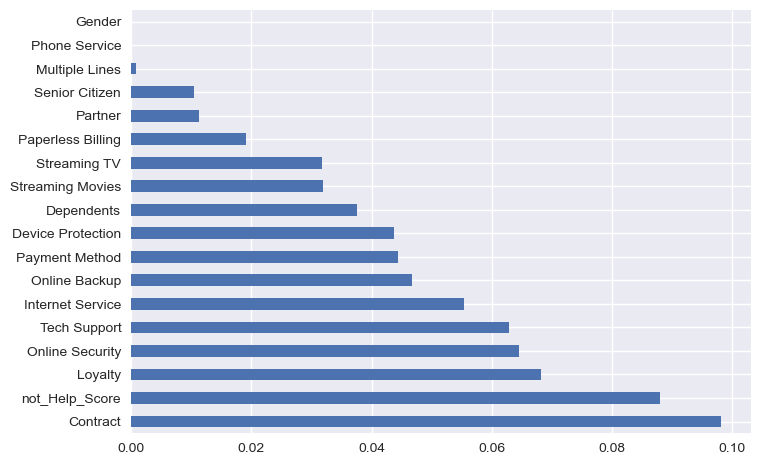

In [126]:
feature_importance.plot.barh()

#### Note: For categorical data, Gender and Phone Service have very less impact on Churn result since their mutual info score close to 0. We could drop these features before training the model. The conclusion here matches with the drawn from data visualzation.

### Feature Engineering and Correlations

In [127]:
class data_transform(object):
    
    def fit(self, X, y = None):
        # set up initial conditions
        self.binary_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
        self.multi_cols = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
                          'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']
    
    def transform(self, X, y = None):
        df_tran = X.copy()
        
        # Label encoding for binary categorical variables
        for col in self.binary_cols:
            if col == 'Gender':
                df_tran[col] = df_tran[col].map({'Female': 1, 'Male': 0})
            else:
                df_tran[col] = df_tran[col].map({'Yes': 1, 'No': 0})
                
        # one-hot encoding for multi categorical variables
        df_tran = pd.get_dummies(df_tran, columns = self.multi_cols)
        
        return df_tran
    
    def fit_transform(self, X, y = None):
        self.fit(X)
        return self.transform(X)        

In [128]:
# get df after feature engineering
dt = data_transform()
df_FE = dt.fit_transform(df)
df_FE.head()

Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  \
0       0               0        0           0              2              1   
1       1               0        0           1              2              1   
2       1               0        0           1              8              1   
3       1               0        1           1             28              1   
4       0               0        0           1             49              1   

   Paperless Billing  Monthly Charges  Total Charges  Churn Value  CLTV  \
0                  1            53.85         108.15            1  3239   
1                  1            70.70         151.65            1  2701   
2                  1            99.65         820.50            1  5372   
3                  1           104.80        3046.05            1  5003   
4                  1           103.70        5036.30            1  5340   

   los_angeles_distance  san_diego_distance  san_francisco_distance  \
0             10.135686          172.860054              565.325792   
1              5.936155          183.248097              555.234178   
2              4.665020          181.506741              556.992973   
3              6.739529          183.952959              554.494874   
4              2.537988          179.228076              559.403314   

   san_jose_distance  sacramento_distance  Loyalty  not_Help_Score  \
0         497.745459           587.137368        1               2   
1         487.637125           576.337767        1               4   
2         489.395517           578.031199        1               3   
3         486.899058           575.693965        3               2   
4         491.801908           580.115971        4               2   

   Multiple Lines_No  Multiple Lines_No phone service  Multiple Lines_Yes  \
0                  1                                0                   0   
1                  1                                0                   0   
2                  0                                0                   1   
3                  0                                0                   1   
4                  0                                0                   1   

   Internet Service_DSL  Internet Service_Fiber optic  Internet Service_No  \
0                     1                             0                    0   
1                     0                             1                    0   
2                     0                             1                    0   
3                     0                             1                    0   
4                     0                             1                    0   

   Online Security_No  Online Security_No internet service  \
0                   0                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   Online Security_Yes  Online Backup_No  Online Backup_No internet service  \
0                    1                 0                                  0   
1                    0                 1                                  0   
2                    0                 1                                  0   
3                    0                 1                                  0   
4                    0                 0                                  0   

   Online Backup_Yes  Device Protection_No  \
0                  1                     1   
1                  0                     1   
2                  0                     0   
3                  0                     0   
4                  1                     0   

   Device Protection_No internet service  Device Protection_Yes  \
0                                      0                      0   
1                               

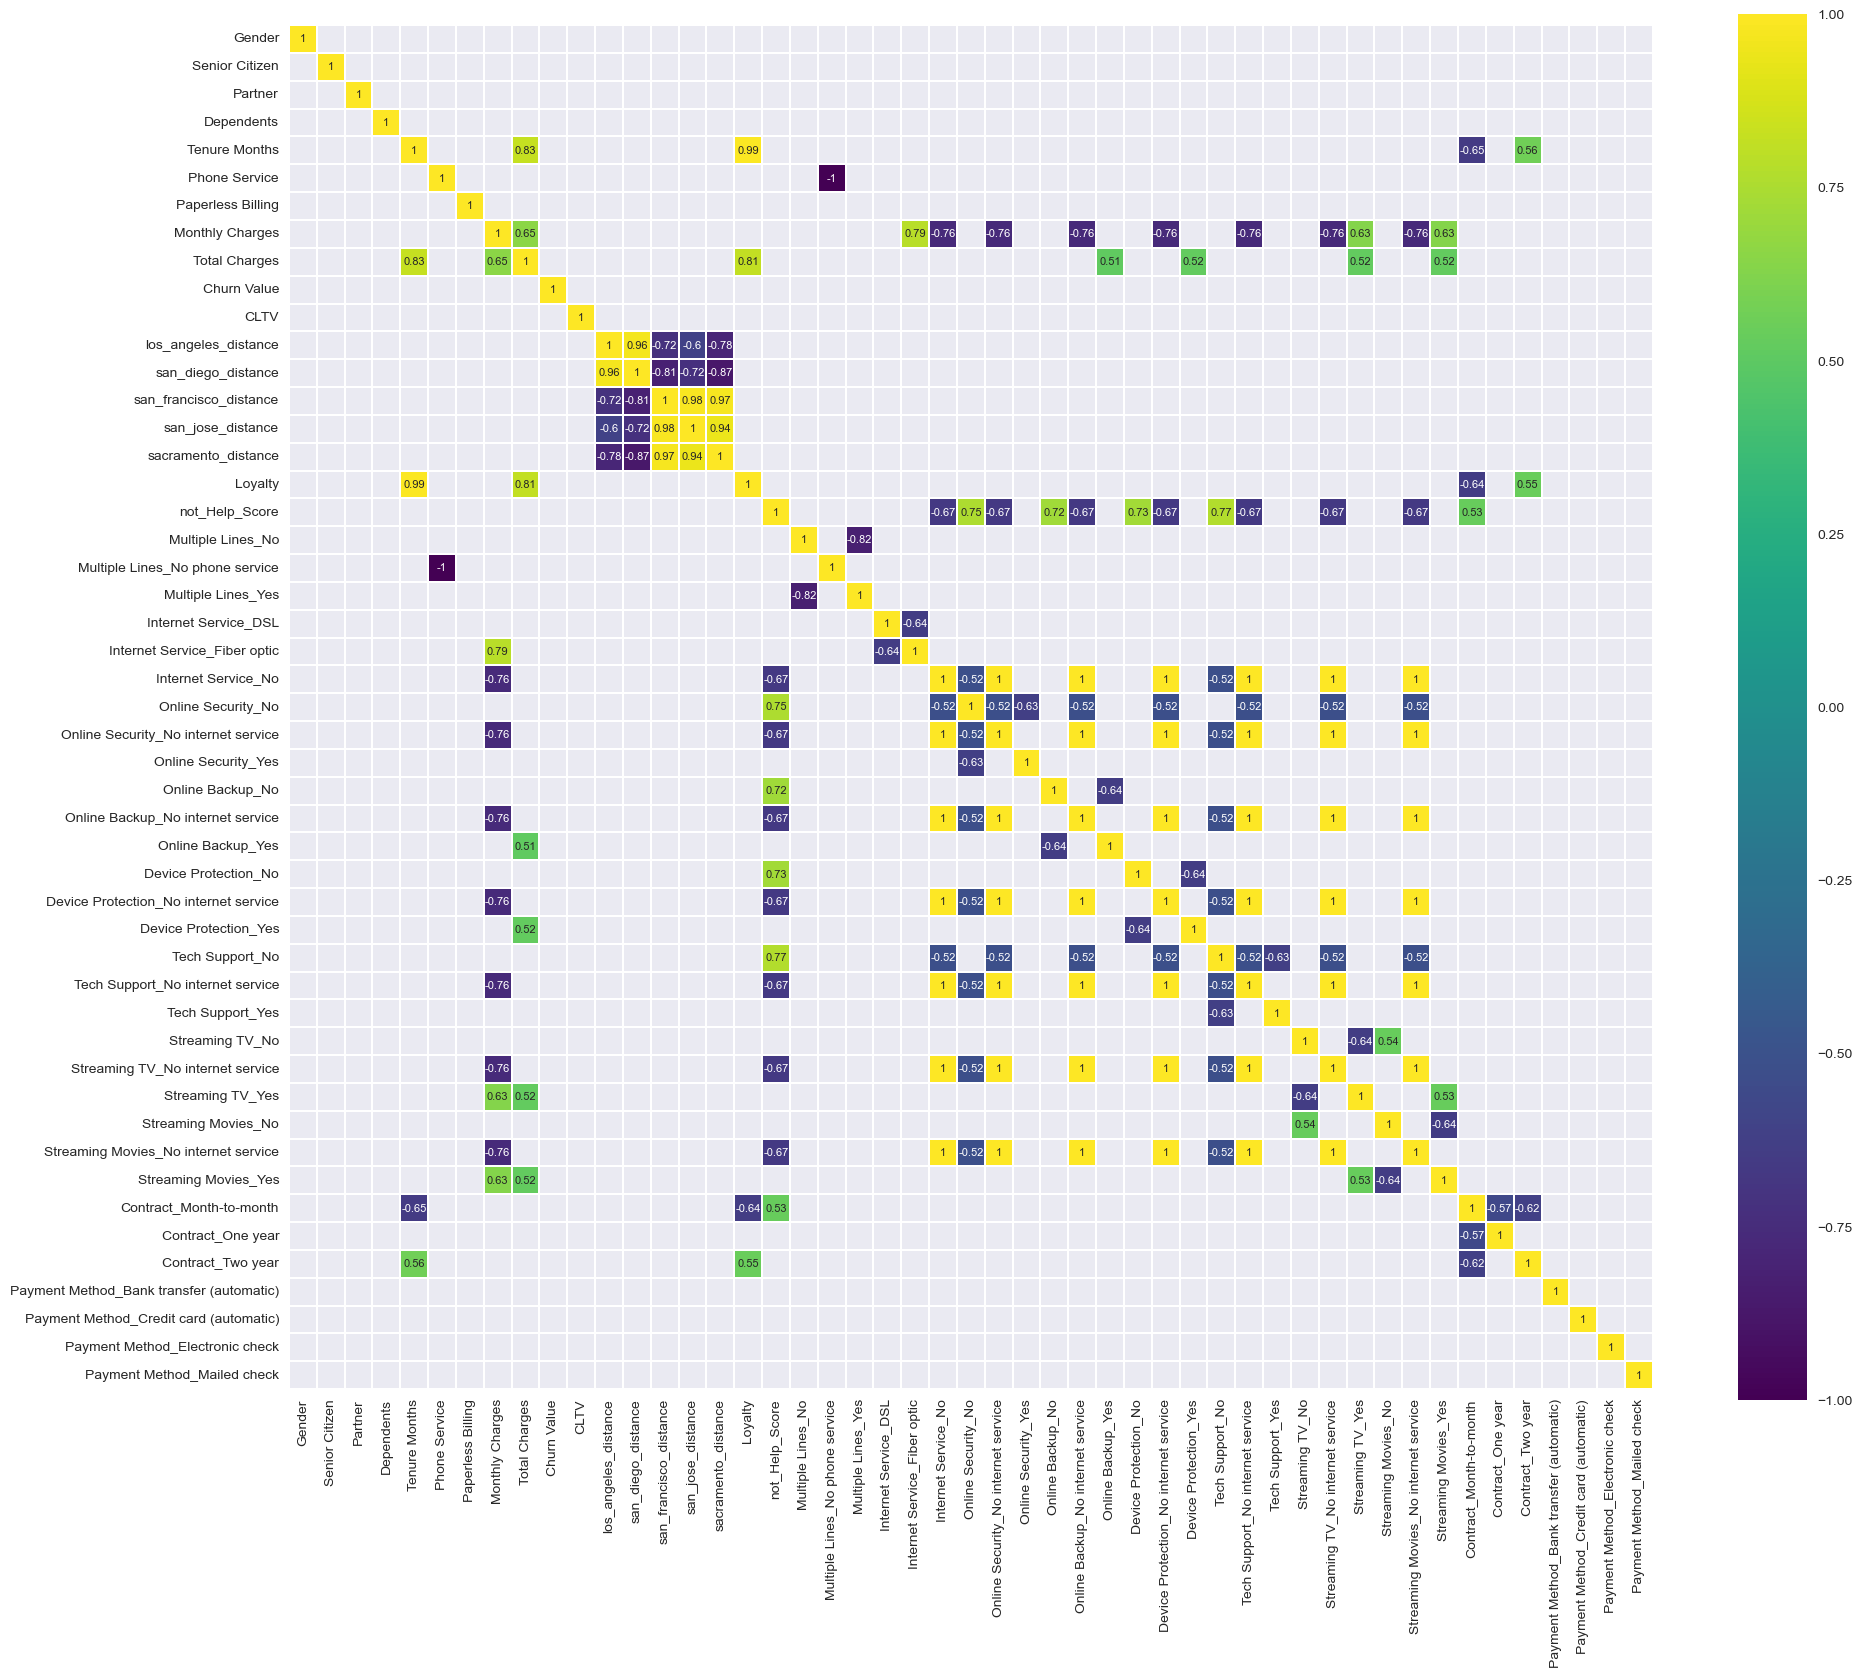

In [129]:
# Visulization of Pearson Correlation and show its value > 0.5 and value < -0.5
corr = df_FE.corr() # Examine correlations
plt.figure(figsize=(22, 18))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.savefig('F:bootcamp/projects/Final project/pearson corr.png')

### Feature Selection based on Importance and Correlation > 0.95 or < -0.95

In [130]:
df_FE = df_FE.drop(columns=['Gender', 'Phone Service'])  # according to feature importance
df_FE = df_FE.drop(columns=['Tenure Months', 'san_diego_distance', 'san_jose_distance', 'sacramento_distance', 
                            'Online Security_No internet service', 'Online Backup_No internet service',
                            'Device Protection_No internet service','Tech Support_No internet service',
                            'Streaming TV_No internet service', 'Streaming Movies_No internet service'])
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Senior Citizen                            7032 non-null   int64  
 1   Partner                                   7032 non-null   int64  
 2   Dependents                                7032 non-null   int64  
 3   Paperless Billing                         7032 non-null   int64  
 4   Monthly Charges                           7032 non-null   float64
 5   Total Charges                             7032 non-null   float64
 6   Churn Value                               7032 non-null   int64  
 7   CLTV                                      7032 non-null   int64  
 8   los_angeles_distance                      7032 non-null   float64
 9   san_francisco_distance                    7032 non-null   float64
 10  Loyalty                             

<AxesSubplot:>

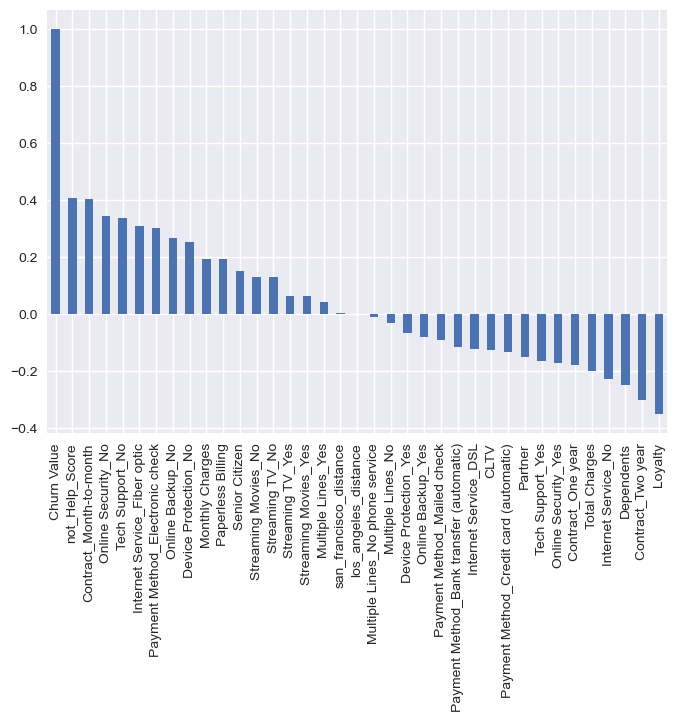

In [131]:
df_FE.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

### Normalization of Numerical Features (Monthly Charges, Total Charges, CLTV)

In [132]:
# MinMaxScaler for numerical features
mms = MinMaxScaler()
numerical_cols = ['Monthly Charges', 'Total Charges', 'CLTV', 'los_angeles_distance', 'san_francisco_distance']
for col in numerical_cols:
    df_FE[col] = mms.fit_transform(np.array(df_FE[col]).reshape(-1, 1))

In [133]:
df_FE.head()

Senior Citizen  Partner  Dependents  Paperless Billing  Monthly Charges  \
0               0        0           0                  1         0.354229   
1               0        0           1                  1         0.521891   
2               0        0           1                  1         0.809950   
3               0        1           1                  1         0.861194   
4               0        0           1                  1         0.850249   

   Total Charges  Churn Value      CLTV  los_angeles_distance  \
0       0.010310            1  0.274850              0.009106   
1       0.015330            1  0.155215              0.004968   
2       0.092511            1  0.749166              0.003715   
3       0.349325            1  0.667111              0.005759   
4       0.578987            1  0.742050              0.001619   

   san_francisco_distance  Loyalty  not_Help_Score  Multiple Lines_No  \
0                0.642773        1               2                  1   
1                0.631274        1               4                  1   
2                0.633278        1               3                  0   
3                0.630432        3               2                  0   
4                0.636025        4               2                  0   

   Multiple Lines_No phone service  Multiple Lines_Yes  Internet Service_DSL  \
0                                0                   0                     1   
1                                0                   0                     0   
2                                0                   1                     0   
3                                0                   1                     0   
4                                0                   1                     0   

   Internet Service_Fiber optic  Internet Service_No  Online Security_No  \
0                             0                    0                   0   
1                             1                    0                   1   
2                             1                    0                   1   
3                             1                    0                   1   
4                             1                    0                   1   

   Online Security_Yes  Online Backup_No  Online Backup_Yes  \
0                    1                 0                  1   
1                    0                 1                  0   
2                    0                 1                  0   
3                    0                 1                  0   
4                    0                 0                  1   

   Device Protection_No  Device Protection_Yes  Tech Support_No  \
0                     1                      0                1   
1                     1                      0                1   
2                     0                      1                1   
3                     0                      1                0   
4                     0                      1                1   

   Tech Support_Yes  Streaming TV_No  Streaming TV_Yes  Streaming Movies_No  \
0                 0                1                 0                    1   
1                 0                1                 0                    1   
2                 0                0                 1                    0   
3                 1                0                 1                    0   
4                 0                0                 1                    0   

   Streaming Movies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0                        1                  0   
1                     0                        1                  0   
2                     1                        1                  0   
3                     1                        1                  0   
4                     1                        1                  0   

   Contract_Two year  Payment Method_Bank transfer (automatic)  \
0               

In [134]:
def report_FE(dataframe):
    col = []
    d_type = []
    missing = []
    uniques = []
    n_uniques = []
    for column in df_FE.columns:
        col.append(column)
        d_type.append(df_FE[column].dtypes)
        missing.append(df_FE[column].isnull().sum())
        uniques.append(df_FE[column].unique()[:10]) # just show 5 unique values as example
        n_uniques.append(df_FE[column].nunique())
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'Numbers of Missing Value': missing, 'unique_value': uniques, 'n_uniques': n_uniques})

report_FE(df_FE)

Column   d_type  \
0                             Senior Citizen    int64   
1                                    Partner    int64   
2                                 Dependents    int64   
3                          Paperless Billing    int64   
4                            Monthly Charges  float64   
5                              Total Charges  float64   
6                                Churn Value    int64   
7                                       CLTV  float64   
8                       los_angeles_distance  float64   
9                     san_francisco_distance  float64   
10                                   Loyalty    int64   
11                            not_Help_Score    int64   
12                         Multiple Lines_No    uint8   
13           Multiple Lines_No phone service    uint8   
14                        Multiple Lines_Yes    uint8   
15                      Internet Service_DSL    uint8   
16              Internet Service_Fiber optic    uint8   
17                       Internet Service_No    uint8   
18                        Online Security_No    uint8   
19                       Online Security_Yes    uint8   
20                          Online Backup_No    uint8   
21                         Online Backup_Yes    uint8   
22                      Device Protection_No    uint8   
23                     Device Protection_Yes    uint8   
24                           Tech Support_No    uint8   
25                          Tech Support_Yes    uint8   
26                           Streaming TV_No    uint8   
27                          Streaming TV_Yes    uint8   
28                       Streaming Movies_No    uint8   
29                      Streaming Movies_Yes    uint8   
30                   Contract_Month-to-month    uint8   
31                         Contract_One year    uint8   
32                         Contract_Two year    uint8   
33  Payment Method_Bank transfer (automatic)    uint8   
34    Payment Method_Credit card (automatic)    uint8   
35           Payment Method_Electronic check    uint8   
36               Payment Method_Mailed check    uint8   

    Numbers of Missing Value  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   
5                          0   
6                          0   
7                          0   
8                          0   
9                          0   
10                         0   
11                         0   
12                         0   
13                         0   
14                         0   
15                         0   
16                         0   
17                         0   
18                         0   
19                         0   
20                         0   
21                         0   
22                         0   
23                         0   
24                         0   
25                         0   
26                         0   
27                         0   
28                         0   
29                         0   
30                         0   
31                         0   
32                         0   
33                         0   
34                         0   
35                         0   
36                         0   

                                         unique_value  n_uniques  
0                                              [0, 1]          2  
1                                              [0, 1]          2  
2                                              [0, 1]          2  
3                                              [1, 0]          2  
4   [0.35422885572139307, 0.5218905472636816, 0.80...       1584  
5   [0.010310408492960998, 0.015330025386568198, 0...       6530  
6                                              [1, 0]          2  
7   [0.27484989993328884, 0.15521458750277967, 0.7...       3435  
8   [0.009105856275610615, 0.004967584346122107, 0.

### Data Splitting

In [135]:
X = df_FE.drop(columns='Churn Value')
y = df_FE.loc[ : , 'Churn Value']
print(X.columns)
print(y.name)
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=2023, shuffle=True)

Index(['Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'CLTV', 'los_angeles_distance',
       'san_francisco_distance', 'Loyalty', 'not_Help_Score',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection_No', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_Yes', 'Streaming TV_No',
       'Streaming TV_Yes', 'Streaming Movies_No', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')
Churn Value


### Model Bundles and Selection

In [136]:
# build several models
def create_models(seed=2023):
    # seed is to fix the random state
    #build several models
    models = []
    models.append(('Dummy_Classifier',DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('K_Nearest_Neighbors', KNeighborsClassifier()))
    models.append(('Support_Vector_Machines', SVC(random_state=seed)))
    models.append(('Logistic_Regression', LogisticRegression(random_state=seed)))
    models.append(('Random_Forest', RandomForestClassifier(random_state=seed)))
    models.append(('AdaBoost_Classifier', AdaBoostClassifier(random_state=seed)))
    models.append(('Gradient_Boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('LGBM_Classifier', LGBMClassifier(random_state=seed)))
    models.append(('XGBoost_Classifier', XGBClassifier(random_state=seed)))
    models.append(('Naive_Bayes_GaussianNB', GaussianNB()))
    models.append(('Naive_Bayes_ComplementNB', ComplementNB()))
    models.append(('KMeans_Clustering',KMeans(n_clusters=2, random_state=seed)))
    models.append(('Artificial_Neural_Network', Sequential(
                                                           [
                                                            layers.Dense(units=8, input_dim=len(df_FE.columns)-1, activation='relu'),
                                                            layers.Dense(units=8, activation='relu'),
                                                            layers.Dense(units=1, activation='sigmoid')
                                                           ])))
    
    return models

In [137]:
models = create_models()
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
results_roc_auc = []
names = []

for name, model in models:
    # fit the model with the training data
    if name == 'Artificial_Neural_Network':
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0)
        # make predictions with the testing data
        predictions = np.round(model.predict(X_test, verbose=0)).astype(int)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy.append(round(accuracy, 4))
        results_precision.append(round(precision, 4))
        results_recall.append(round(recall, 4))
        results_f1.append(round(f1, 4))
        results_roc_auc.append(round(roc_auc, 4))
        names.append(name)

    elif name == 'KMeans_Clustering':
        model.fit(X_train)
        # make predictions with the testing data
        predictions = model.predict(X_test)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy.append(round(accuracy, 4))
        results_precision.append(round(precision, 4))
        results_recall.append(round(recall, 4))
        results_f1.append(round(f1, 4))
        results_roc_auc.append(round(roc_auc, 4))
        names.append(name)
        
    else: 
        model = model.fit(X_train, y_train)
        # make predictions with the testing data
        predictions = model.predict(X_test)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy.append(round(accuracy, 4))
        results_precision.append(round(precision, 4))
        results_recall.append(round(recall, 4))
        results_f1.append(round(f1, 4))
        results_roc_auc.append(round(roc_auc, 4))
        names.append(name)
        
# build results dataframe
results = pd.DataFrame({'Model_name': names, 'Accuracy': results_accuracy, 'Precision_Score': results_precision,
                        'Recall_Score': results_recall, 'f1_Score': results_f1, 'ROC_AUC_Score': results_roc_auc})
# show results
display(results)

Model_name  Accuracy  Precision_Score  Recall_Score  \
0            Dummy_Classifier    0.7503           0.0000        0.0000   
1         K_Nearest_Neighbors    0.7850           0.5721        0.5513   
2     Support_Vector_Machines    0.8168           0.6726        0.5194   
3         Logistic_Regression    0.8197           0.6572        0.5809   
4               Random_Forest    0.8151           0.6541        0.5513   
5         AdaBoost_Classifier    0.8208           0.6527        0.6036   
6           Gradient_Boosting    0.8294           0.6768        0.6059   
7             LGBM_Classifier    0.8225           0.6649        0.5831   
8          XGBoost_Classifier    0.7964           0.5995        0.5558   
9      Naive_Bayes_GaussianNB    0.7685           0.5242        0.7904   
10   Naive_Bayes_ComplementNB    0.7582           0.5101        0.8041   
11          KMeans_Clustering    0.3458           0.0900        0.1777   
12  Artificial_Neural_Network    0.8151           0.6425        0.5854   

    f1_Score  ROC_AUC_Score  
0     0.0000         0.5000  
1     0.5615         0.7070  
2     0.5861         0.7176  
3     0.6167         0.7400  
4     0.5983         0.7271  
5     0.6272         0.7484  
6     0.6394         0.7548  
7     0.6214         0.7427  
8     0.5768         0.7161  
9     0.6303         0.7758  
10    0.6242         0.7735  
11    0.1194         0.2897  
12    0.6126         0.7385

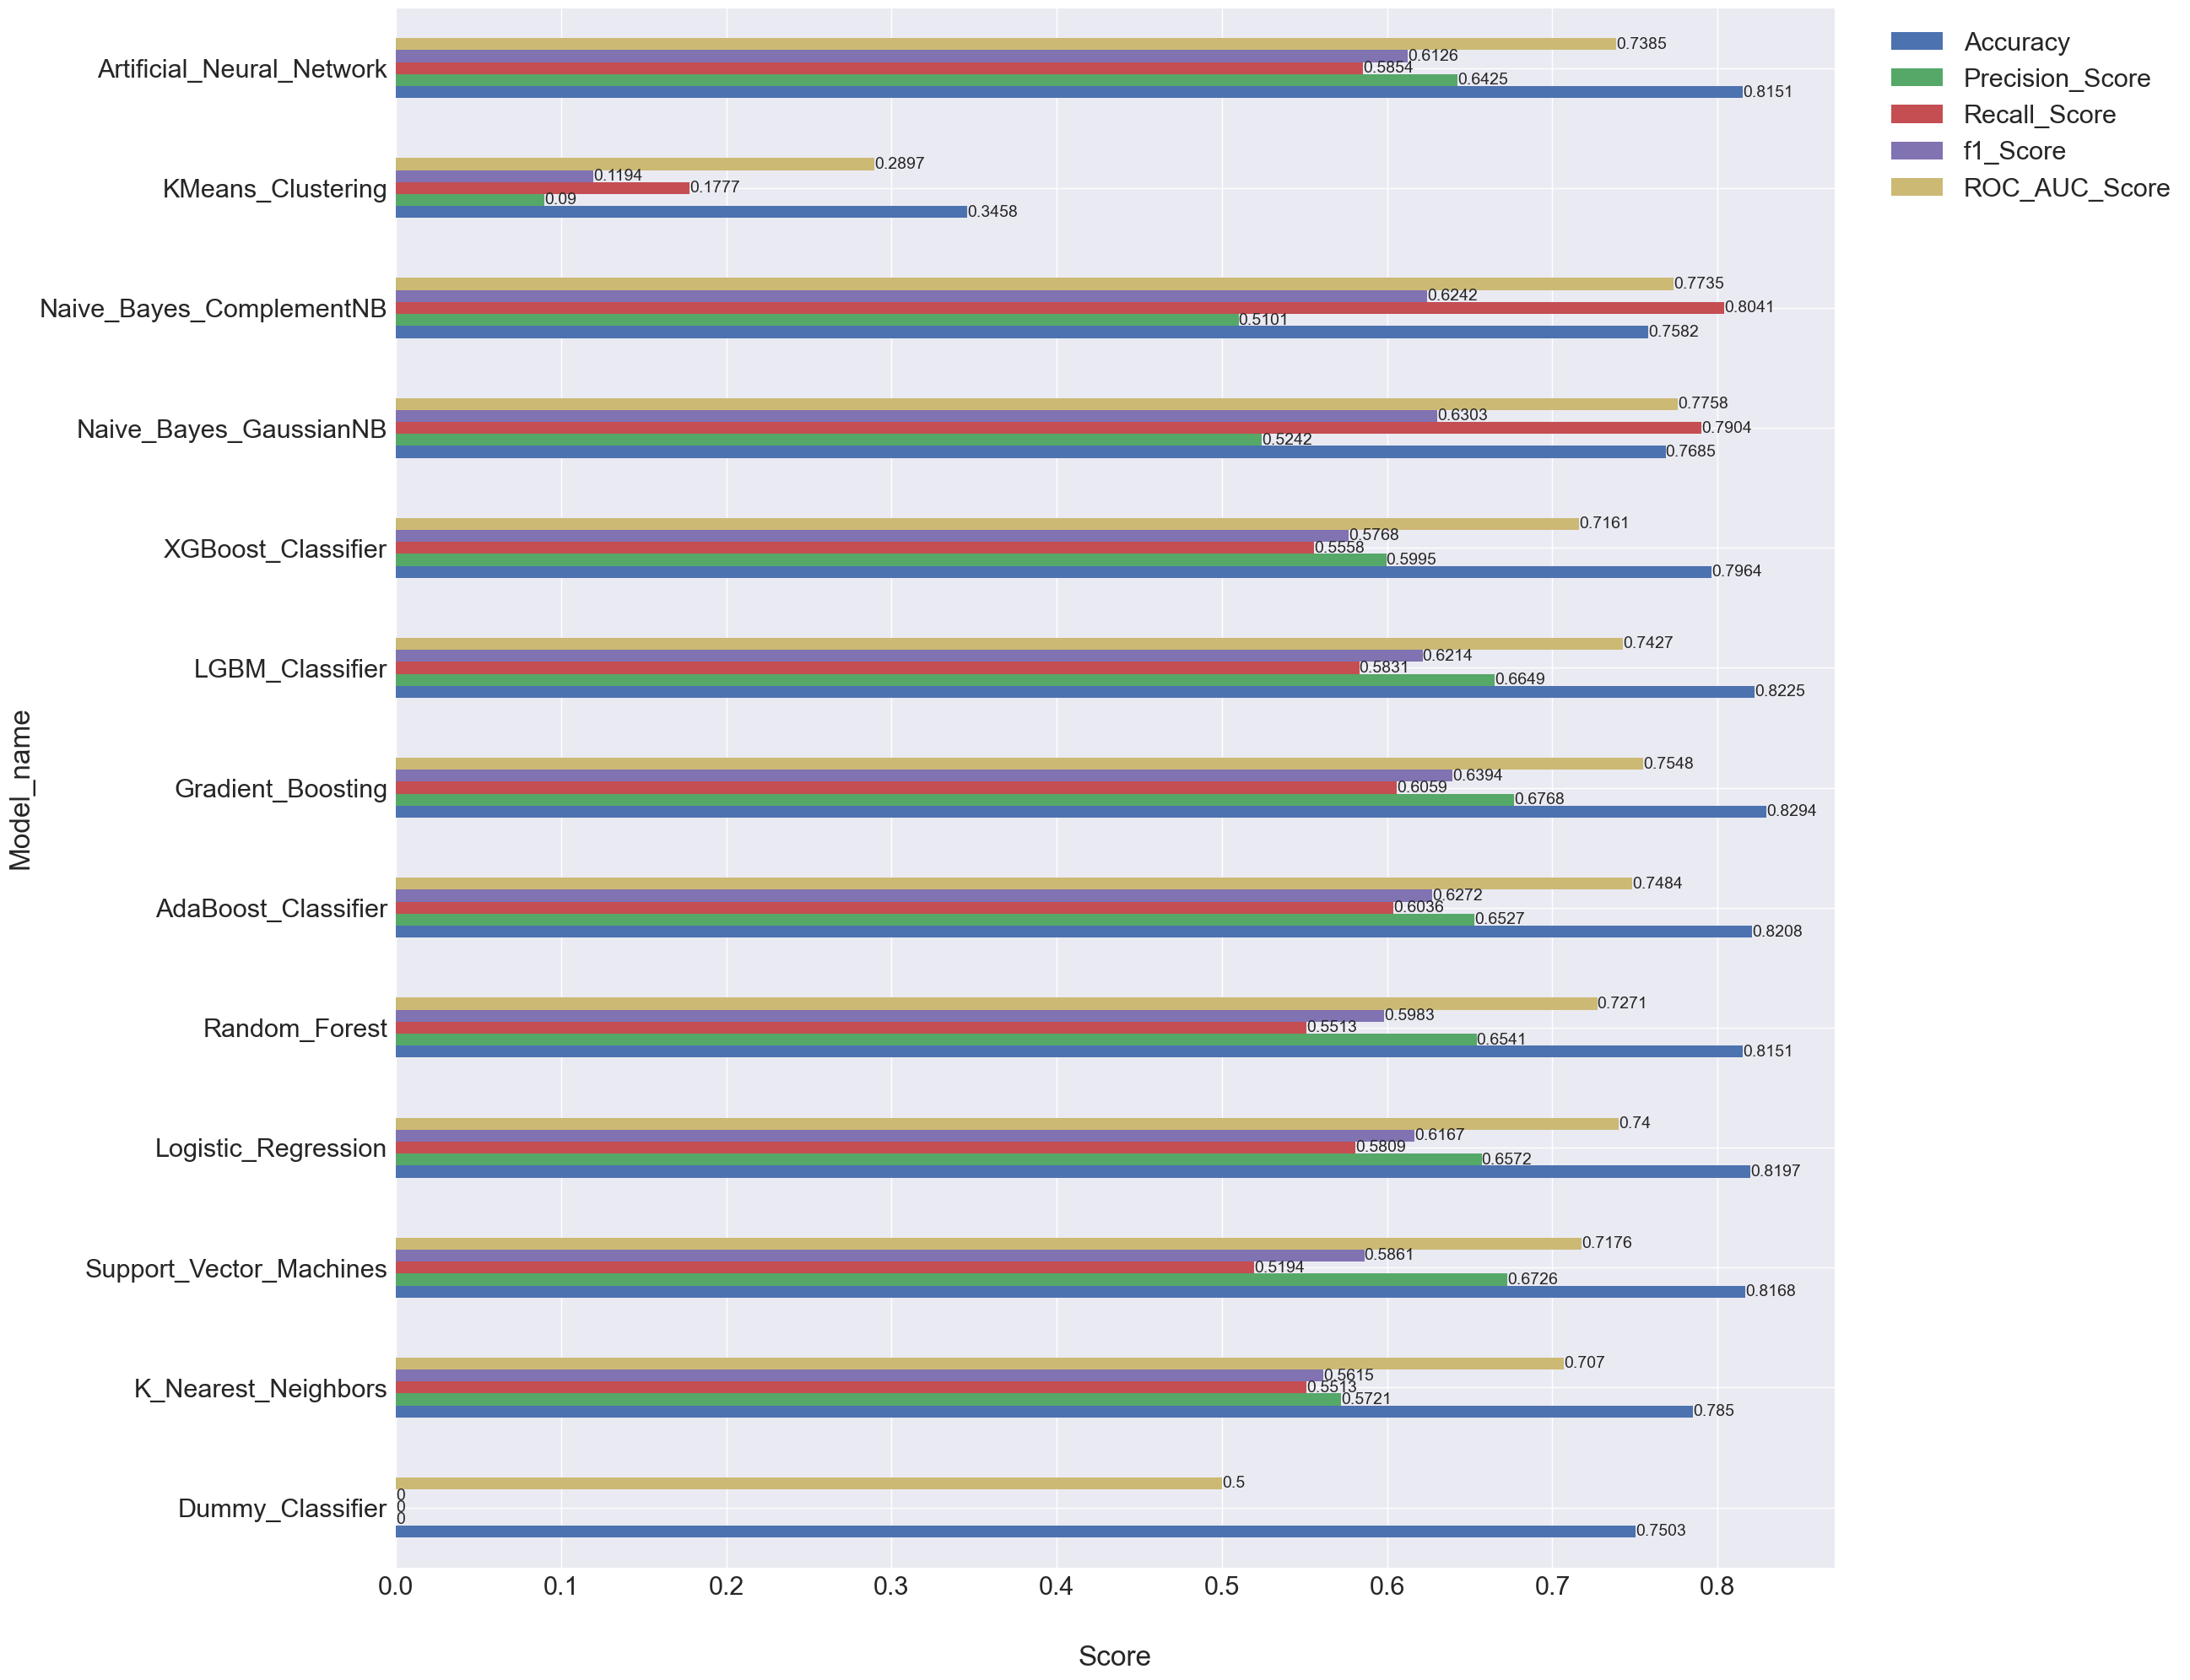

In [138]:
def model_score_plot(results):
    ax = results.plot(x = 'Model_name', y = results.iloc[:,1:].columns.values.tolist(), kind = 'barh', figsize=(22,24), fontsize = 22)
    ax.legend(bbox_to_anchor=(1.25, 1.0), fontsize = 22)
    for container in ax.containers:
        ax.bar_label(container, size = 14)
    ax.yaxis.label.set_fontsize(24)
    plt.xlabel('Score', fontsize = 24)
    ax.xaxis.set_label_coords(0.5, -.05)
model_score_plot(results)
plt.savefig('F:bootcamp/projects/Final project/model_screening', bbox_inches='tight')

### Note: Before optimization, graident_boosting achieves highest accuracy score.

### Model Optimization

#### Imbalance Data Handling

In [139]:
# resampling using SMOTE
smote = SMOTE(sampling_strategy = "minority")
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote.value_counts()

1    3844
0    3844
Name: Churn Value, dtype: int64

In [140]:
# spliting data
X_train_s, y_train_s = X_smote, y_smote
X_test_s, y_test_s = X_test, y_test

In [141]:
results_accuracy_s = []
results_precision_s = []
results_recall_s = []
results_f1_s = []
results_roc_auc_s = []
names_s = []

for name, model in models:
    # fit the model with the training data
    if name == 'Artificial_Neural_Network':
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train_s, y_train_s, epochs=100, batch_size=50, verbose=0)
        # make predictions with the testing data
        predictions = np.round(model.predict(X_test_s, verbose=0)).astype(int)
        # calculate accuracy 
        accuracy = accuracy_score(y_test_s, predictions)
        precision = precision_score(y_test_s, predictions)
        recall = recall_score(y_test_s, predictions)
        f1 = f1_score(y_test_s, predictions)
        roc_auc = roc_auc_score(y_test_s, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy_s.append(round(accuracy, 4))
        results_precision_s.append(round(precision, 4))
        results_recall_s.append(round(recall, 4))
        results_f1_s.append(round(f1, 4))
        results_roc_auc_s.append(round(roc_auc, 4))
        names_s.append(name)

    elif name == 'KMeans_Clustering':
        model.fit(X_train_s)
        # make predictions with the testing data
        predictions = model.predict(X_test_s)
        # calculate accuracy 
        accuracy = accuracy_score(y_test_s, predictions)
        precision = precision_score(y_test_s, predictions)
        recall = recall_score(y_test_s, predictions)
        f1 = f1_score(y_test_s, predictions)
        roc_auc = roc_auc_score(y_test_s, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy_s.append(round(accuracy, 4))
        results_precision_s.append(round(precision, 4))
        results_recall_s.append(round(recall, 4))
        results_f1_s.append(round(f1, 4))
        results_roc_auc_s.append(round(roc_auc, 4))
        names_s.append(name)
        
    else:
        model = model.fit(X_train_s, y_train_s)
        # make predictions with the testing data
        predictions = model.predict(X_test_s)
        # calculate accuracy 
        accuracy = accuracy_score(y_test_s, predictions)
        precision = precision_score(y_test_s, predictions)
        recall = recall_score(y_test_s, predictions)
        f1 = f1_score(y_test_s, predictions)
        roc_auc = roc_auc_score(y_test_s, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy_s.append(round(accuracy, 4))
        results_precision_s.append(round(precision, 4))
        results_recall_s.append(round(recall, 4))
        results_f1_s.append(round(f1, 4))
        results_roc_auc_s.append(round(roc_auc, 4))
        names_s.append(name)

# build results dataframe
results_s = pd.DataFrame({'Model_name': names_s, 'Accuracy_s': results_accuracy_s, 'Precision_Score_s': results_precision_s,
                        'Recall_Score_s': results_recall_s, 'f1_Score_s': results_f1_s, 'ROC_AUC_Score_s': results_roc_auc_s})
# show results
display(results_s)

Model_name  Accuracy_s  Precision_Score_s  Recall_Score_s  \
0            Dummy_Classifier      0.7503             0.0000          0.0000   
1         K_Nearest_Neighbors      0.7321             0.4758          0.7153   
2     Support_Vector_Machines      0.7861             0.5568          0.7039   
3         Logistic_Regression      0.7924             0.5663          0.7198   
4               Random_Forest      0.7844             0.5588          0.6492   
5         AdaBoost_Classifier      0.7742             0.5323          0.7882   
6           Gradient_Boosting      0.7787             0.5407          0.7563   
7             LGBM_Classifier      0.7895             0.5642          0.6902   
8          XGBoost_Classifier      0.7873             0.5619          0.6720   
9      Naive_Bayes_GaussianNB      0.7708             0.5277          0.7813   
10   Naive_Bayes_ComplementNB      0.7685             0.5242          0.7904   
11          KMeans_Clustering      0.2975             0.0939          0.2096   
12  Artificial_Neural_Network      0.7873             0.5575          0.7175   

    f1_Score_s  ROC_AUC_Score_s  
0       0.0000           0.5000  
1       0.5714           0.7265  
2       0.6217           0.7587  
3       0.6339           0.7682  
4       0.6006           0.7393  
5       0.6354           0.7788  
6       0.6306           0.7712  
7       0.6209           0.7564  
8       0.6120           0.7488  
9       0.6299           0.7743  
10      0.6303           0.7758  
11      0.1297           0.2682  
12      0.6275           0.7640

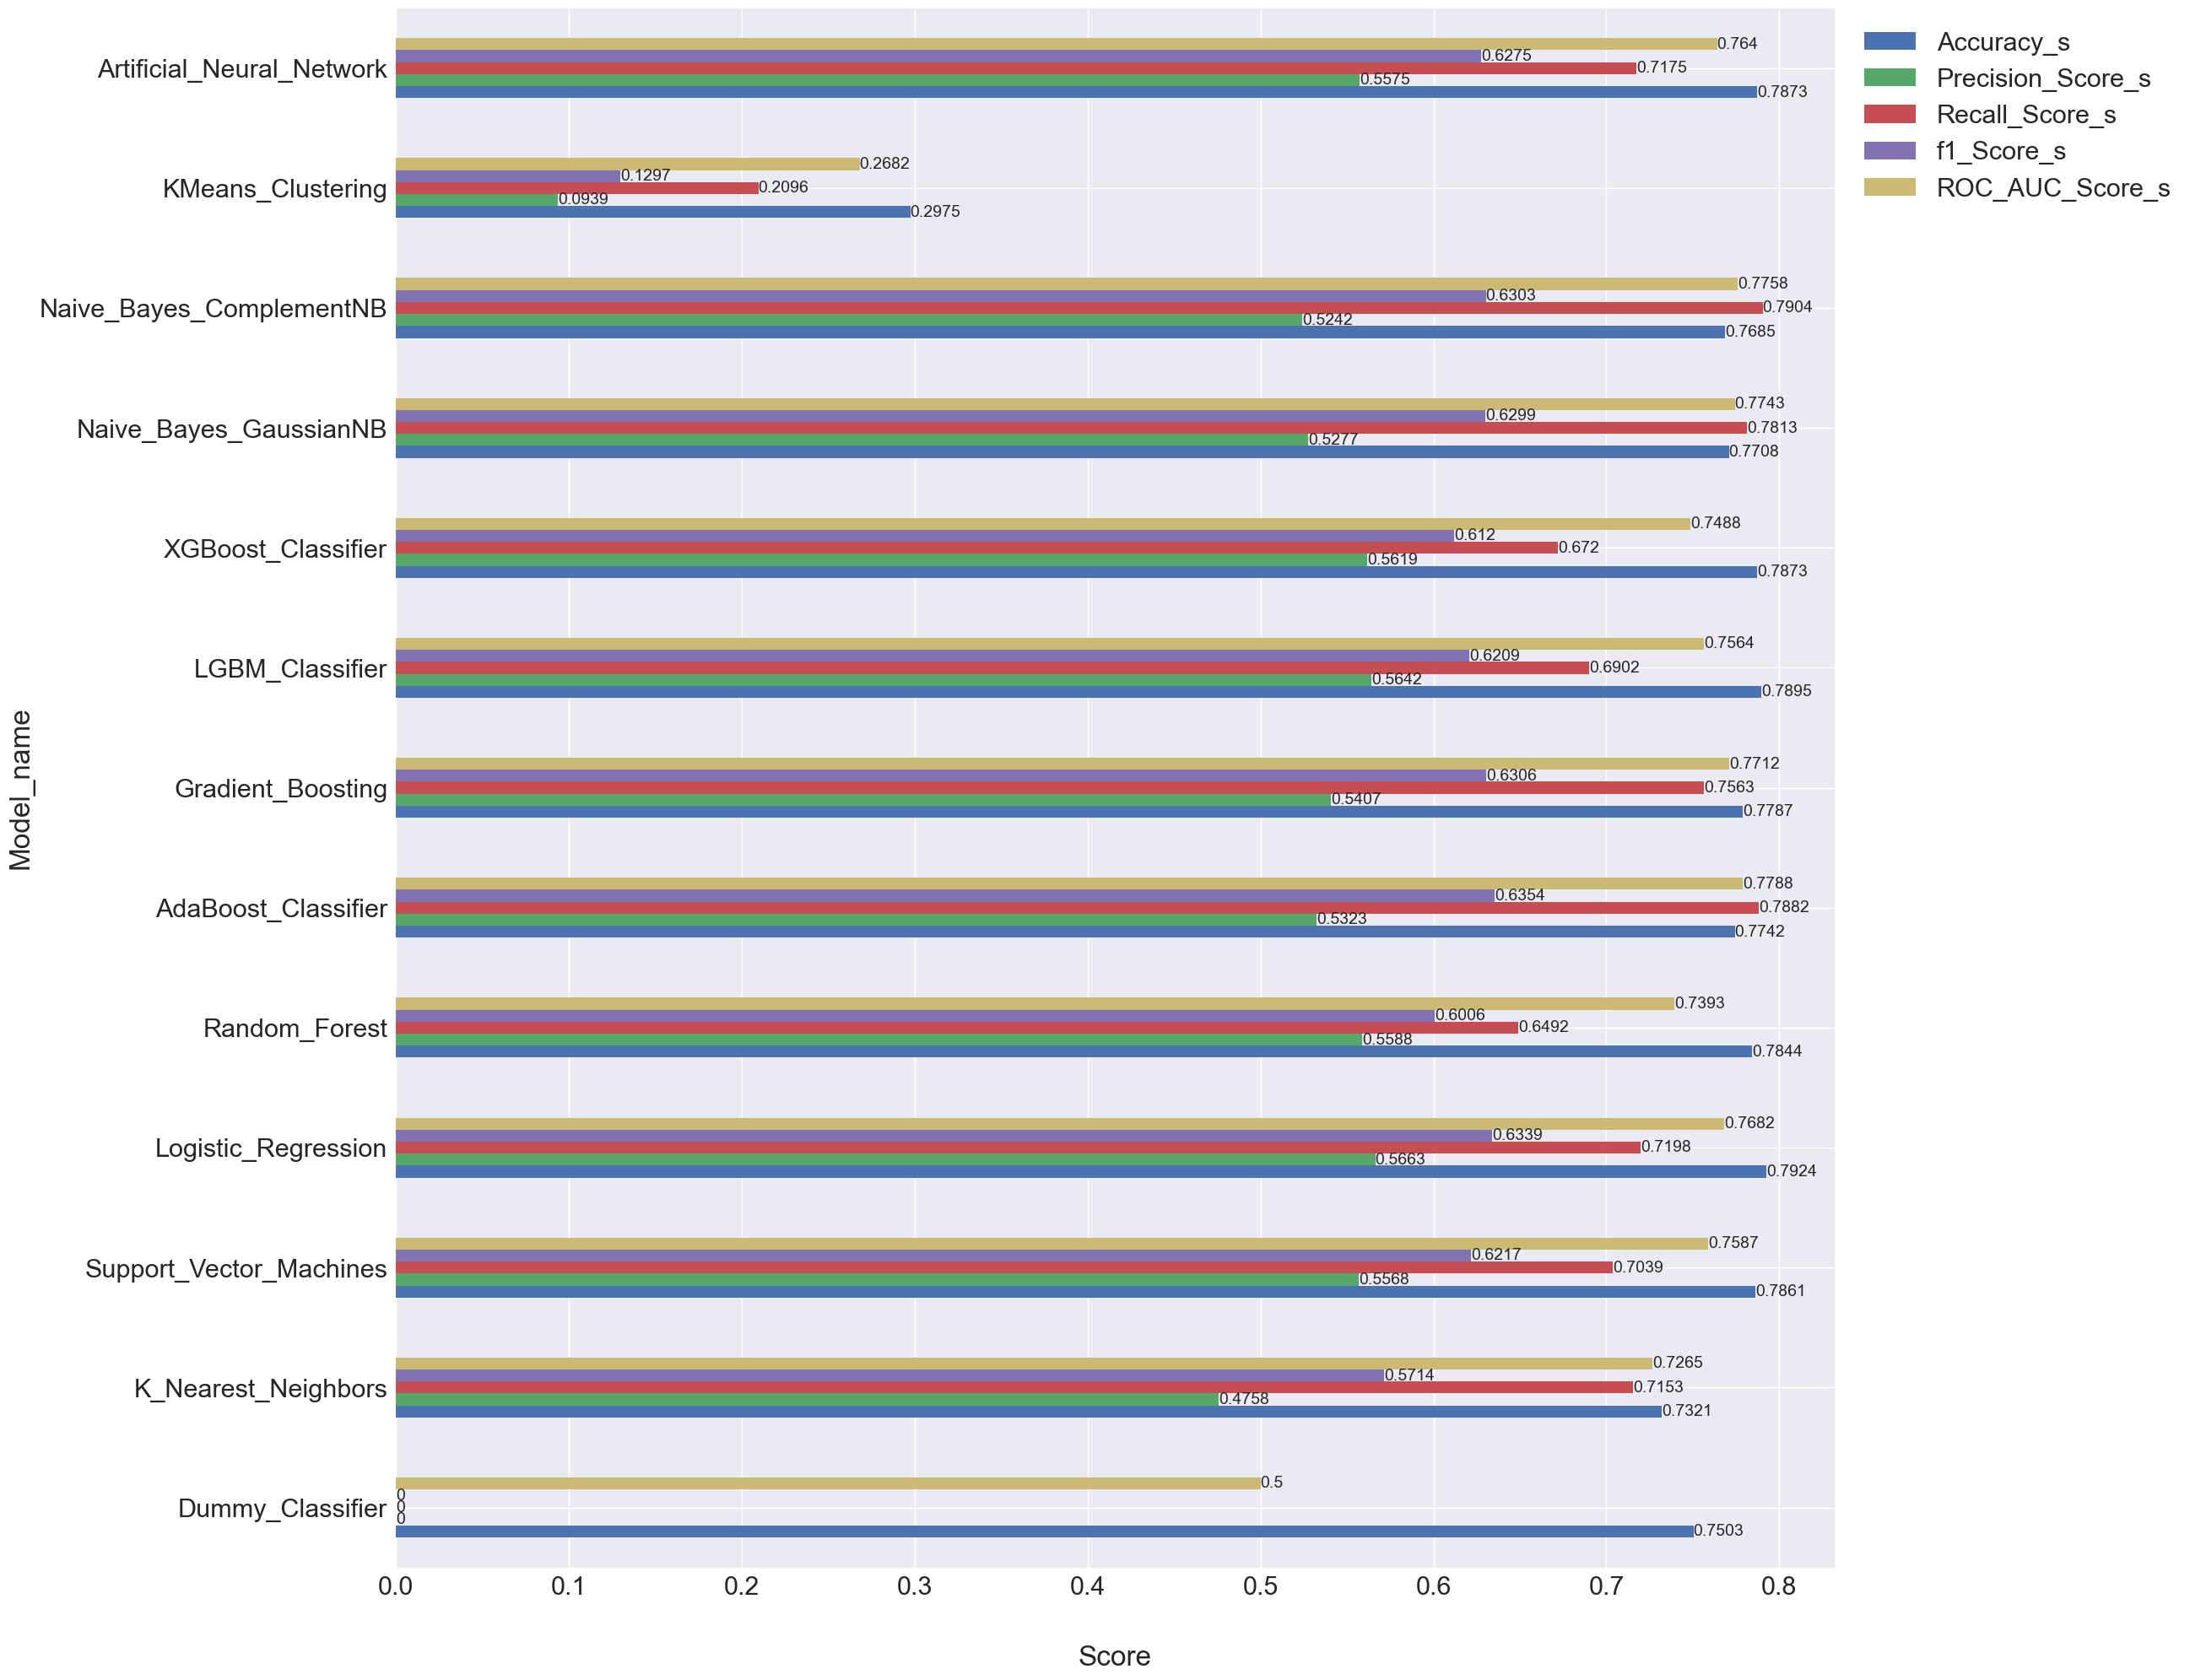

In [142]:
model_score_plot(results_s)
plt.savefig('F:bootcamp/projects/Final project/model_screening_smote', bbox_inches='tight')

In [143]:
results_total = pd.merge(results, results_s, how = 'inner')
display(results_total)

Model_name  Accuracy  Precision_Score  Recall_Score  \
0            Dummy_Classifier    0.7503           0.0000        0.0000   
1         K_Nearest_Neighbors    0.7850           0.5721        0.5513   
2     Support_Vector_Machines    0.8168           0.6726        0.5194   
3         Logistic_Regression    0.8197           0.6572        0.5809   
4               Random_Forest    0.8151           0.6541        0.5513   
5         AdaBoost_Classifier    0.8208           0.6527        0.6036   
6           Gradient_Boosting    0.8294           0.6768        0.6059   
7             LGBM_Classifier    0.8225           0.6649        0.5831   
8          XGBoost_Classifier    0.7964           0.5995        0.5558   
9      Naive_Bayes_GaussianNB    0.7685           0.5242        0.7904   
10   Naive_Bayes_ComplementNB    0.7582           0.5101        0.8041   
11          KMeans_Clustering    0.3458           0.0900        0.1777   
12  Artificial_Neural_Network    0.8151           0.6425        0.5854   

    f1_Score  ROC_AUC_Score  Accuracy_s  Precision_Score_s  Recall_Score_s  \
0     0.0000         0.5000      0.7503             0.0000          0.0000   
1     0.5615         0.7070      0.7321             0.4758          0.7153   
2     0.5861         0.7176      0.7861             0.5568          0.7039   
3     0.6167         0.7400      0.7924             0.5663          0.7198   
4     0.5983         0.7271      0.7844             0.5588          0.6492   
5     0.6272         0.7484      0.7742             0.5323          0.7882   
6     0.6394         0.7548      0.7787             0.5407          0.7563   
7     0.6214         0.7427      0.7895             0.5642          0.6902   
8     0.5768         0.7161      0.7873             0.5619          0.6720   
9     0.6303         0.7758      0.7708             0.5277          0.7813   
10    0.6242         0.7735      0.7685             0.5242          0.7904   
11    0.1194         0.2897      0.2975             0.0939          0.2096   
12    0.6126         0.7385      0.7873             0.5575          0.7175   

    f1_Score_s  ROC_AUC_Score_s  
0       0.0000           0.5000  
1       0.5714           0.7265  
2       0.6217           0.7587  
3       0.6339           0.7682  
4       0.6006           0.7393  
5       0.6354           0.7788  
6       0.6306           0.7712  
7       0.6209           0.7564  
8       0.6120           0.7488  
9       0.6299           0.7743  
10      0.6303           0.7758  
11      0.1297           0.2682  
12      0.6275           0.7640

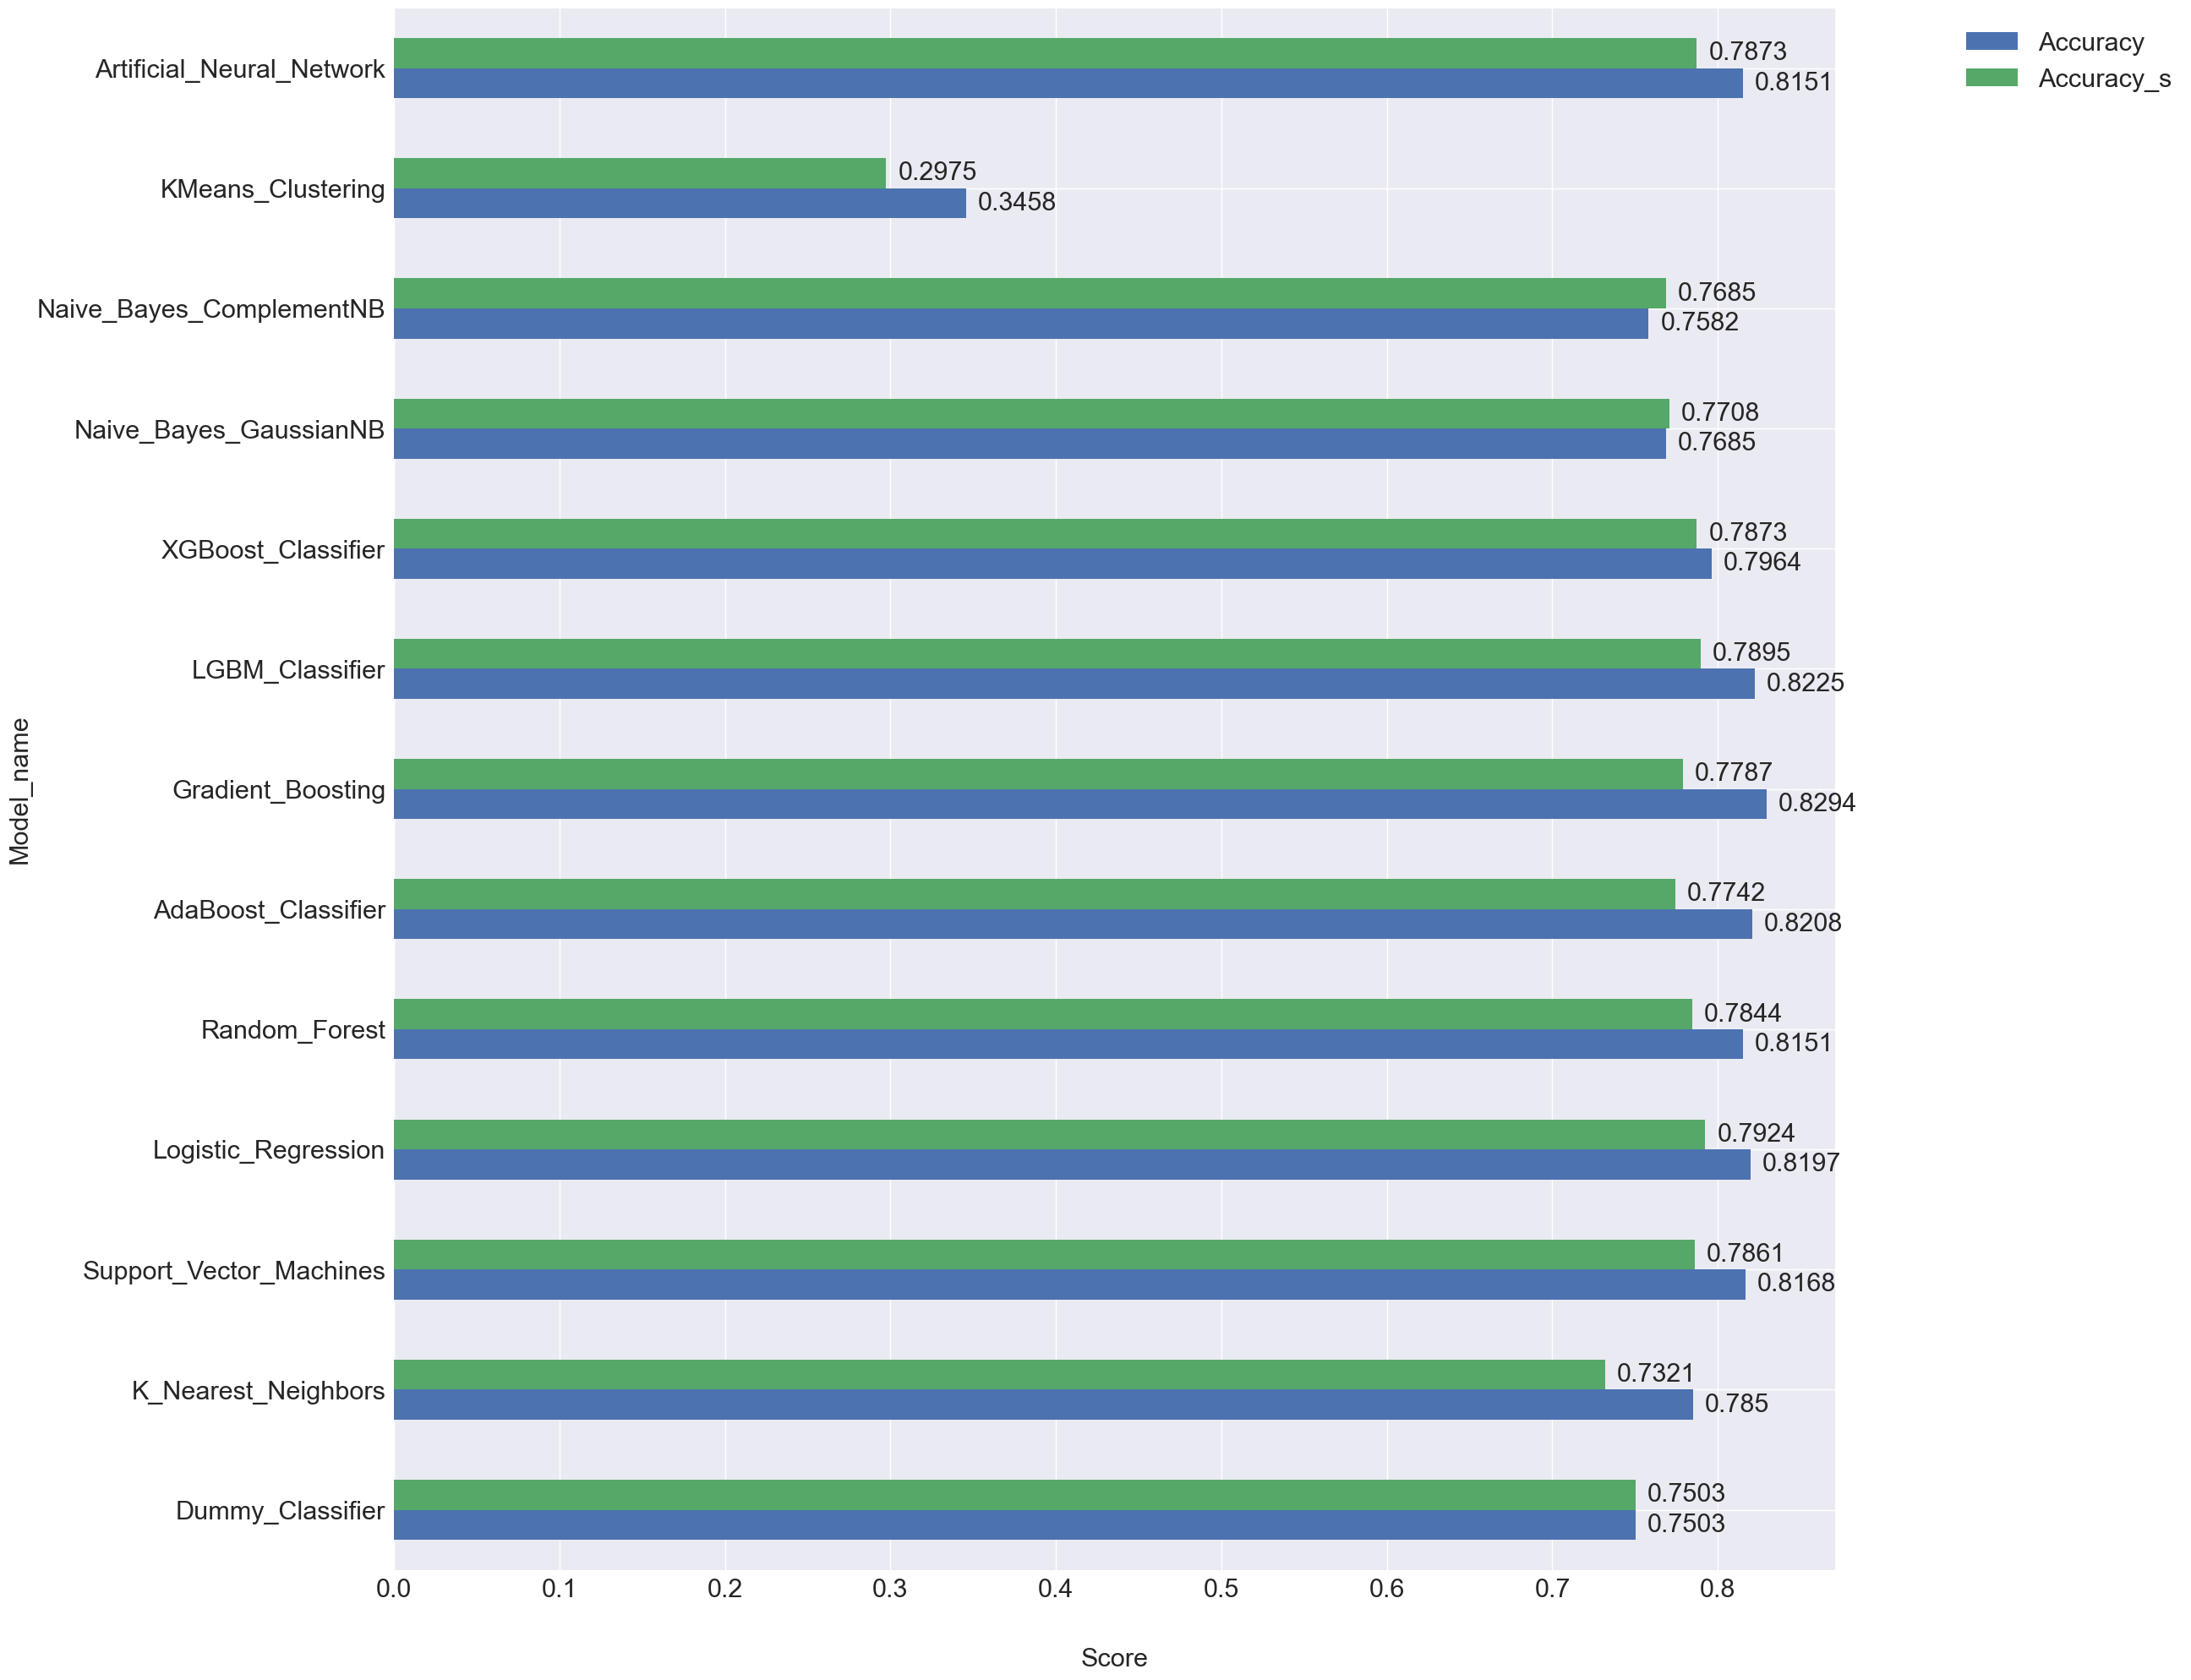

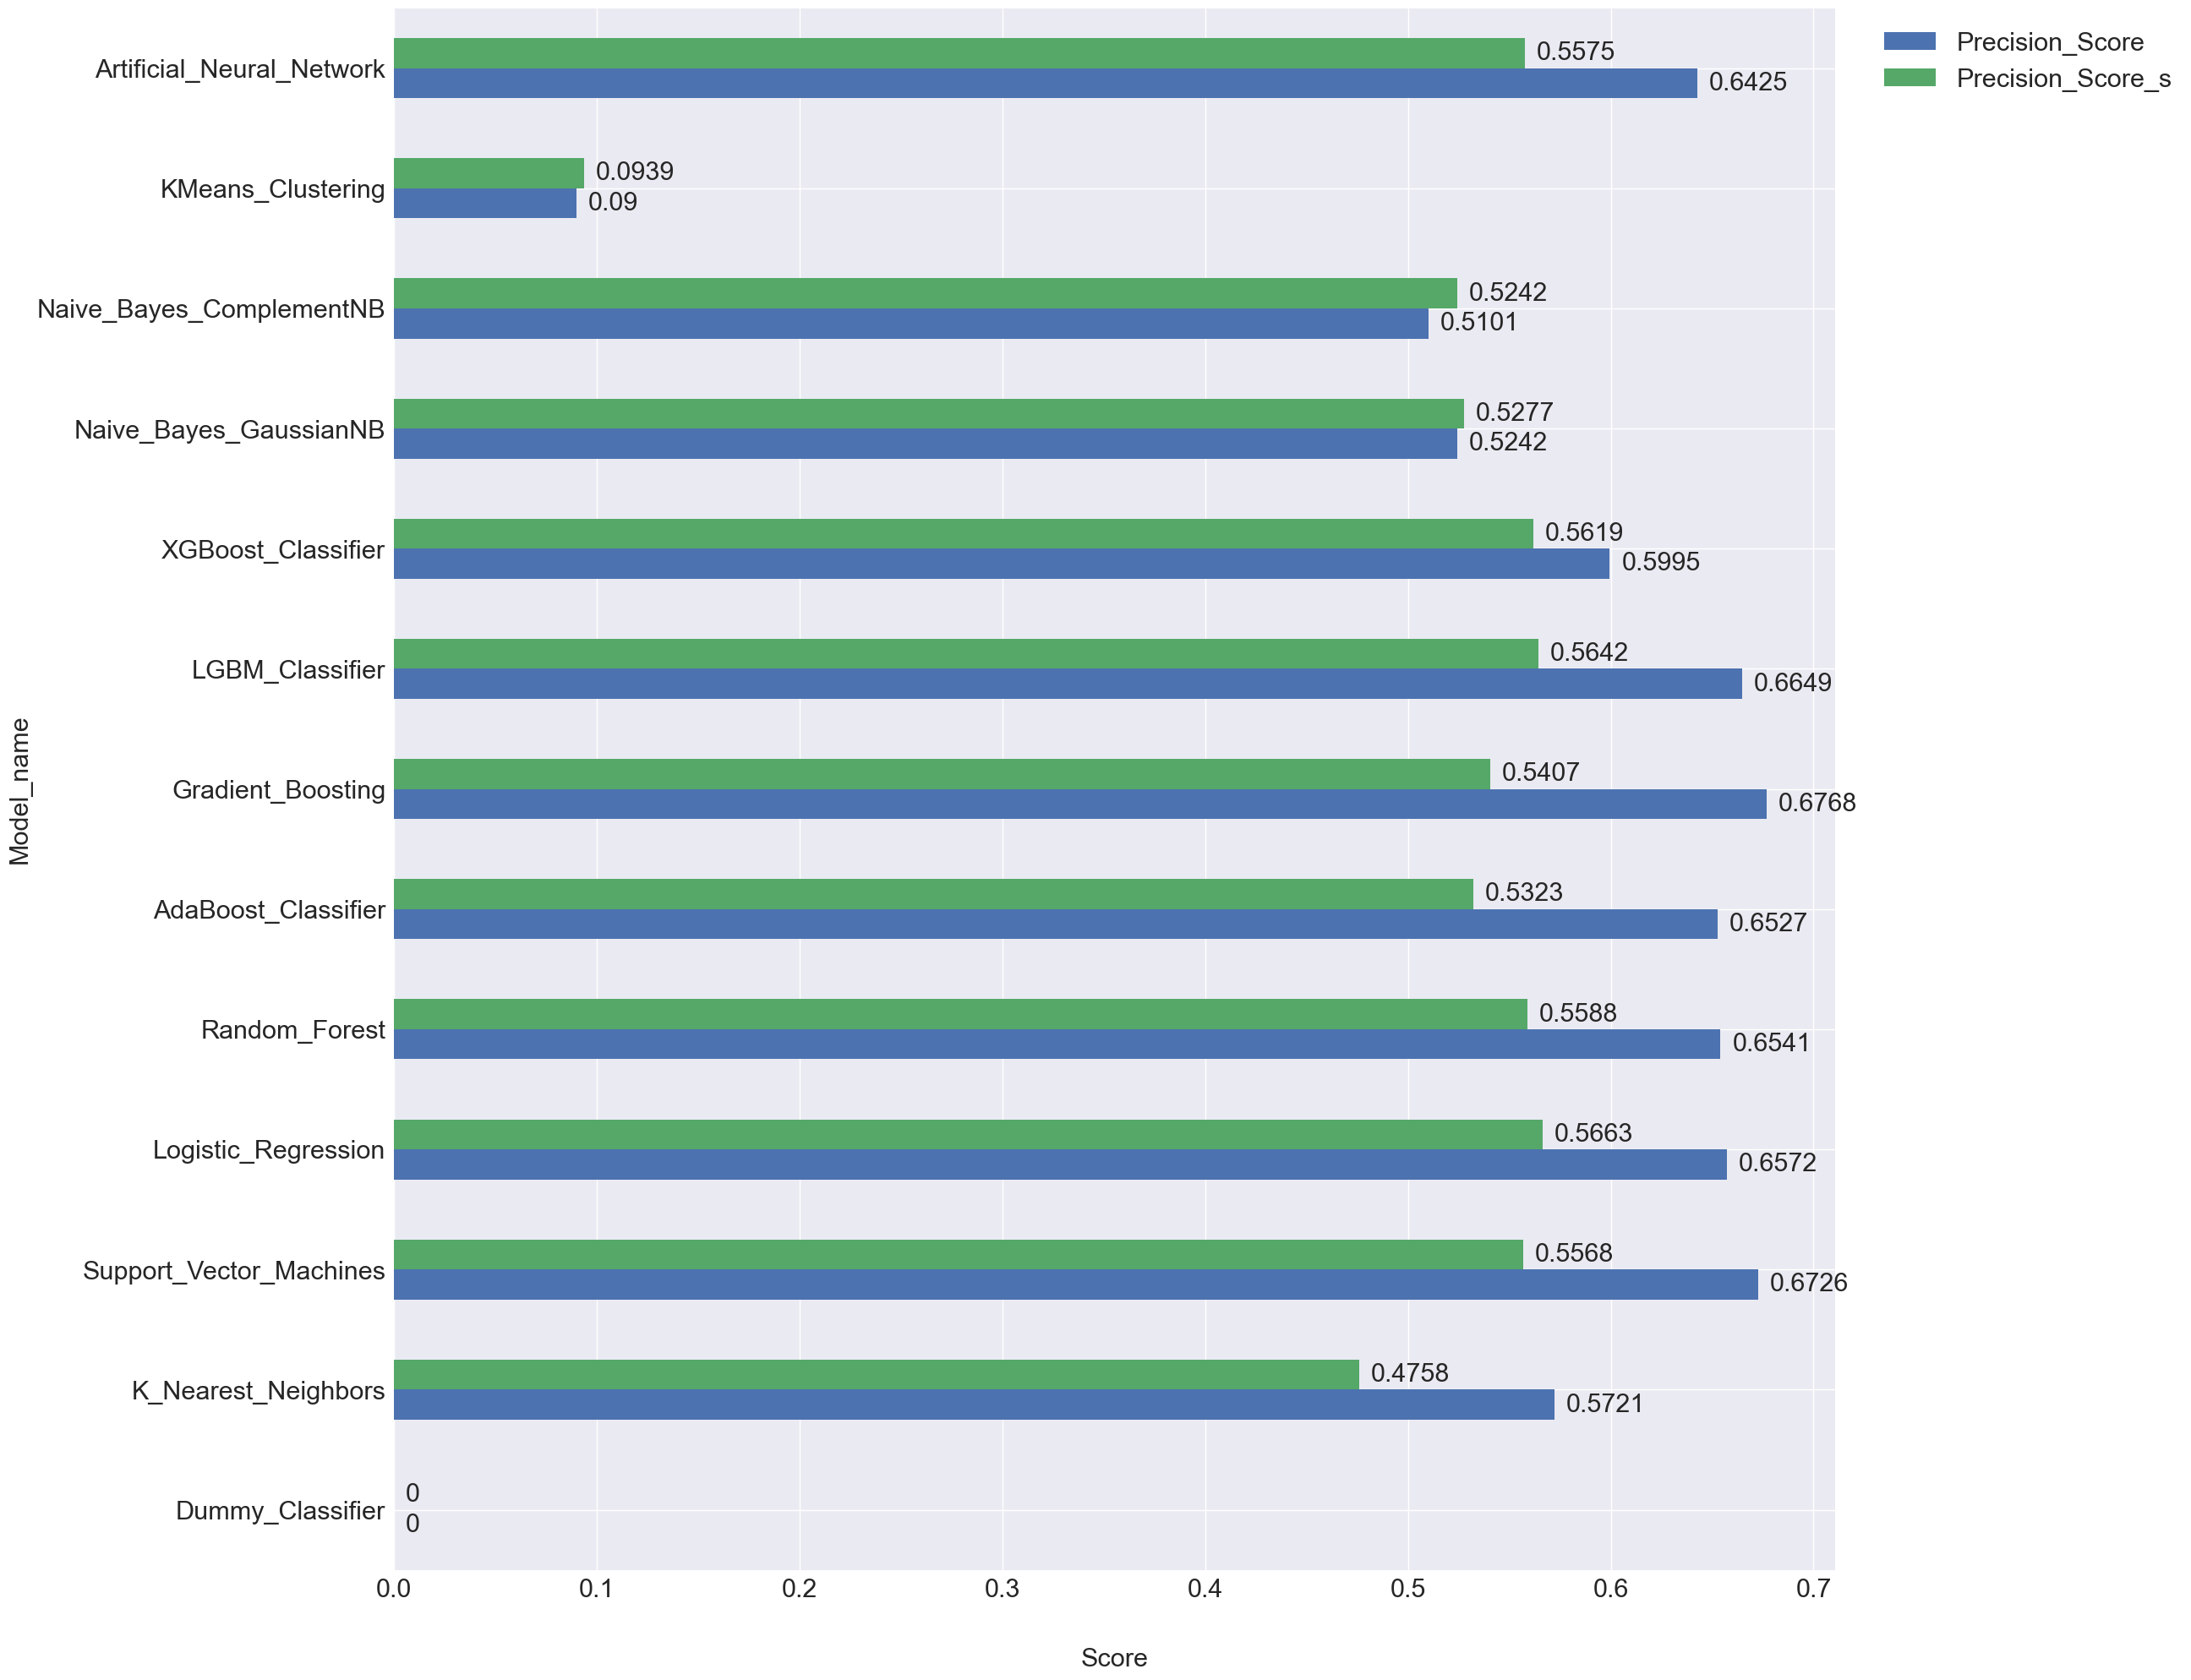

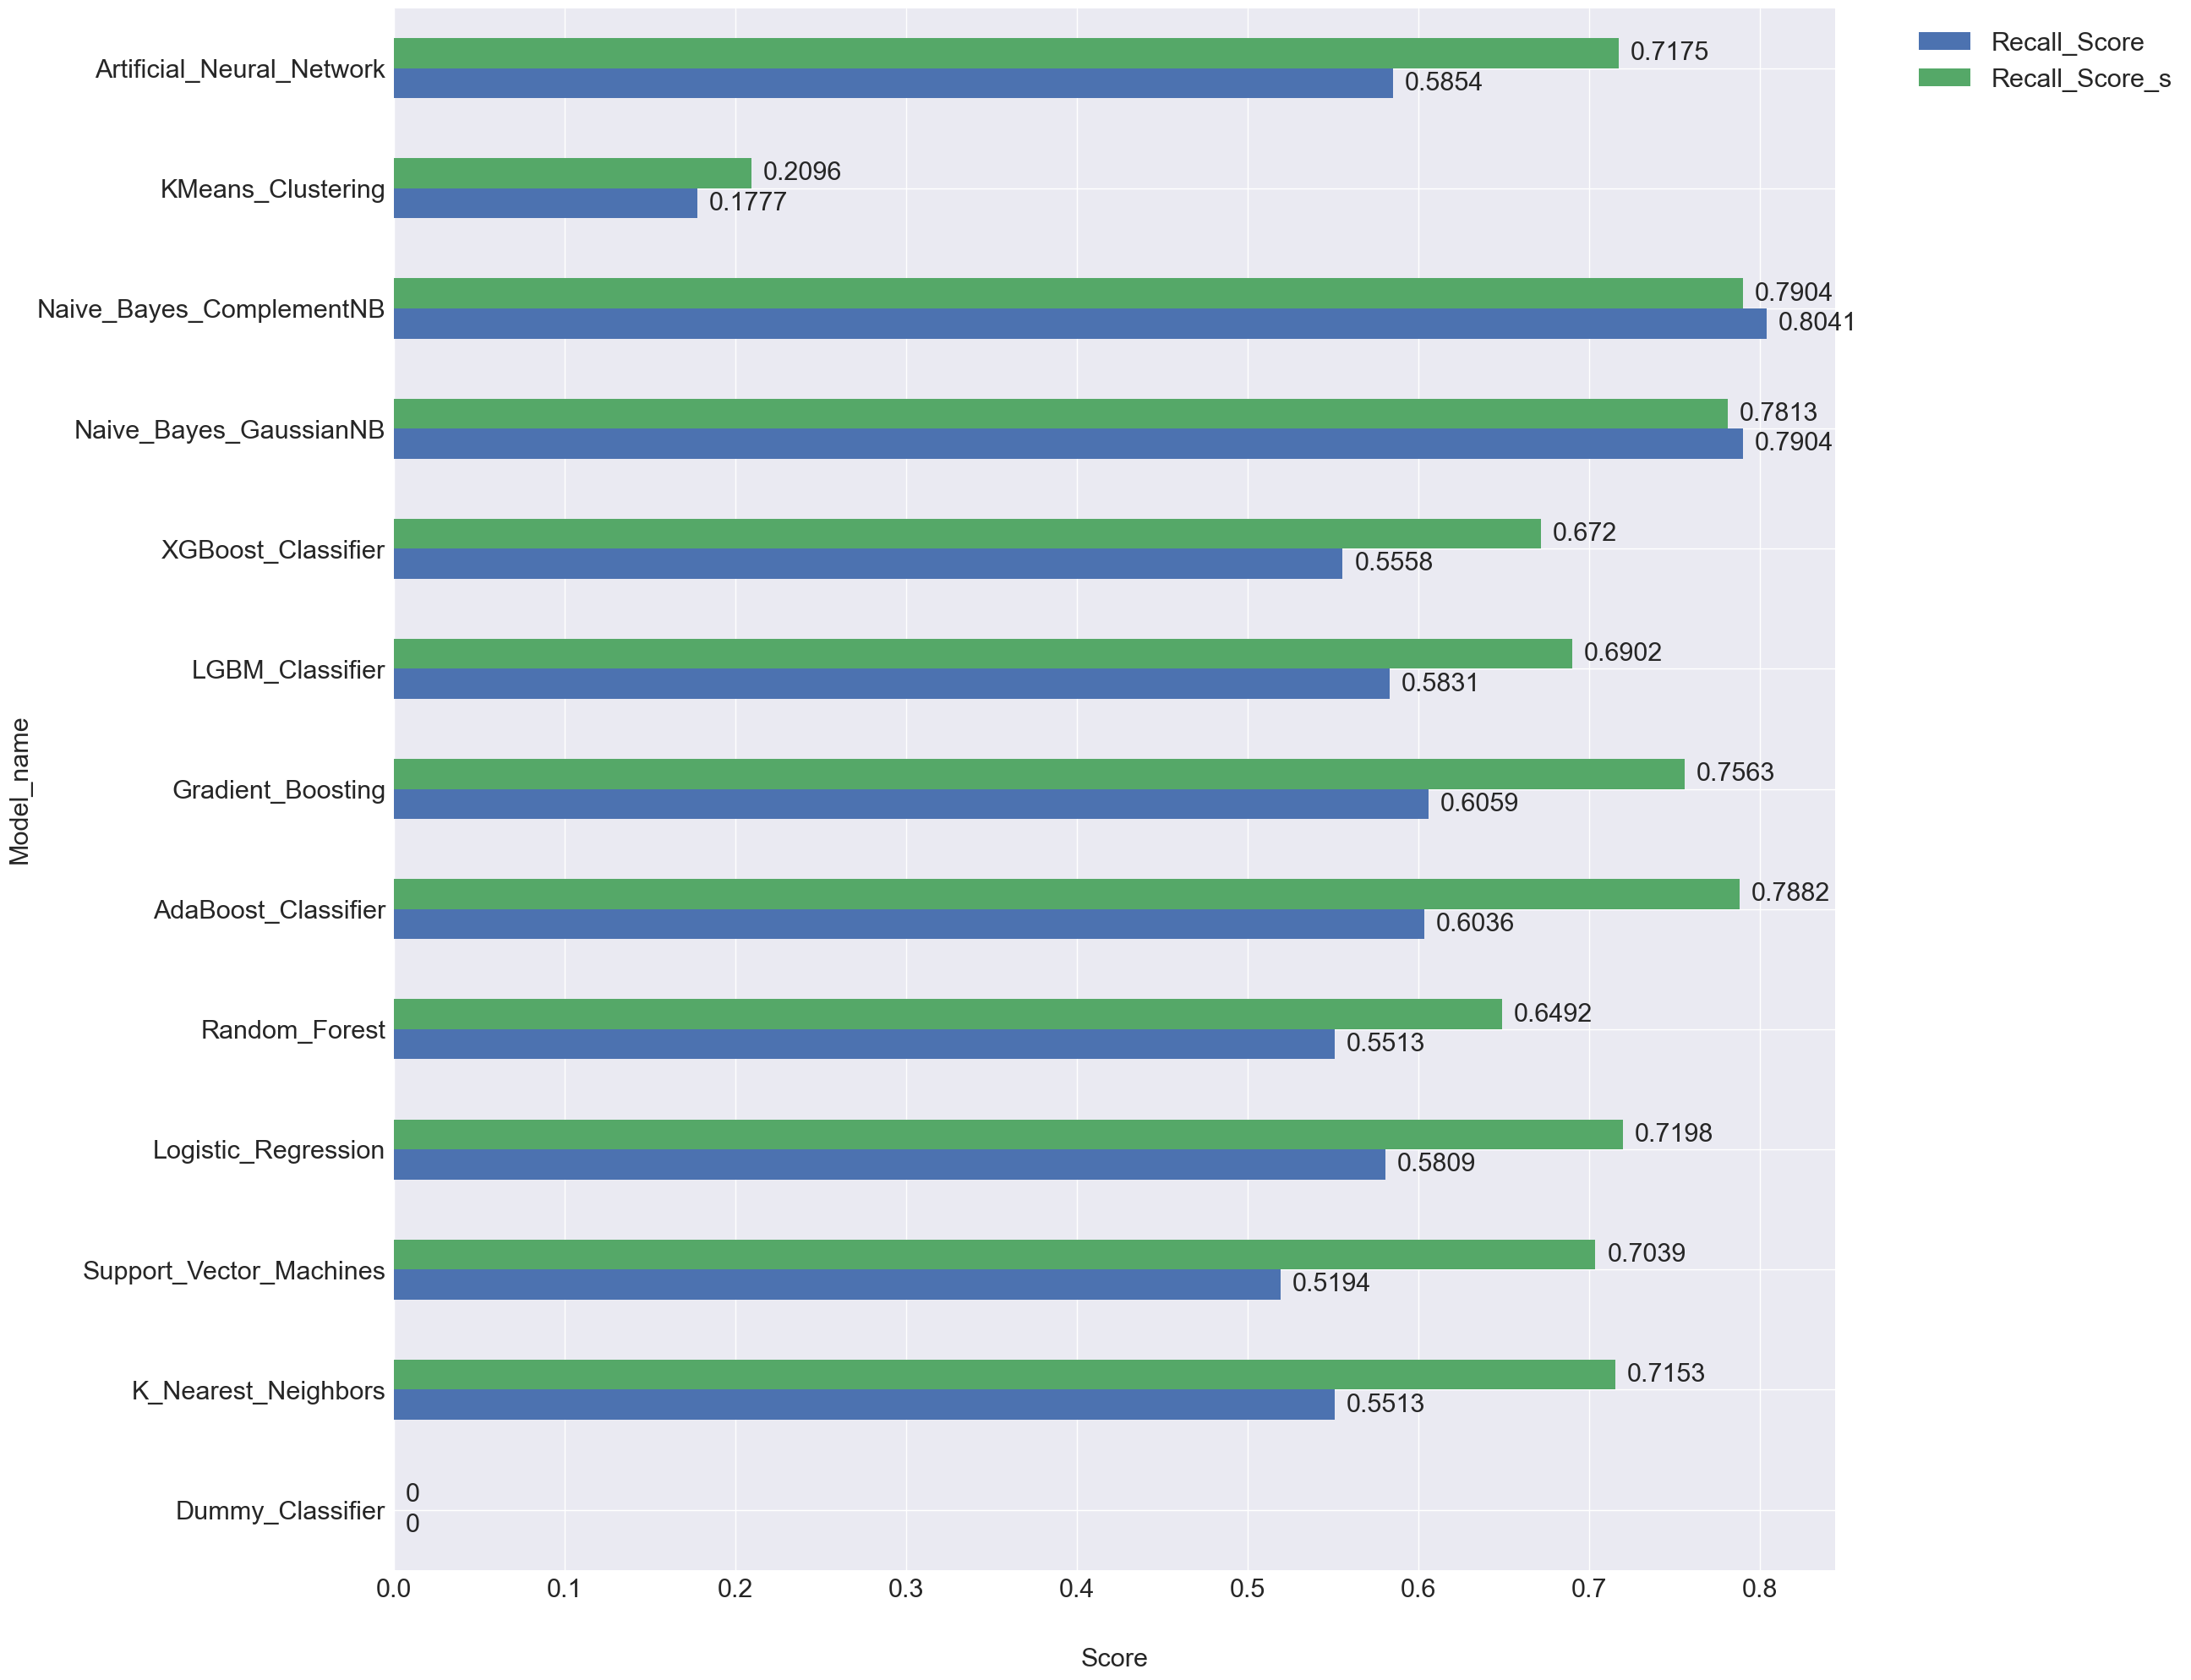

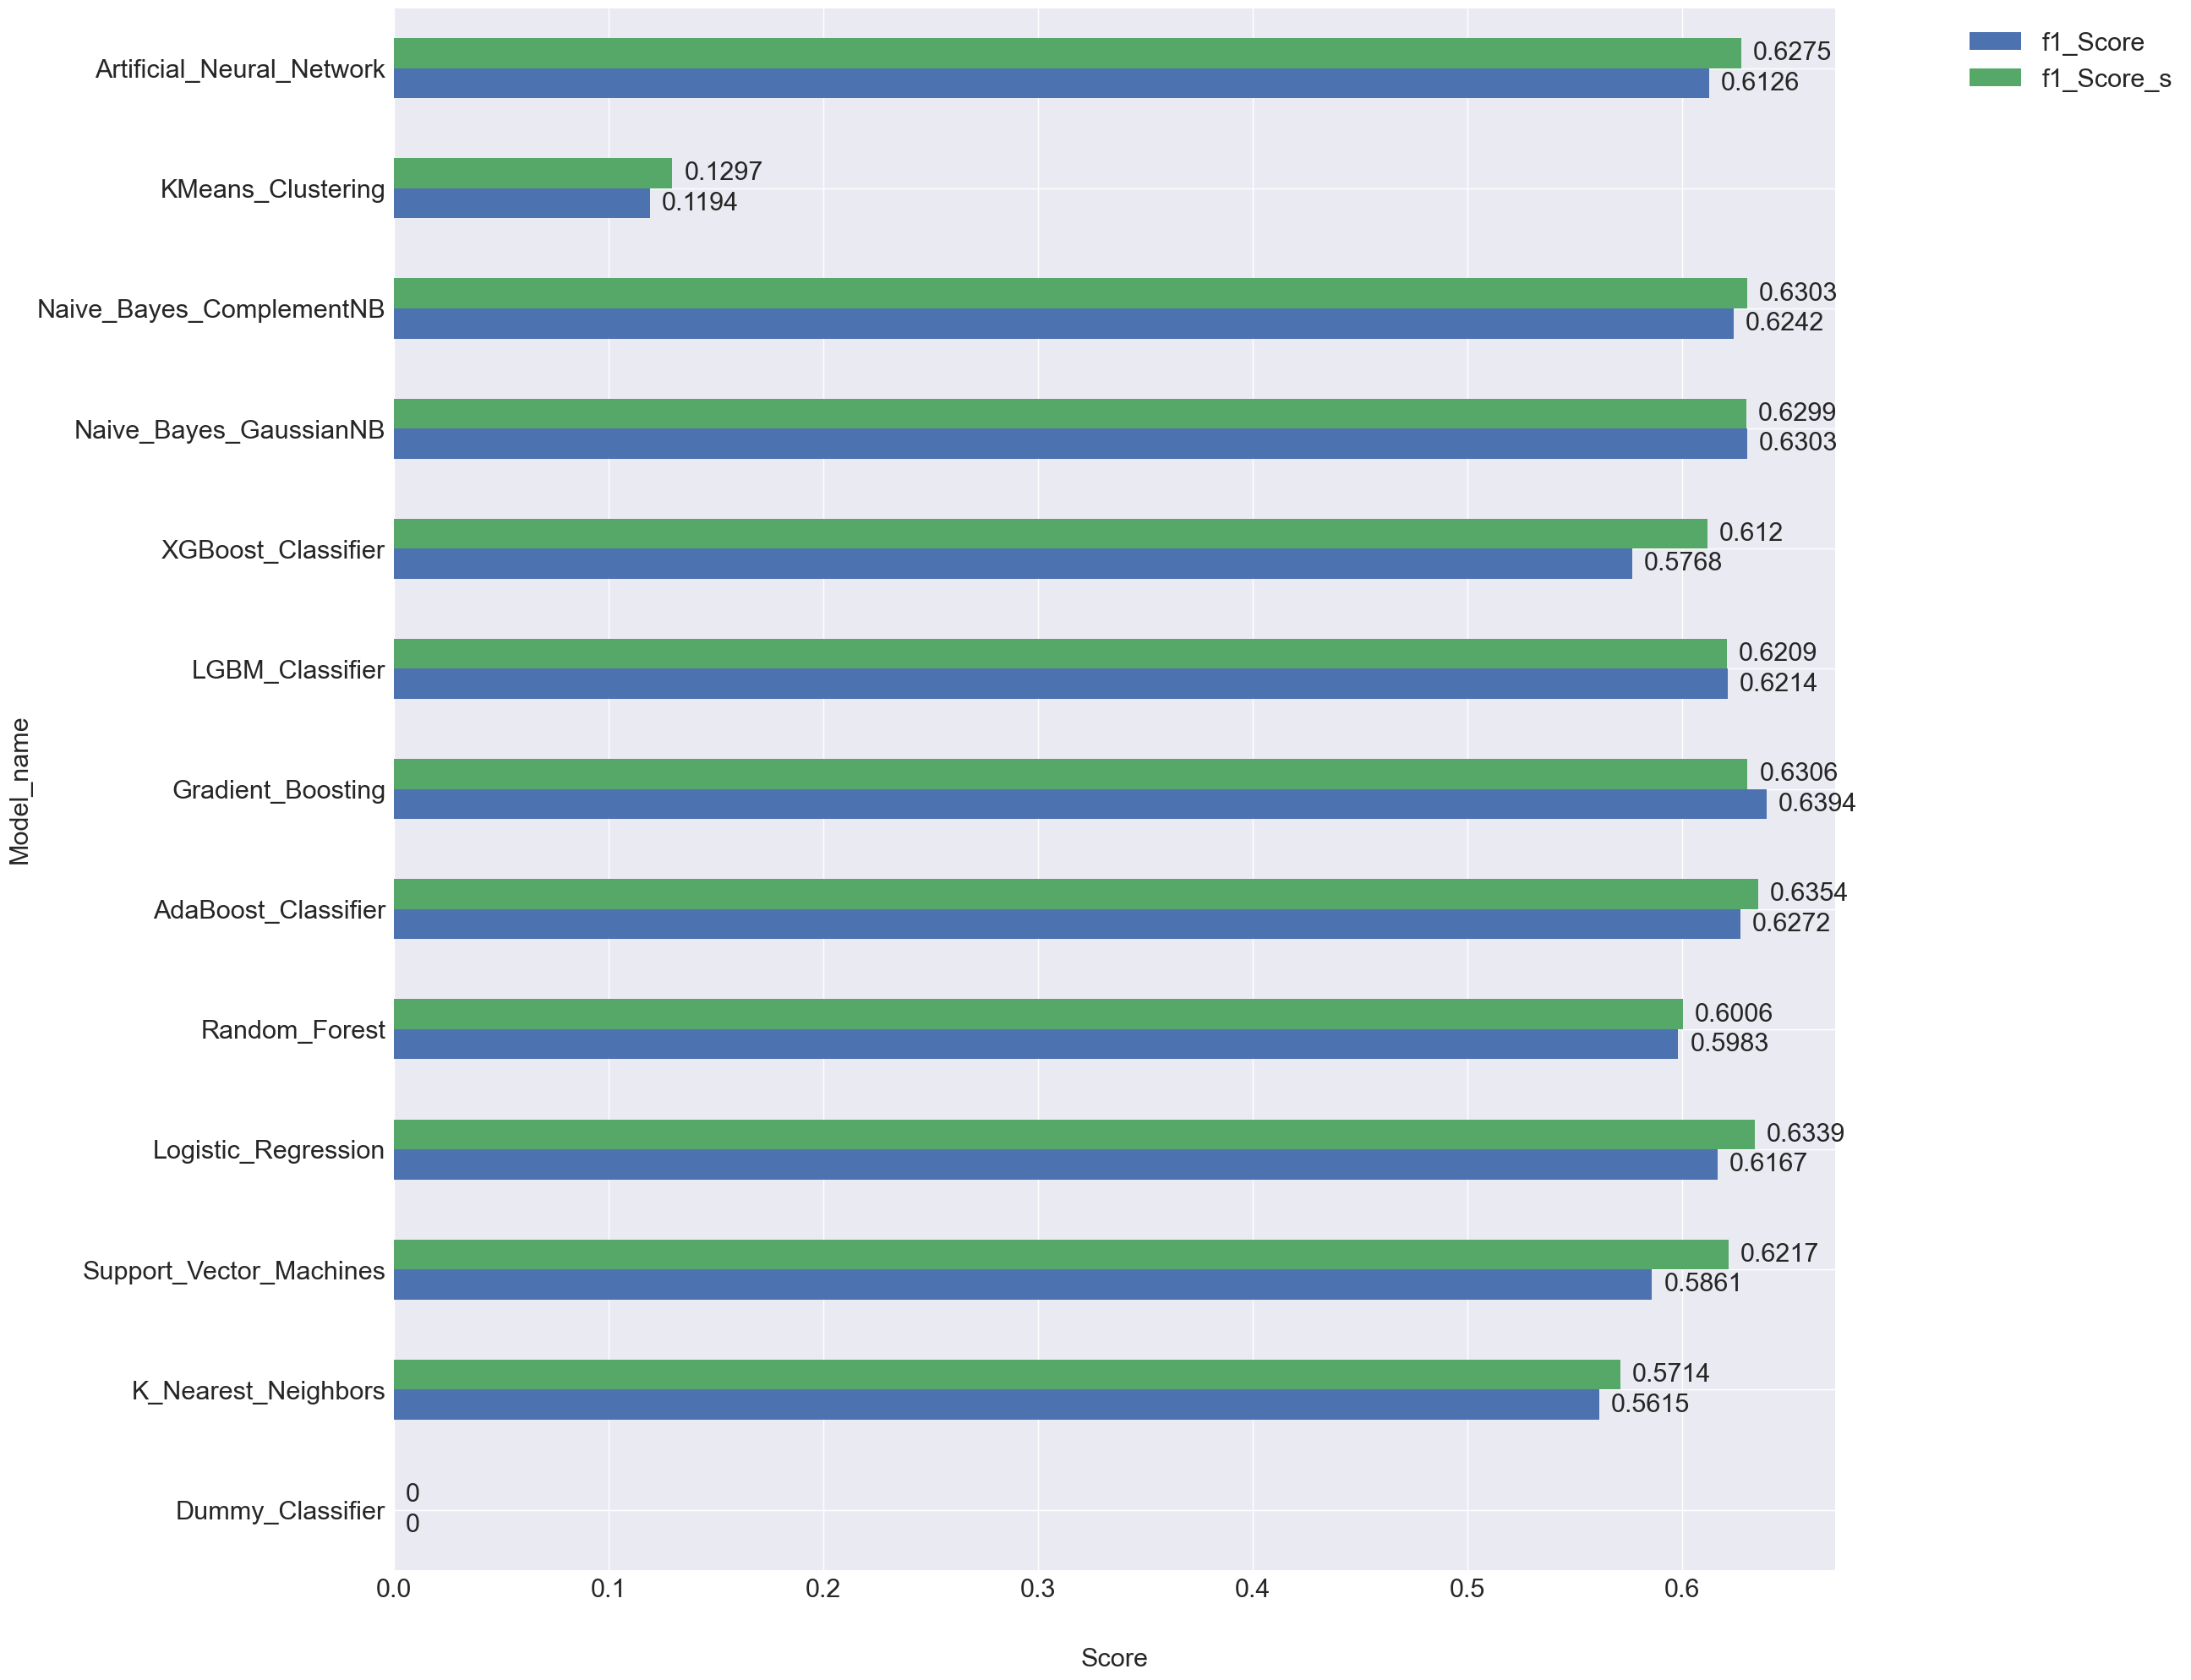

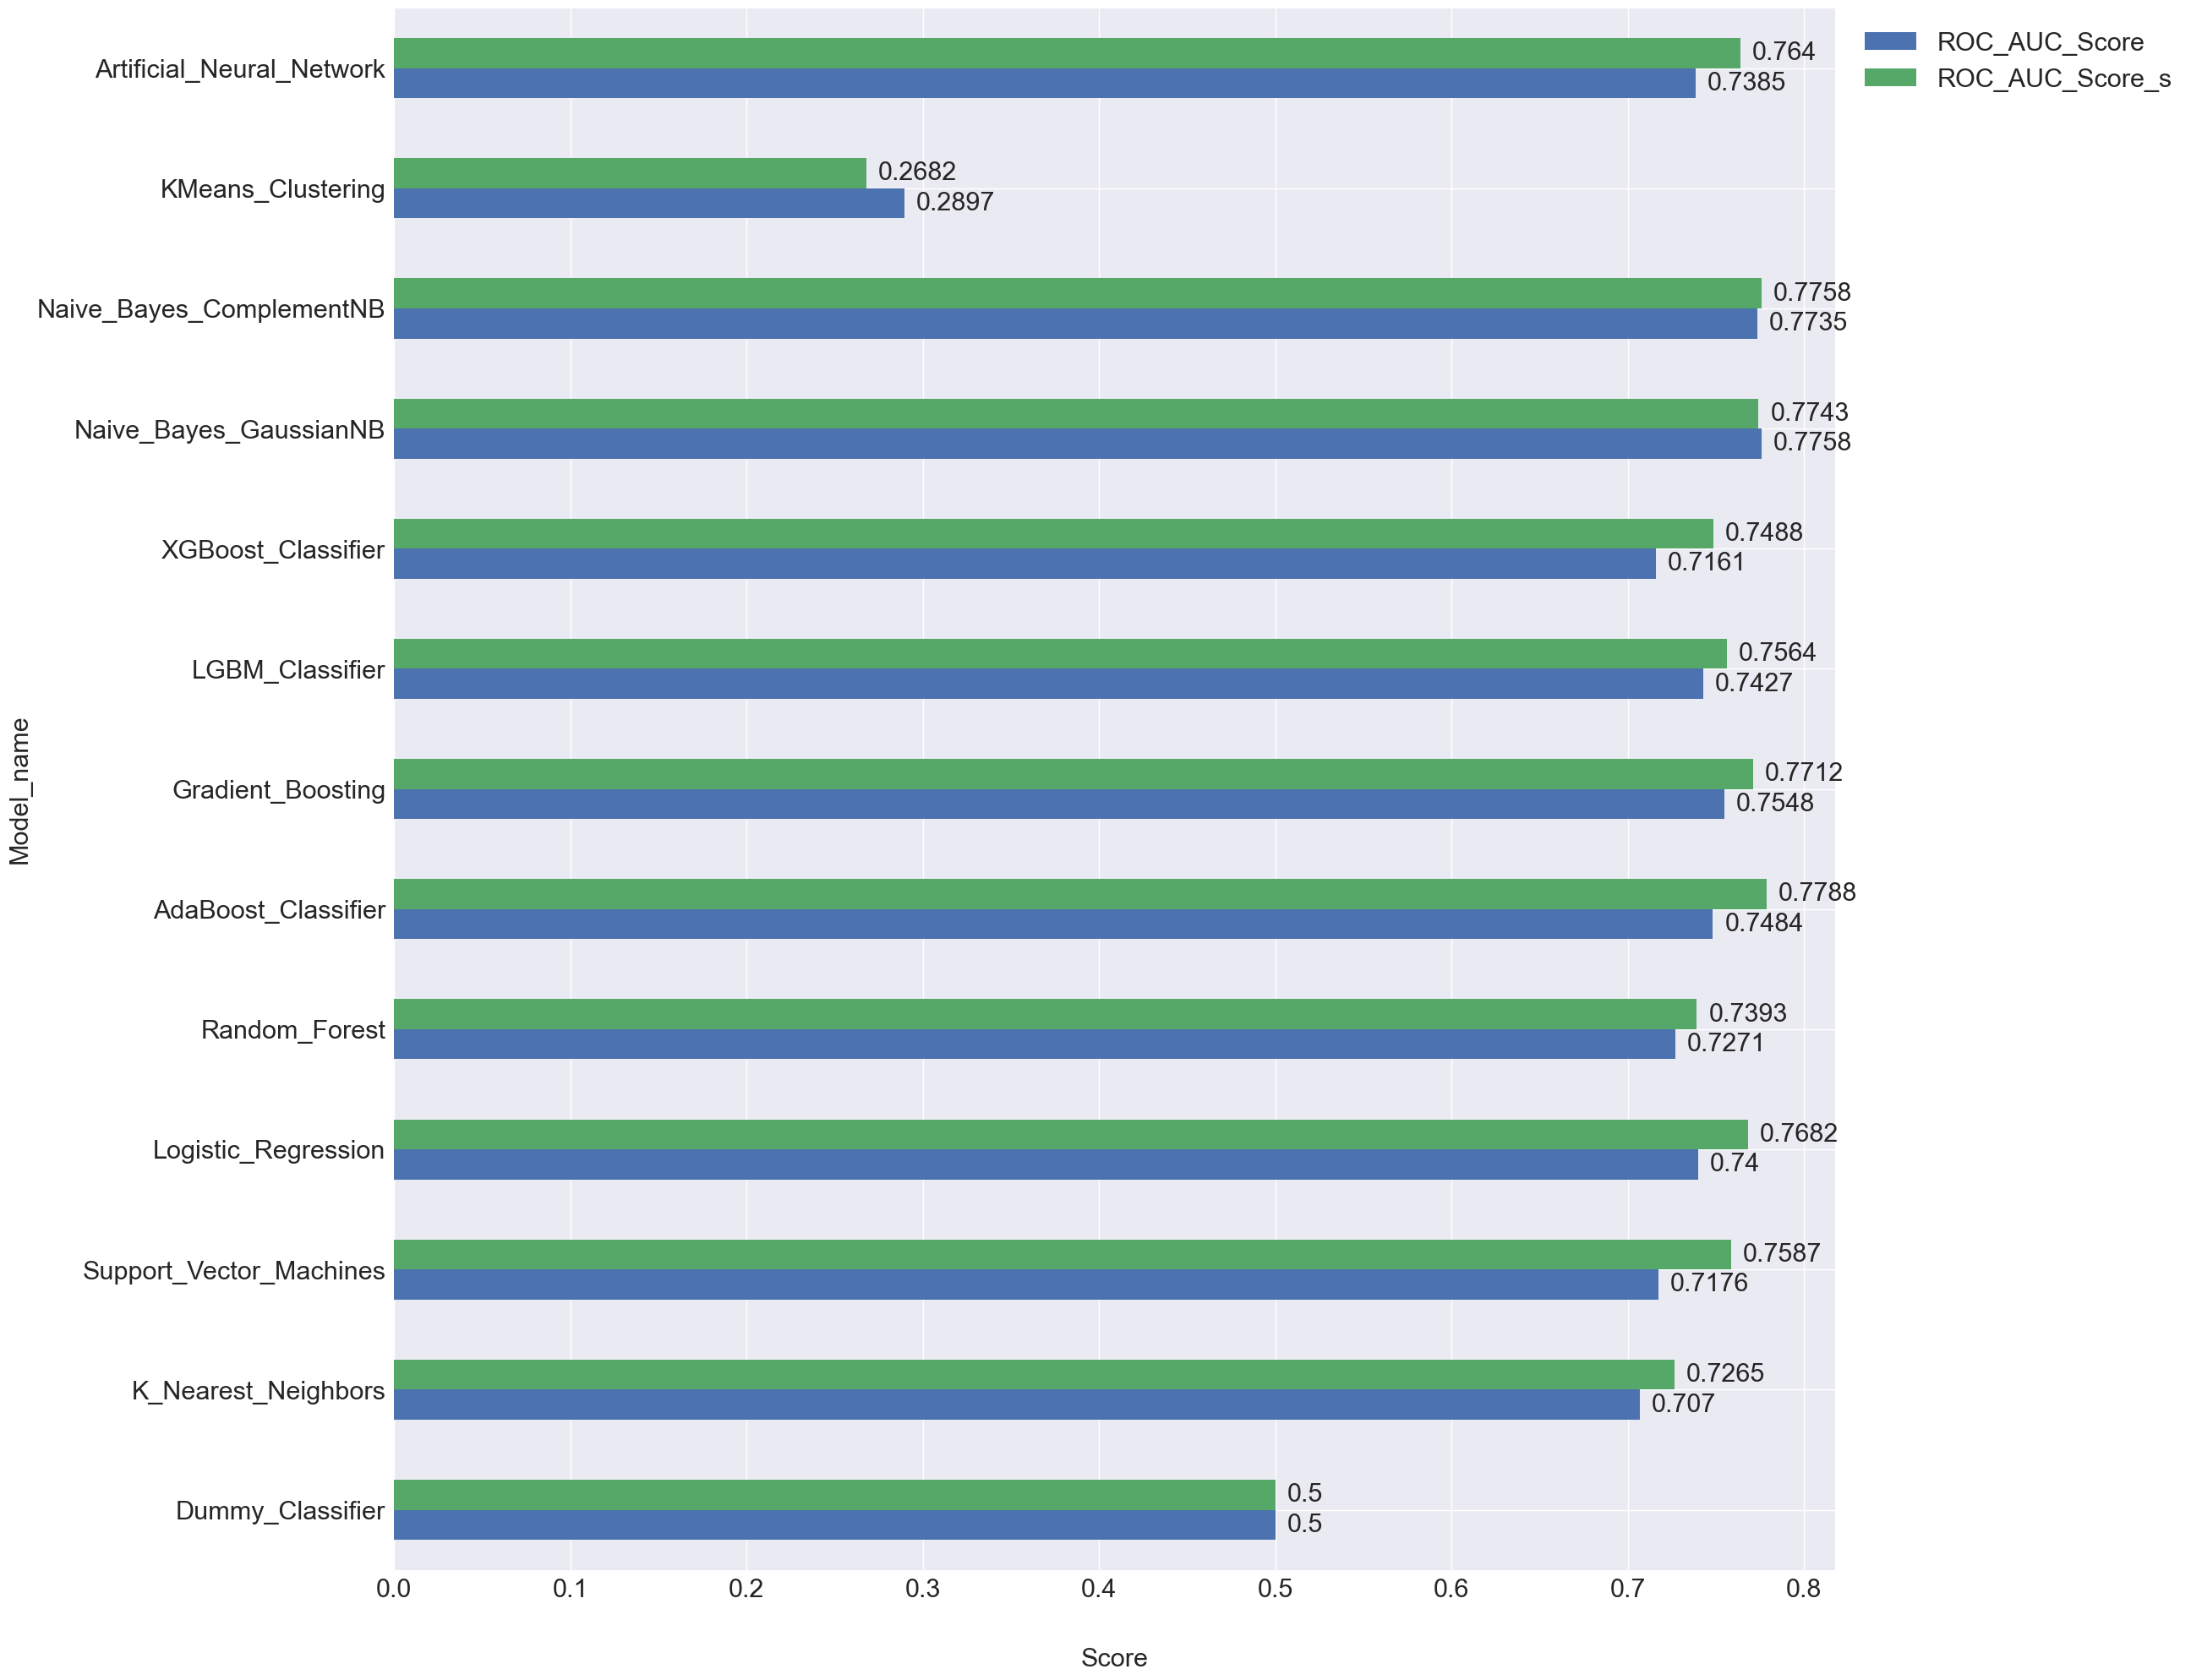

In [144]:
def score_compare(y):
    ax = results_total.plot(x = 'Model_name', y = y, 
                            kind = 'barh', figsize=(22,24), fontsize = 22)
    ax.legend(bbox_to_anchor=(1.25, 1.0), fontsize = 22)
    for container in ax.containers:
        ax.bar_label(container, padding = 10, size = 22)
    ax.yaxis.label.set_fontsize(22)
    plt.xlabel('Score', fontsize = 22)
    ax.xaxis.set_label_coords(0.5, -.05)
score_compare(['Accuracy', 'Accuracy_s'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_all_accuracy', bbox_inches='tight')
score_compare(['Precision_Score', 'Precision_Score_s'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_all_Precision', bbox_inches='tight')
score_compare(['Recall_Score', 'Recall_Score_s'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_all_Recall', bbox_inches='tight')
score_compare(['f1_Score', 'f1_Score_s'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_all_f1', bbox_inches='tight')
score_compare(['ROC_AUC_Score', 'ROC_AUC_Score_s'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_all_roc_auc', bbox_inches='tight')

### Note: In terms of Model accuracy, after smote, it seems worse. But ROC_AUC and Recall score improves.

#### Check model if we use class_weight

In [145]:
def create_models_cw(seed=2023):
    # seed is to fix the random state
    #build several models
    models = []
    models.append(('Dummy_Classifier',DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('K_Nearest_Neighbors', KNeighborsClassifier()))
    models.append(('Support_Vector_Machines', SVC(random_state=seed, class_weight = 'balanced')))
    models.append(('Logistic_Regression', LogisticRegression(random_state=seed, class_weight = 'balanced')))
    models.append(('Random_Forest', RandomForestClassifier(random_state=seed, class_weight = 'balanced')))
    models.append(('AdaBoost_Classifier', AdaBoostClassifier(random_state=seed)))
    models.append(('Gradient_Boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('LGBM_Classifier', LGBMClassifier(random_state=seed, class_weight = 'balanced')))
    models.append(('XGBoost_Classifier', XGBClassifier(random_state=seed)))
    models.append(('Naive_Bayes_GaussianNB', GaussianNB()))
    models.append(('Naive_Bayes_ComplementNB', ComplementNB()))
    models.append(('KMeans_Clustering',KMeans(n_clusters=2, random_state=seed)))
    models.append(('Artificial_Neural_Network', Sequential(
                                                           [
                                                            layers.Dense(units=8, input_dim=len(df_FE.columns)-1, activation='relu'),
                                                            layers.Dense(units=8, activation='relu'),
                                                            layers.Dense(units=1, activation='sigmoid')
                                                           ])))
    
    return models

In [146]:
models = create_models_cw()
results_accuracy_c = []
results_precision_c = []
results_recall_c = []
results_f1_c = []
results_roc_auc_c = []
names = []

for name, model in models:
    # fit the model with the training data
    if name == 'Artificial_Neural_Network':
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0)
        # make predictions with the testing data
        predictions = np.round(model.predict(X_test, verbose=0)).astype(int)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy_c.append(round(accuracy, 4))
        results_precision_c.append(round(precision, 4))
        results_recall_c.append(round(recall, 4))
        results_f1_c.append(round(f1, 4))
        results_roc_auc_c.append(round(roc_auc, 4))
        names.append(name)

    elif name == 'KMeans_Clustering':
        model.fit(X_train)
        # make predictions with the testing data
        predictions = model.predict(X_test)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy_c.append(round(accuracy, 4))
        results_precision_c.append(round(precision, 4))
        results_recall_c.append(round(recall, 4))
        results_f1_c.append(round(f1, 4))
        results_roc_auc_c.append(round(roc_auc, 4))
        names.append(name)
        
    else: 
        model = model.fit(X_train, y_train)
        # make predictions with the testing data
        predictions = model.predict(X_test)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy_c.append(round(accuracy, 4))
        results_precision_c.append(round(precision, 4))
        results_recall_c.append(round(recall, 4))
        results_f1_c.append(round(f1, 4))
        results_roc_auc_c.append(round(roc_auc, 4))
        names.append(name)
        
# build results dataframe
results_c = pd.DataFrame({'Model_name': names, 'Accuracy_c': results_accuracy_c, 'Precision_Score_c': results_precision_c,
                        'Recall_Score_c': results_recall_c, 'f1_Score_c': results_f1_c, 'ROC_AUC_Score_c': results_roc_auc_c})
# show results
display(results_c)

Model_name  Accuracy_c  Precision_Score_c  Recall_Score_c  \
0            Dummy_Classifier      0.7503             0.0000          0.0000   
1         K_Nearest_Neighbors      0.7850             0.5721          0.5513   
2     Support_Vector_Machines      0.7668             0.5208          0.8269   
3         Logistic_Regression      0.7645             0.5183          0.8064   
4               Random_Forest      0.8203             0.6742          0.5421   
5         AdaBoost_Classifier      0.8208             0.6527          0.6036   
6           Gradient_Boosting      0.8294             0.6768          0.6059   
7             LGBM_Classifier      0.7912             0.5581          0.7882   
8          XGBoost_Classifier      0.7964             0.5995          0.5558   
9      Naive_Bayes_GaussianNB      0.7685             0.5242          0.7904   
10   Naive_Bayes_ComplementNB      0.7582             0.5101          0.8041   
11          KMeans_Clustering      0.3458             0.0900          0.1777   
12  Artificial_Neural_Network      0.8174             0.6392          0.6173   

    f1_Score_c  ROC_AUC_Score_c  
0       0.0000           0.5000  
1       0.5615           0.7070  
2       0.6391           0.7868  
3       0.6310           0.7785  
4       0.6010           0.7275  
5       0.6272           0.7484  
6       0.6394           0.7548  
7       0.6534           0.7902  
8       0.5768           0.7161  
9       0.6303           0.7758  
10      0.6242           0.7735  
11      0.1194           0.2897  
12      0.6280           0.7507

In [147]:
results_o_c = pd.merge(results, results_c, how = 'inner')
display(results_o_c)

Model_name  Accuracy  Precision_Score  Recall_Score  \
0            Dummy_Classifier    0.7503           0.0000        0.0000   
1         K_Nearest_Neighbors    0.7850           0.5721        0.5513   
2     Support_Vector_Machines    0.8168           0.6726        0.5194   
3         Logistic_Regression    0.8197           0.6572        0.5809   
4               Random_Forest    0.8151           0.6541        0.5513   
5         AdaBoost_Classifier    0.8208           0.6527        0.6036   
6           Gradient_Boosting    0.8294           0.6768        0.6059   
7             LGBM_Classifier    0.8225           0.6649        0.5831   
8          XGBoost_Classifier    0.7964           0.5995        0.5558   
9      Naive_Bayes_GaussianNB    0.7685           0.5242        0.7904   
10   Naive_Bayes_ComplementNB    0.7582           0.5101        0.8041   
11          KMeans_Clustering    0.3458           0.0900        0.1777   
12  Artificial_Neural_Network    0.8151           0.6425        0.5854   

    f1_Score  ROC_AUC_Score  Accuracy_c  Precision_Score_c  Recall_Score_c  \
0     0.0000         0.5000      0.7503             0.0000          0.0000   
1     0.5615         0.7070      0.7850             0.5721          0.5513   
2     0.5861         0.7176      0.7668             0.5208          0.8269   
3     0.6167         0.7400      0.7645             0.5183          0.8064   
4     0.5983         0.7271      0.8203             0.6742          0.5421   
5     0.6272         0.7484      0.8208             0.6527          0.6036   
6     0.6394         0.7548      0.8294             0.6768          0.6059   
7     0.6214         0.7427      0.7912             0.5581          0.7882   
8     0.5768         0.7161      0.7964             0.5995          0.5558   
9     0.6303         0.7758      0.7685             0.5242          0.7904   
10    0.6242         0.7735      0.7582             0.5101          0.8041   
11    0.1194         0.2897      0.3458             0.0900          0.1777   
12    0.6126         0.7385      0.8174             0.6392          0.6173   

    f1_Score_c  ROC_AUC_Score_c  
0       0.0000           0.5000  
1       0.5615           0.7070  
2       0.6391           0.7868  
3       0.6310           0.7785  
4       0.6010           0.7275  
5       0.6272           0.7484  
6       0.6394           0.7548  
7       0.6534           0.7902  
8       0.5768           0.7161  
9       0.6303           0.7758  
10      0.6242           0.7735  
11      0.1194           0.2897  
12      0.6280           0.7507

In [148]:
results_final = pd.merge(results_total, results_c, how = 'inner')

In [149]:
display(results_final)

Model_name  Accuracy  Precision_Score  Recall_Score  \
0            Dummy_Classifier    0.7503           0.0000        0.0000   
1         K_Nearest_Neighbors    0.7850           0.5721        0.5513   
2     Support_Vector_Machines    0.8168           0.6726        0.5194   
3         Logistic_Regression    0.8197           0.6572        0.5809   
4               Random_Forest    0.8151           0.6541        0.5513   
5         AdaBoost_Classifier    0.8208           0.6527        0.6036   
6           Gradient_Boosting    0.8294           0.6768        0.6059   
7             LGBM_Classifier    0.8225           0.6649        0.5831   
8          XGBoost_Classifier    0.7964           0.5995        0.5558   
9      Naive_Bayes_GaussianNB    0.7685           0.5242        0.7904   
10   Naive_Bayes_ComplementNB    0.7582           0.5101        0.8041   
11          KMeans_Clustering    0.3458           0.0900        0.1777   
12  Artificial_Neural_Network    0.8151           0.6425        0.5854   

    f1_Score  ROC_AUC_Score  Accuracy_s  Precision_Score_s  Recall_Score_s  \
0     0.0000         0.5000      0.7503             0.0000          0.0000   
1     0.5615         0.7070      0.7321             0.4758          0.7153   
2     0.5861         0.7176      0.7861             0.5568          0.7039   
3     0.6167         0.7400      0.7924             0.5663          0.7198   
4     0.5983         0.7271      0.7844             0.5588          0.6492   
5     0.6272         0.7484      0.7742             0.5323          0.7882   
6     0.6394         0.7548      0.7787             0.5407          0.7563   
7     0.6214         0.7427      0.7895             0.5642          0.6902   
8     0.5768         0.7161      0.7873             0.5619          0.6720   
9     0.6303         0.7758      0.7708             0.5277          0.7813   
10    0.6242         0.7735      0.7685             0.5242          0.7904   
11    0.1194         0.2897      0.2975             0.0939          0.2096   
12    0.6126         0.7385      0.7873             0.5575          0.7175   

    f1_Score_s  ROC_AUC_Score_s  Accuracy_c  Precision_Score_c  \
0       0.0000           0.5000      0.7503             0.0000   
1       0.5714           0.7265      0.7850             0.5721   
2       0.6217           0.7587      0.7668             0.5208   
3       0.6339           0.7682      0.7645             0.5183   
4       0.6006           0.7393      0.8203             0.6742   
5       0.6354           0.7788      0.8208             0.6527   
6       0.6306           0.7712      0.8294             0.6768   
7       0.6209           0.7564      0.7912             0.5581   
8       0.6120           0.7488      0.7964             0.5995   
9       0.6299           0.7743      0.7685             0.5242   
10      0.6303           0.7758      0.7582             0.5101   
11      0.1297           0.2682      0.3458             0.0900   
12      0.6275           0.7640      0.8174             0.6392   

    Recall_Score_c  f1_Score_c  ROC_AUC_Score_c  
0           0.0000      0.0000           0.5000  
1           0.5513      0.5615           0.7070  
2           0.8269      0.6391           0.7868  
3           0.8064      0.6310           0.7785  
4           0.5421      0.6010           0.7275  
5           0.6036      0.6272           0.7484  
6           0.6059      0.6394           0.7548  
7           0.7882      0.6534           0.7902  
8           0.5558      0.5768           0.7161  
9           0.7904      0.6303           0.7758  
10          0.8041      0.6242           0.7735  
11          0.1777      0.1194           0.2897  
12          0.6173      0.6280           0.7507

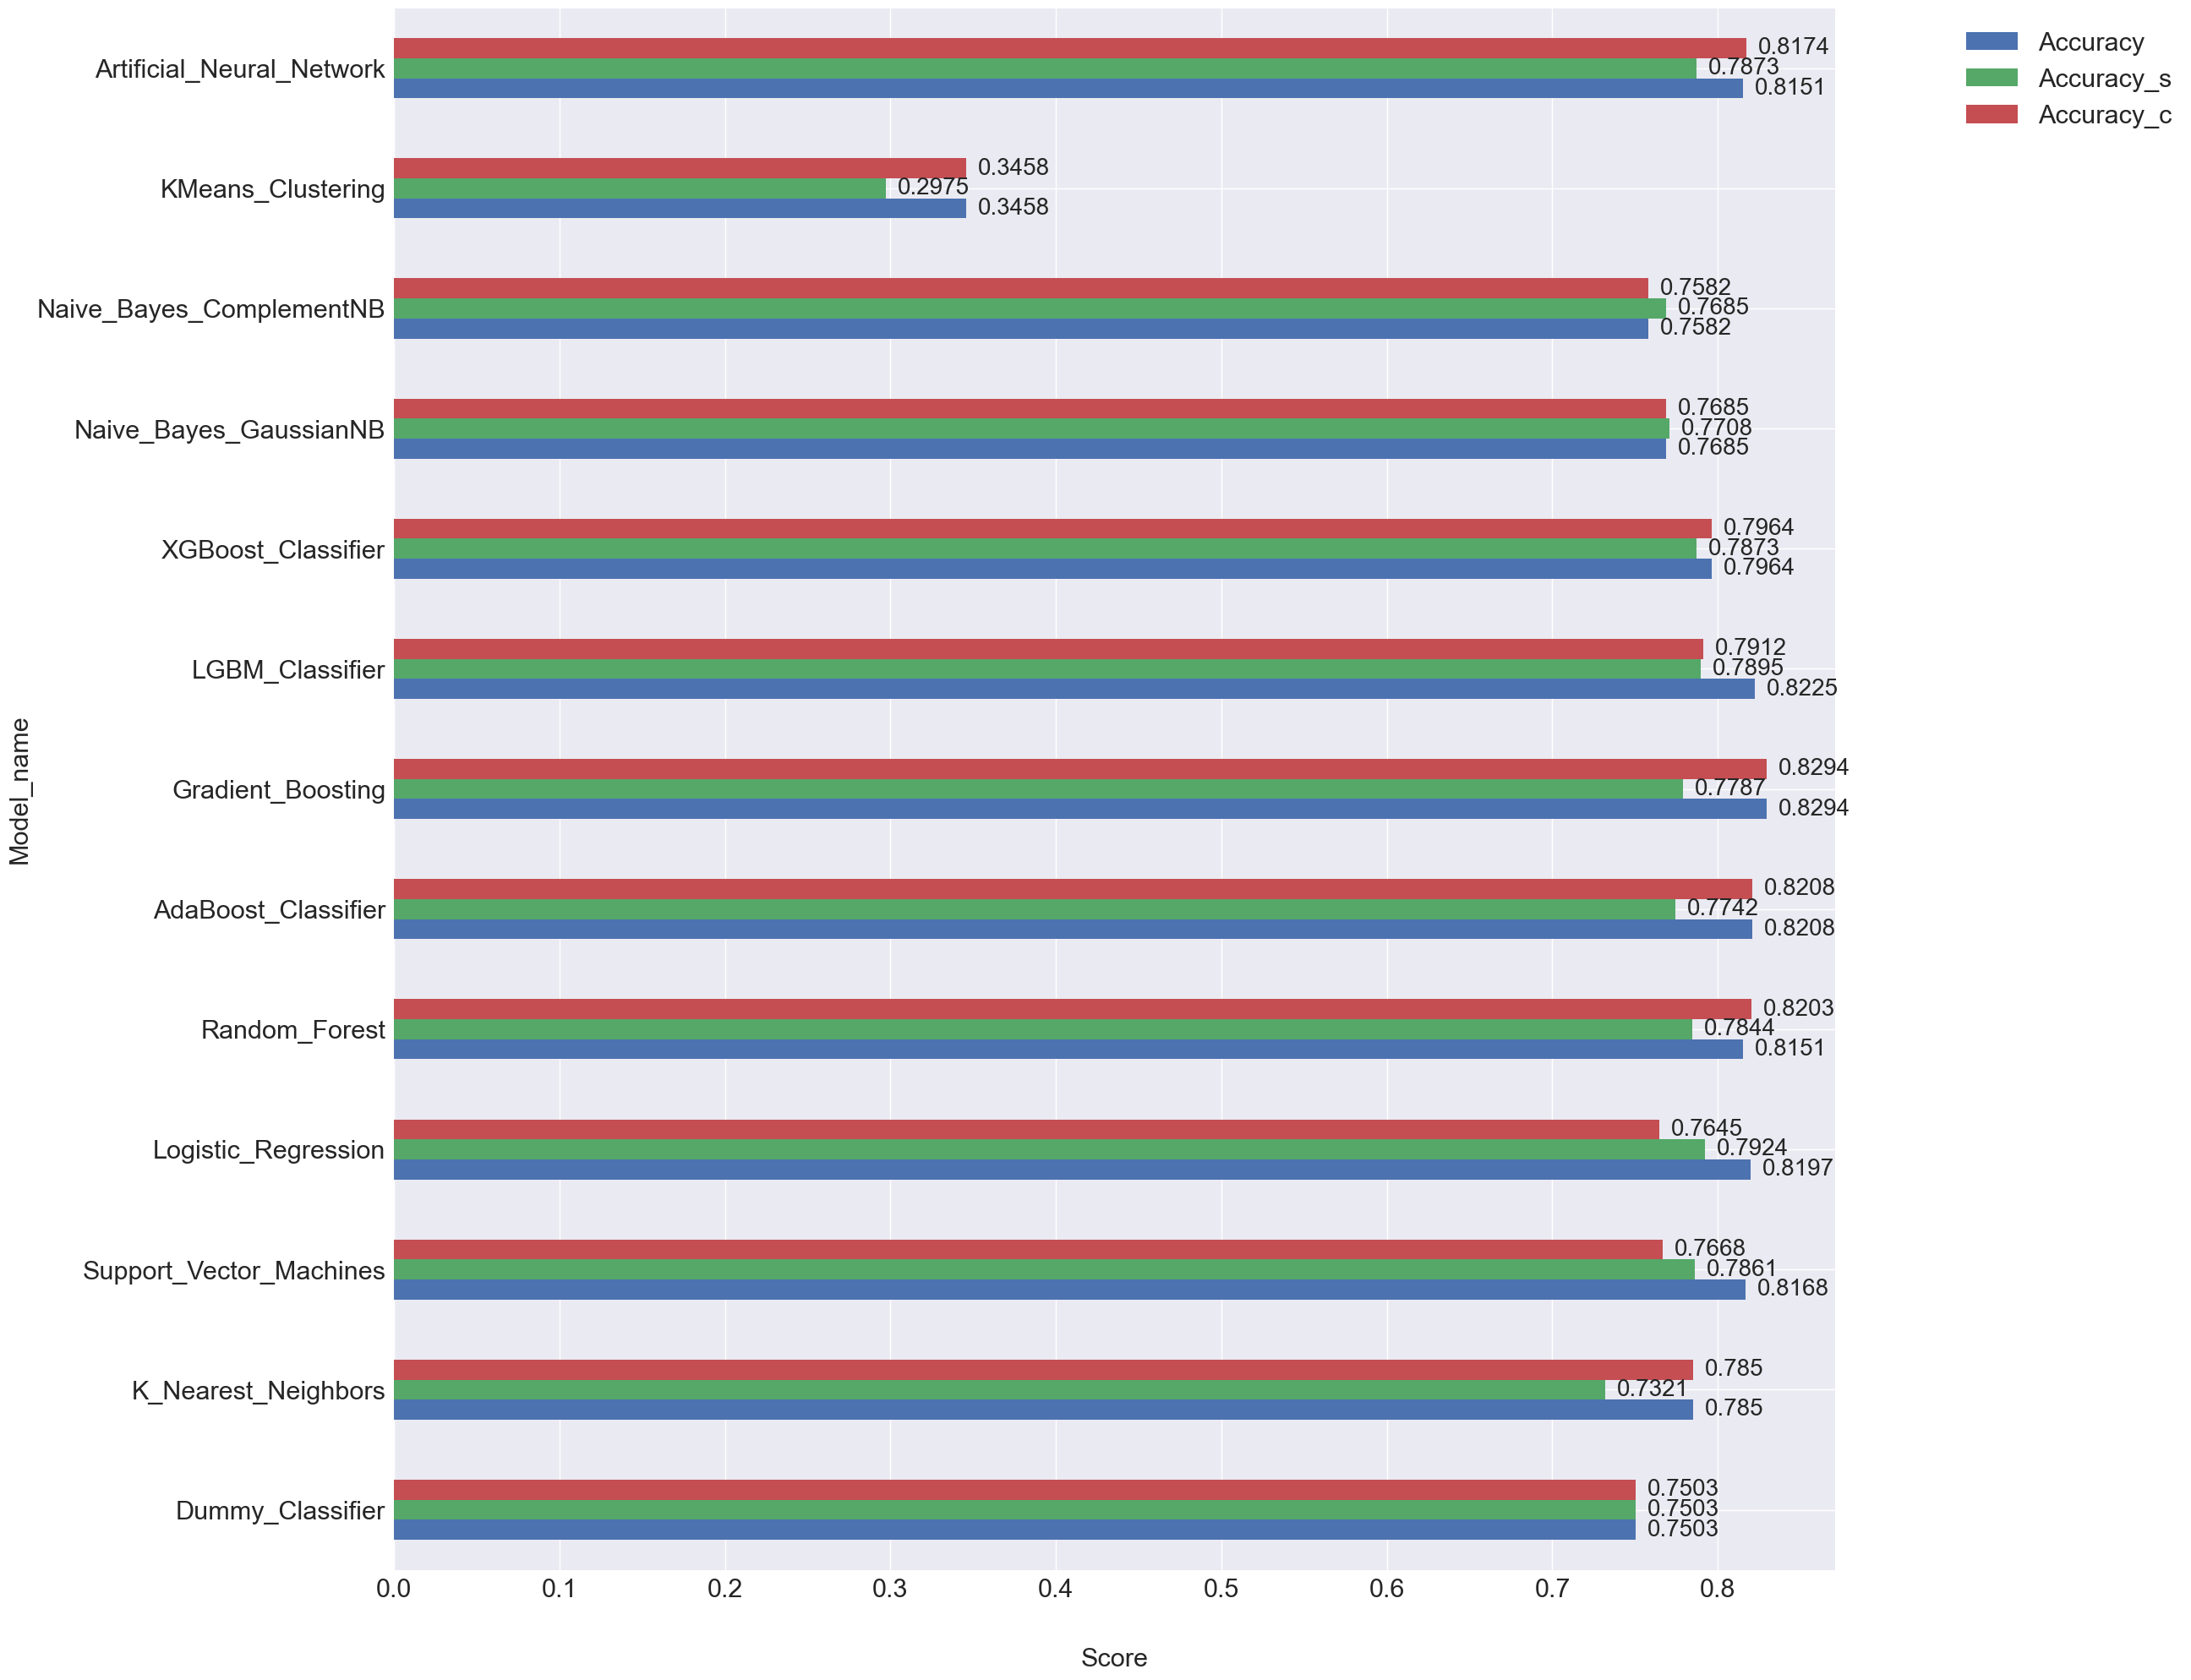

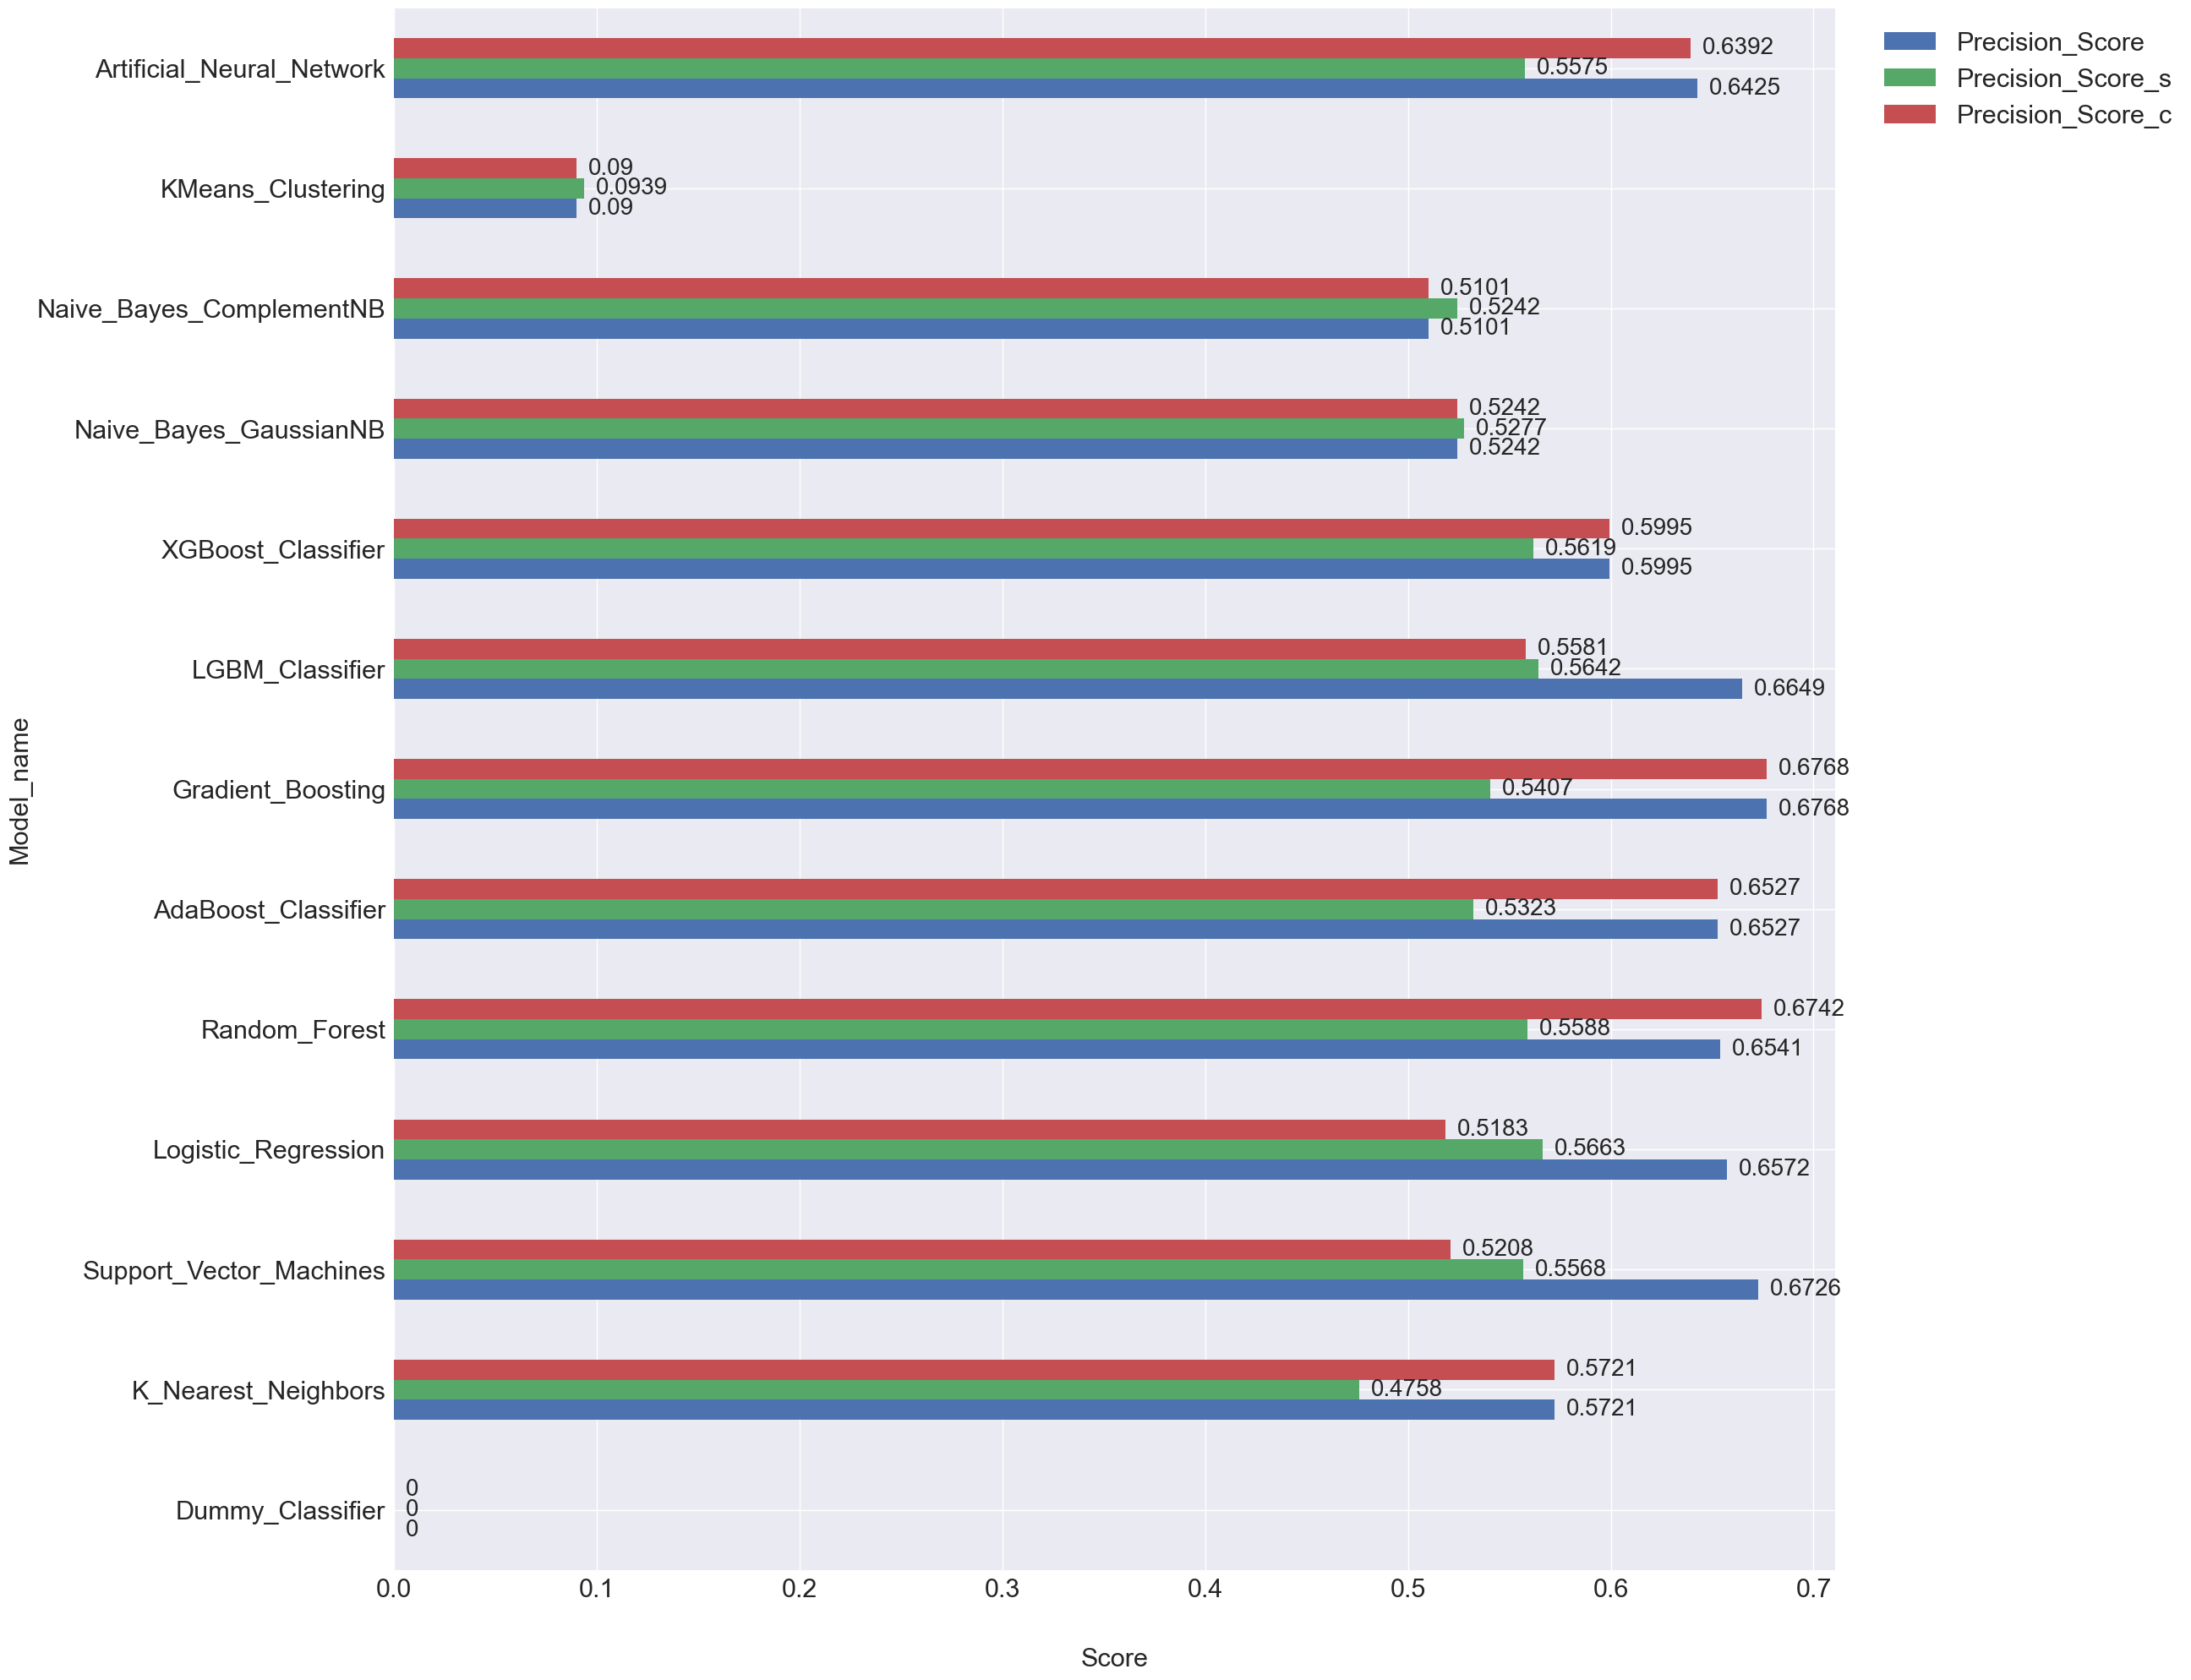

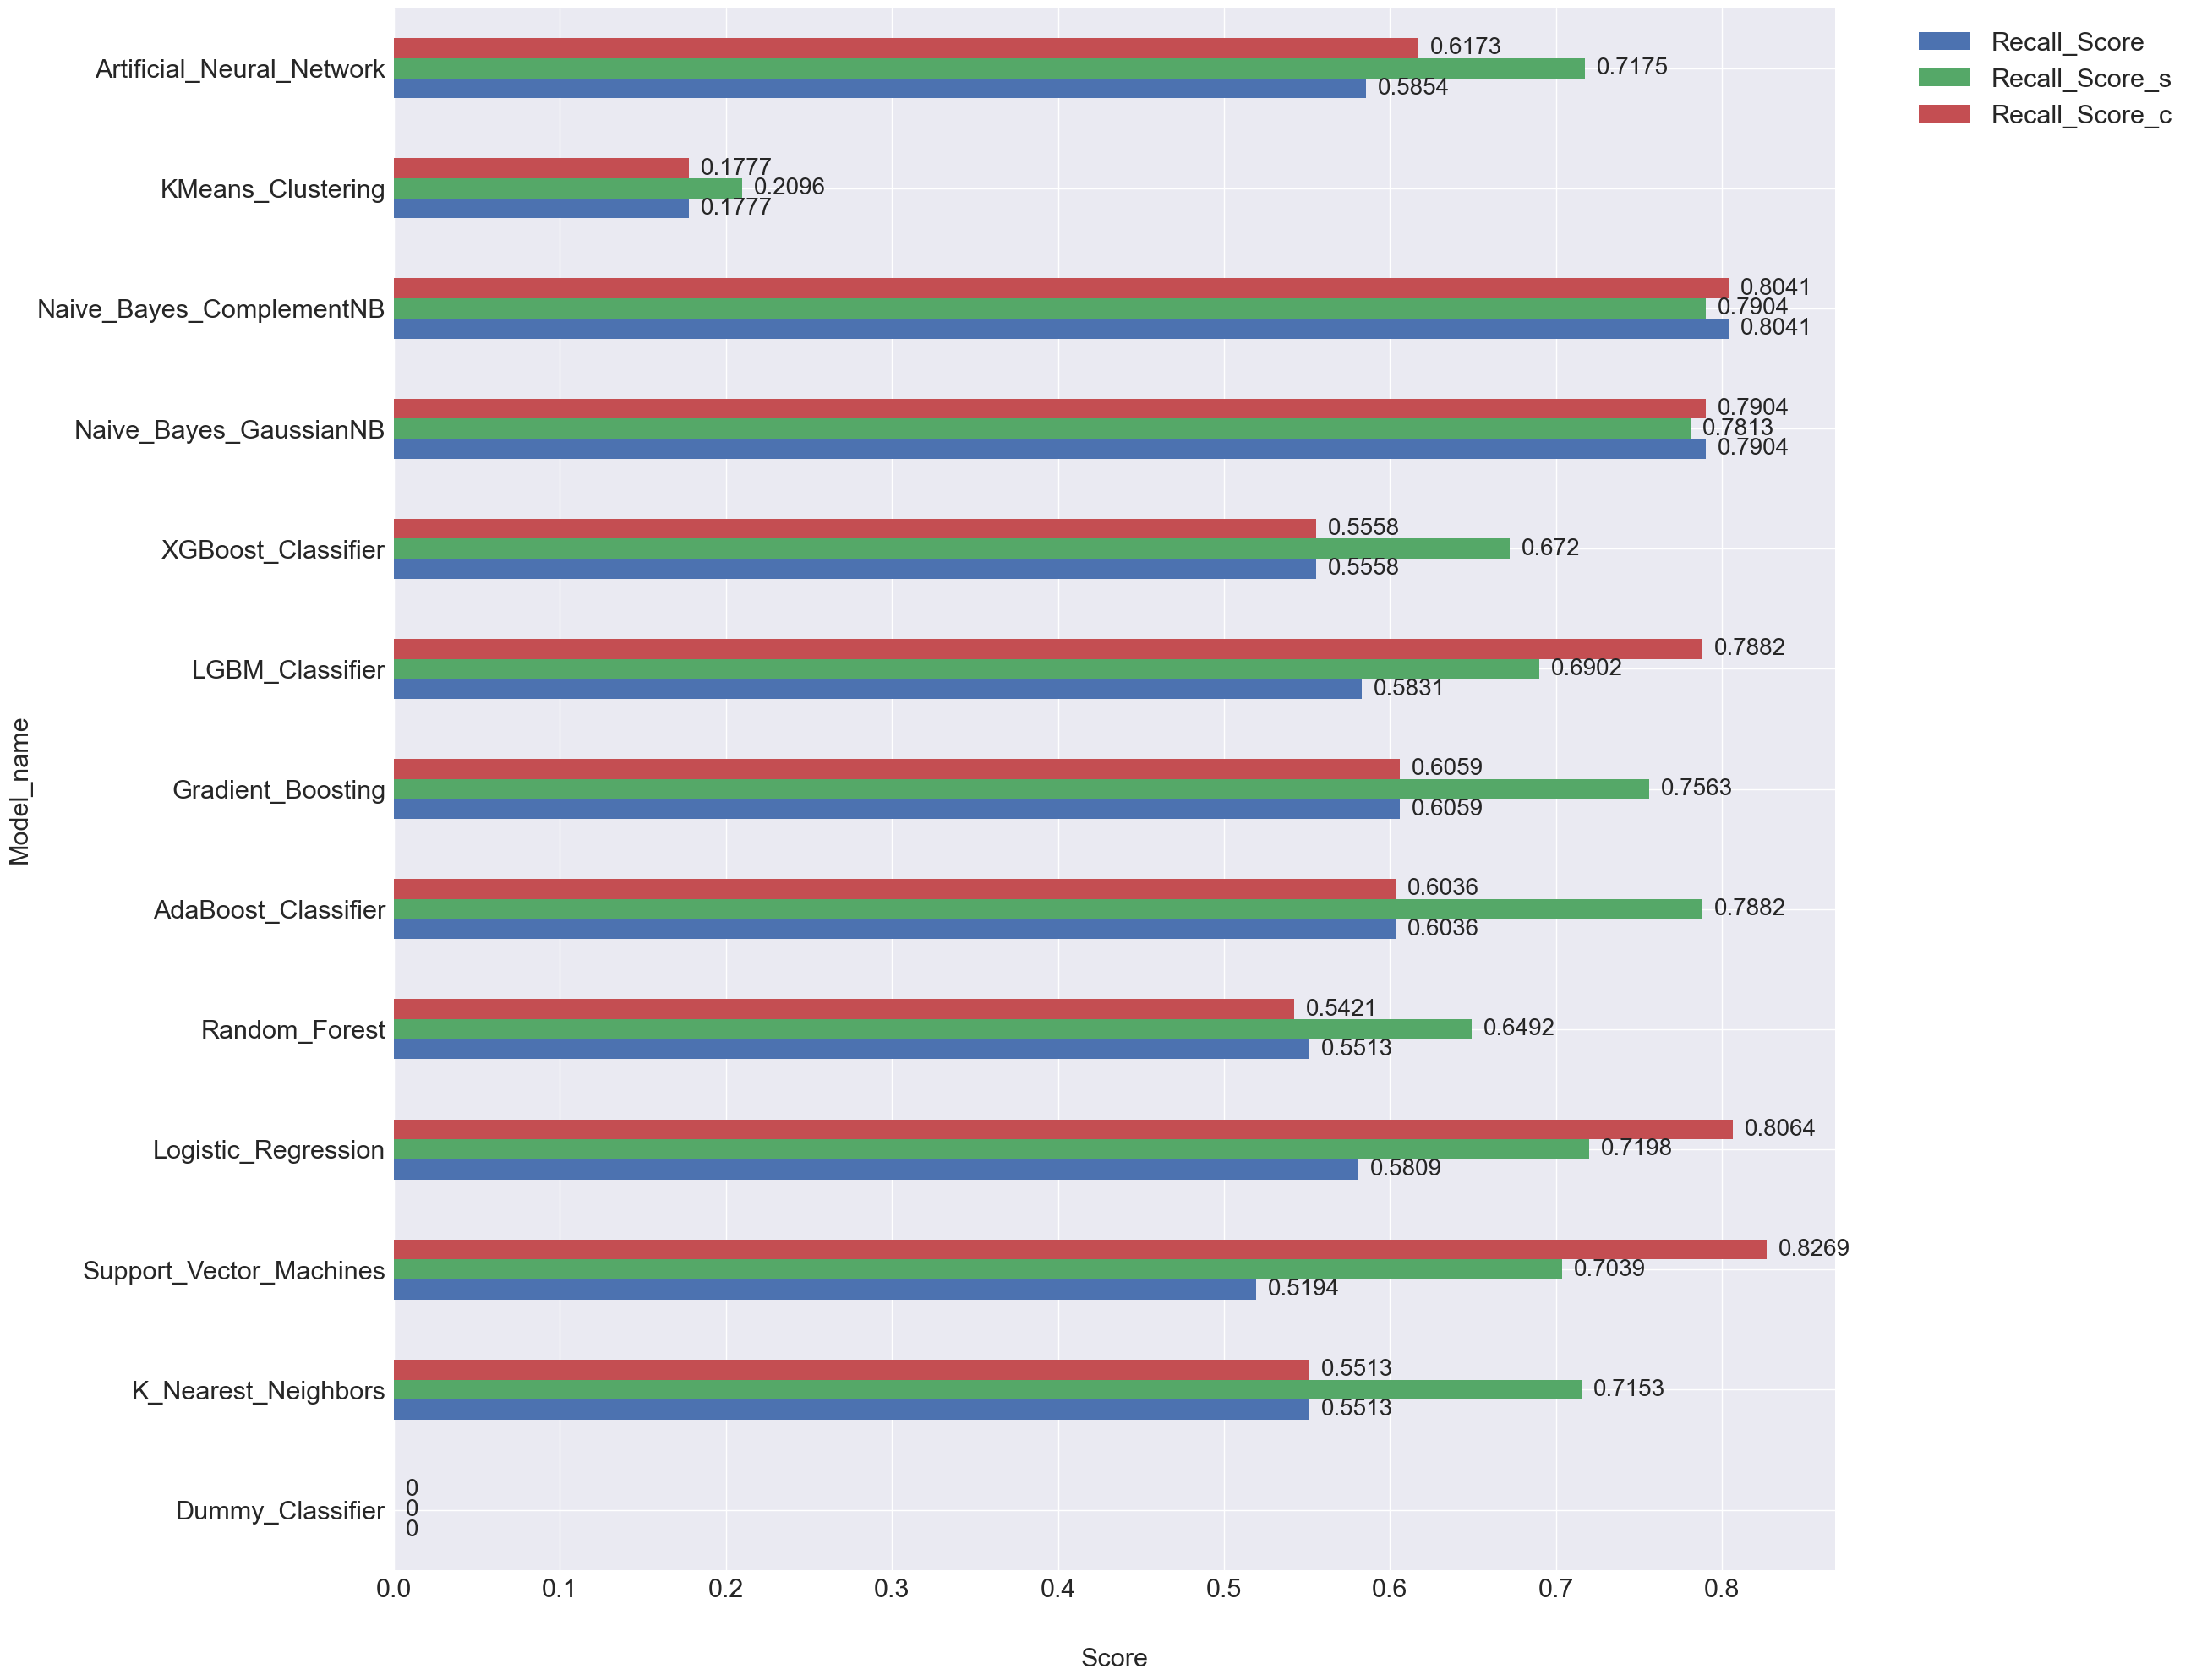

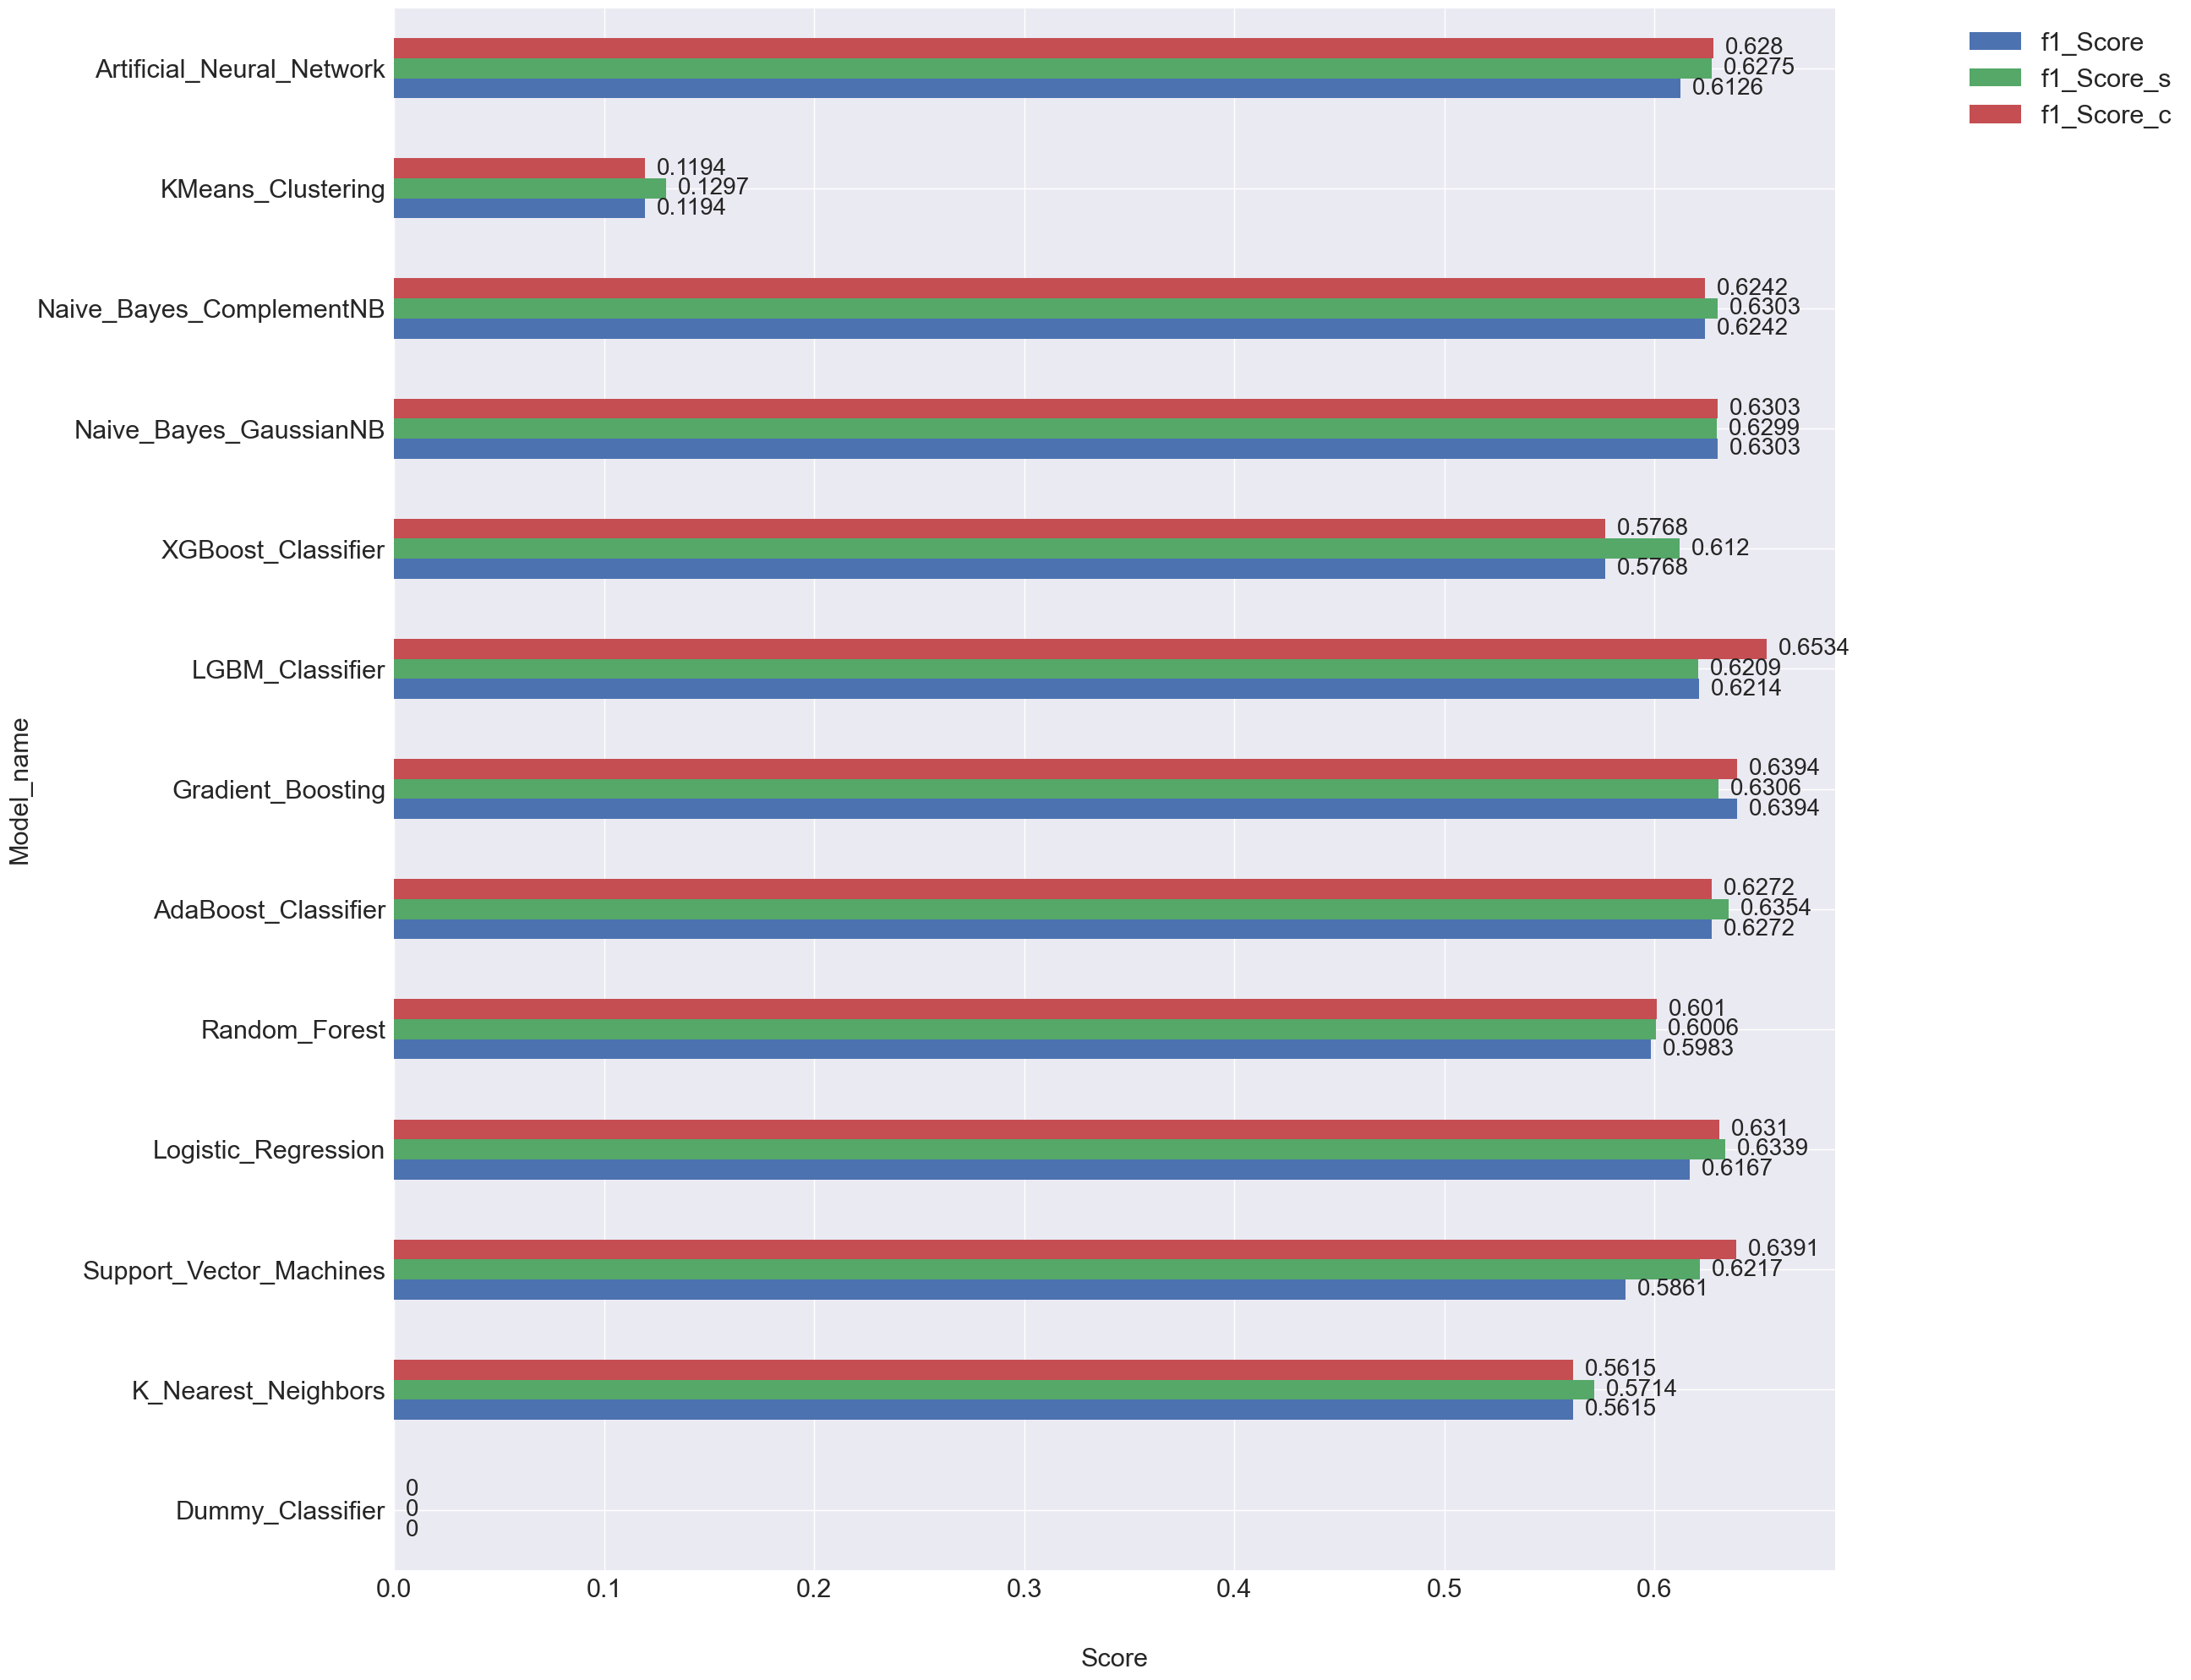

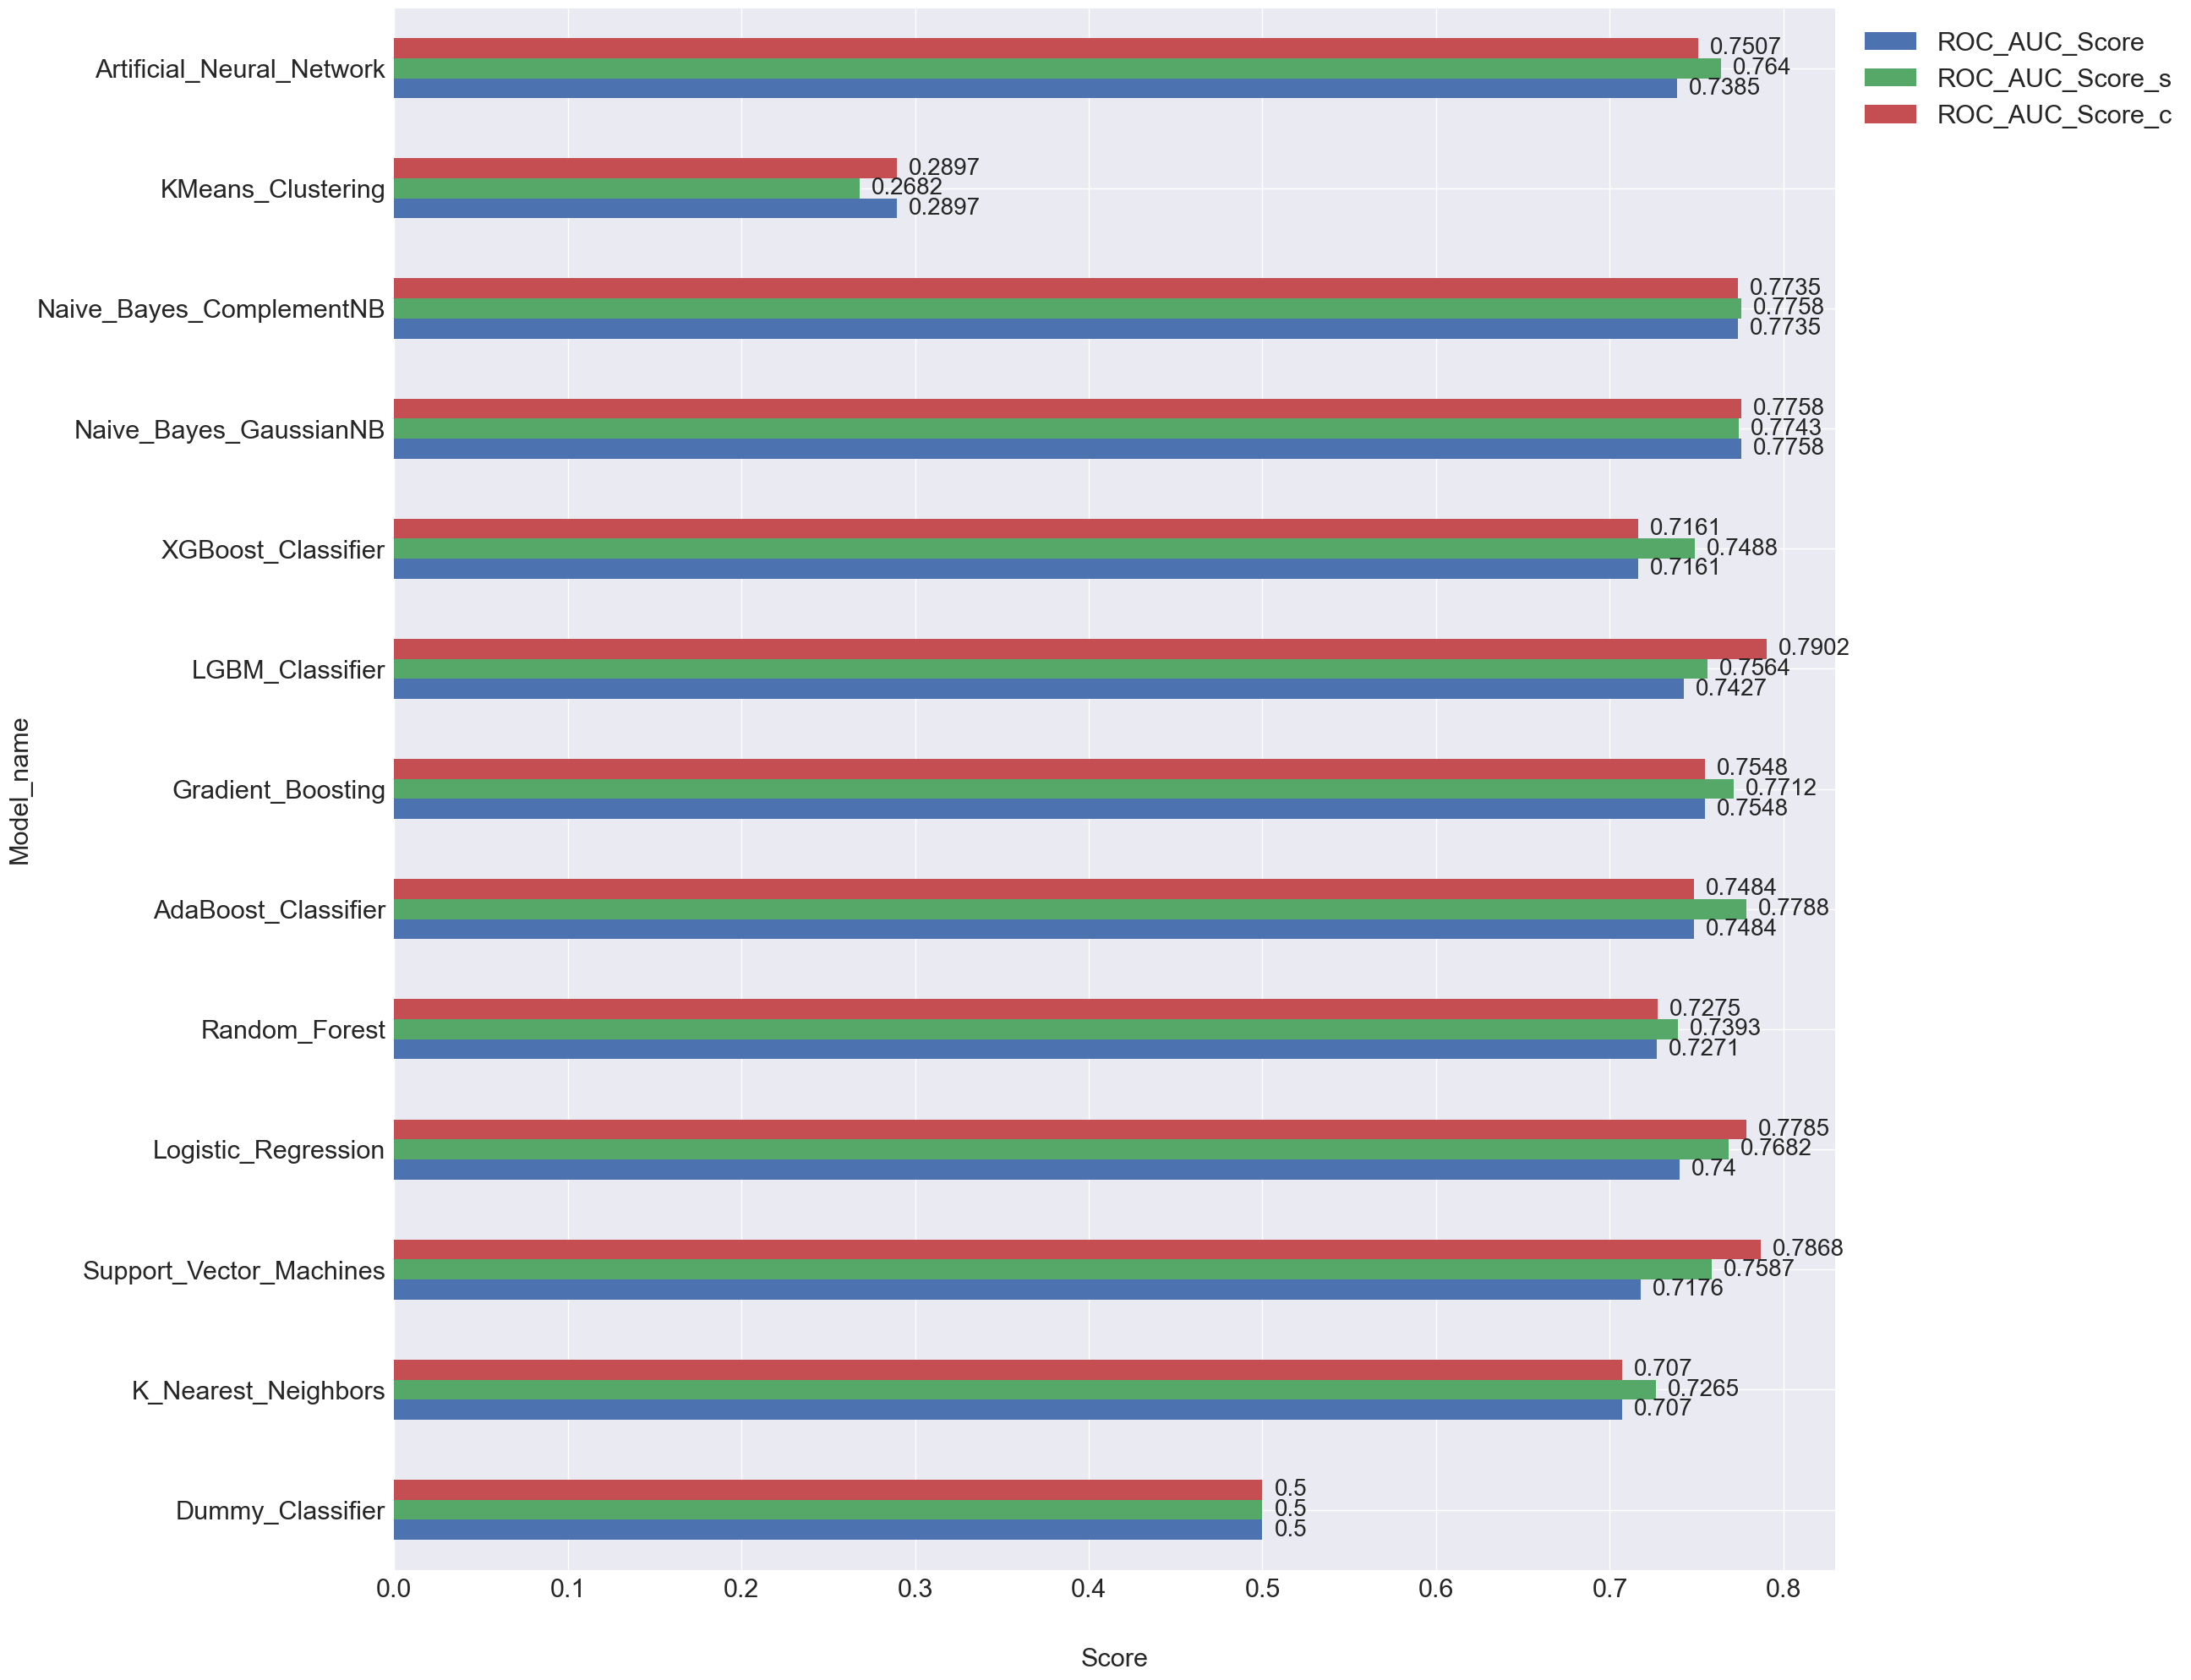

In [150]:
def score_compare_all(y):
    ax = results_final.plot(x = 'Model_name', y = y, 
                            kind = 'barh', figsize=(22,24), fontsize = 22)
    ax.legend(bbox_to_anchor=(1.25, 1.0), fontsize = 22)
    for container in ax.containers:
        ax.bar_label(container, padding = 10, size = 20)
    ax.yaxis.label.set_fontsize(22)
    plt.xlabel('Score', fontsize = 22)
    ax.xaxis.set_label_coords(0.5, -.05)
score_compare_all(['Accuracy', 'Accuracy_s', 'Accuracy_c'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_final_accuracy', bbox_inches='tight')
score_compare_all(['Precision_Score', 'Precision_Score_s', 'Precision_Score_c'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_final_Precision', bbox_inches='tight')
score_compare_all(['Recall_Score', 'Recall_Score_s', 'Recall_Score_c'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_final_Recall', bbox_inches='tight')
score_compare_all(['f1_Score', 'f1_Score_s', 'f1_Score_c'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_final_f1', bbox_inches='tight')
score_compare_all(['ROC_AUC_Score', 'ROC_AUC_Score_s', 'ROC_AUC_Score_c'])
plt.savefig('F:bootcamp/projects/Final project/model_screening_final_roc_auc', bbox_inches='tight')

#### Based on the metrics, Gradient_Boosting classifier was choosen as final model for hyperparameter tuning

### Selected Model - GradientBoosting Classifier

##### For hyperparameter tuning, we need to split our training data again into a set for training and a set for testing the hyperparameters (often called validation set). It is a very common practice to use k-fold cross-validation for hyperparameter tuning. 


In [151]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

In [152]:
# define the RandomizedSearchCV class for trying different parameter combinations
model = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state = 2023),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

In [153]:
# fitting the model for random search 
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=2023),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [80, 90, 100, 110, 115,
                                                         120]})

In [154]:
# print best parameter after tuning
print(model.best_params_)

{'n_estimators': 80, 'min_samples_split': 5, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.075}


In [155]:
# Training data
y_train_pred = model.predict(X_train)
# print classification report 
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3844
           1       0.75      0.64      0.69      1430

    accuracy                           0.85      5274
   macro avg       0.81      0.78      0.79      5274
weighted avg       0.84      0.85      0.84      5274



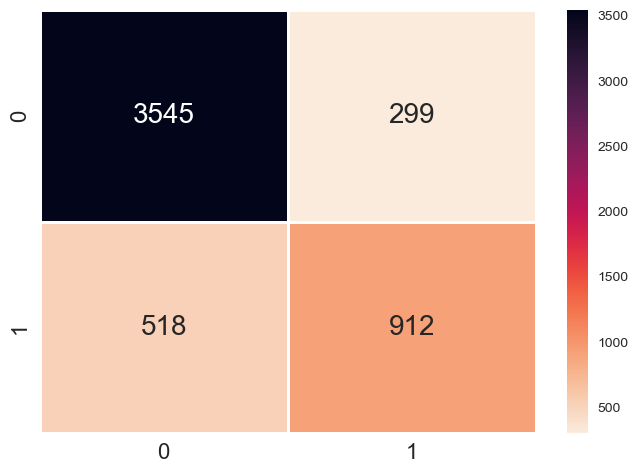

In [156]:
# Confusion_Matrix for train data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
ax = sns.heatmap(confusion_matrix_train, cmap='rocket_r', annot=True, annot_kws={"size": 20}, linewidth=1, fmt='0')
ax.tick_params(axis='both', which='major', labelsize=16)

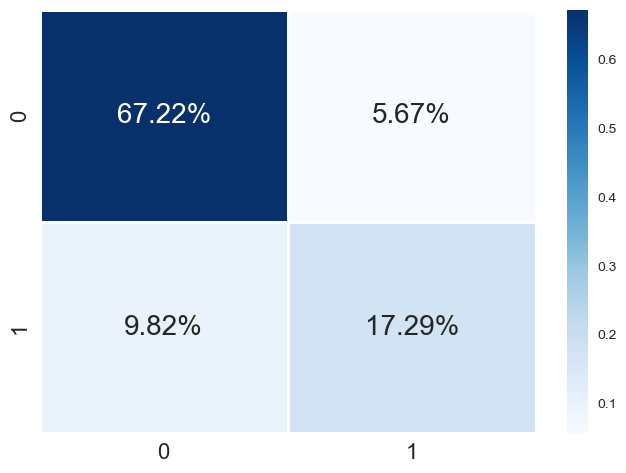

In [157]:
ax = sns.heatmap(confusion_matrix_train/np.sum(confusion_matrix_train), annot=True, annot_kws={"size": 20}, linewidth=1,
            fmt='.2%', cmap='Blues')
ax.tick_params(axis='both', which='major', labelsize=16)

In [158]:
# Test Data
y_test_pred = model.predict(X_test)
# print classification report 
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1319
           1       0.68      0.60      0.64       439

    accuracy                           0.83      1758
   macro avg       0.77      0.75      0.76      1758
weighted avg       0.82      0.83      0.83      1758



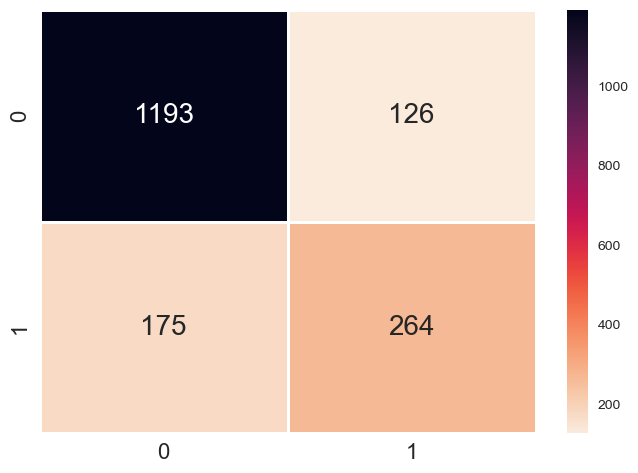

In [159]:
# Confusion_Matrix for test data
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(confusion_matrix_test, cmap='rocket_r', annot=True, annot_kws={"size": 20}, linewidth=1, fmt='0')
ax.tick_params(axis='both', which='major', labelsize=16)

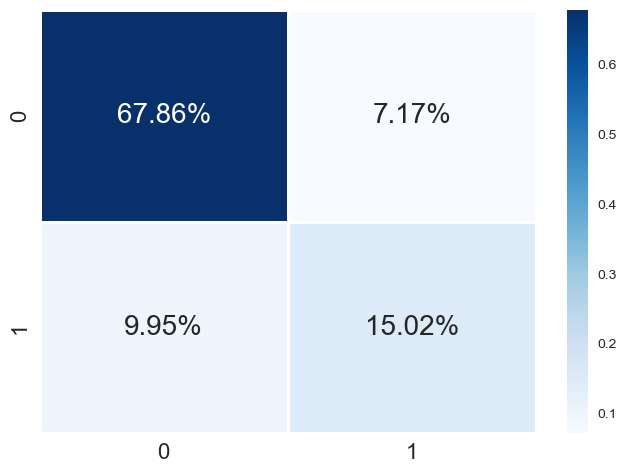

In [160]:
ax = sns.heatmap(confusion_matrix_test/np.sum(confusion_matrix_test), annot=True, annot_kws={"size": 20}, linewidth=1,
            fmt='.2%', cmap='Blues')
ax.tick_params(axis='both', which='major', labelsize=16)

In [161]:
results_accuracy_f = accuracy_score(y_test, y_test_pred)
results_precision_f = precision_score(y_test, y_test_pred)
results_recall_f = recall_score(y_test, y_test_pred)
results_f1_f = f1_score(y_test, y_test_pred)
results_roc_auc_f = roc_auc_score(y_test, y_test_pred)
results_f = pd.DataFrame({'Model_name': 'Gradient_Boosting', 'Accuracy_f': results_accuracy_f, 'Precision_Score_f': results_precision_f,
                        'Recall_Score_f': results_recall_f, 'f1_Score_f': results_f1_f, 'ROC_AUC_Score_f': results_roc_auc_f}, index=[0])
display(results_f)

Model_name  Accuracy_f  Precision_Score_f  Recall_Score_f  \
0  Gradient_Boosting    0.828783           0.676923        0.601367   

   f1_Score_f  ROC_AUC_Score_f  
0    0.636912          0.75292

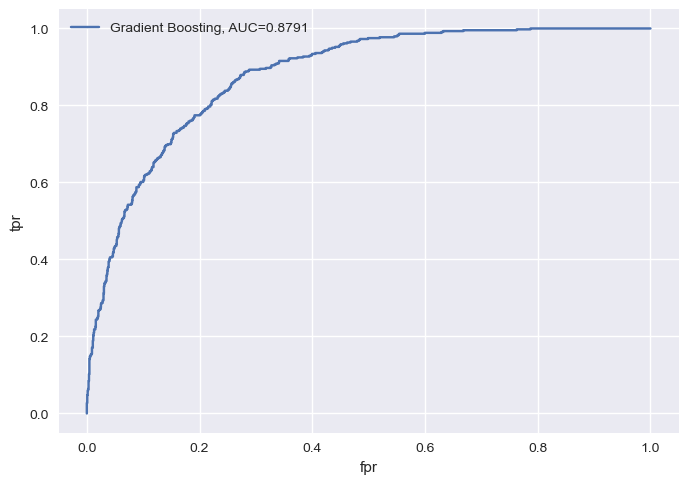

In [162]:
#Plot ROC
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

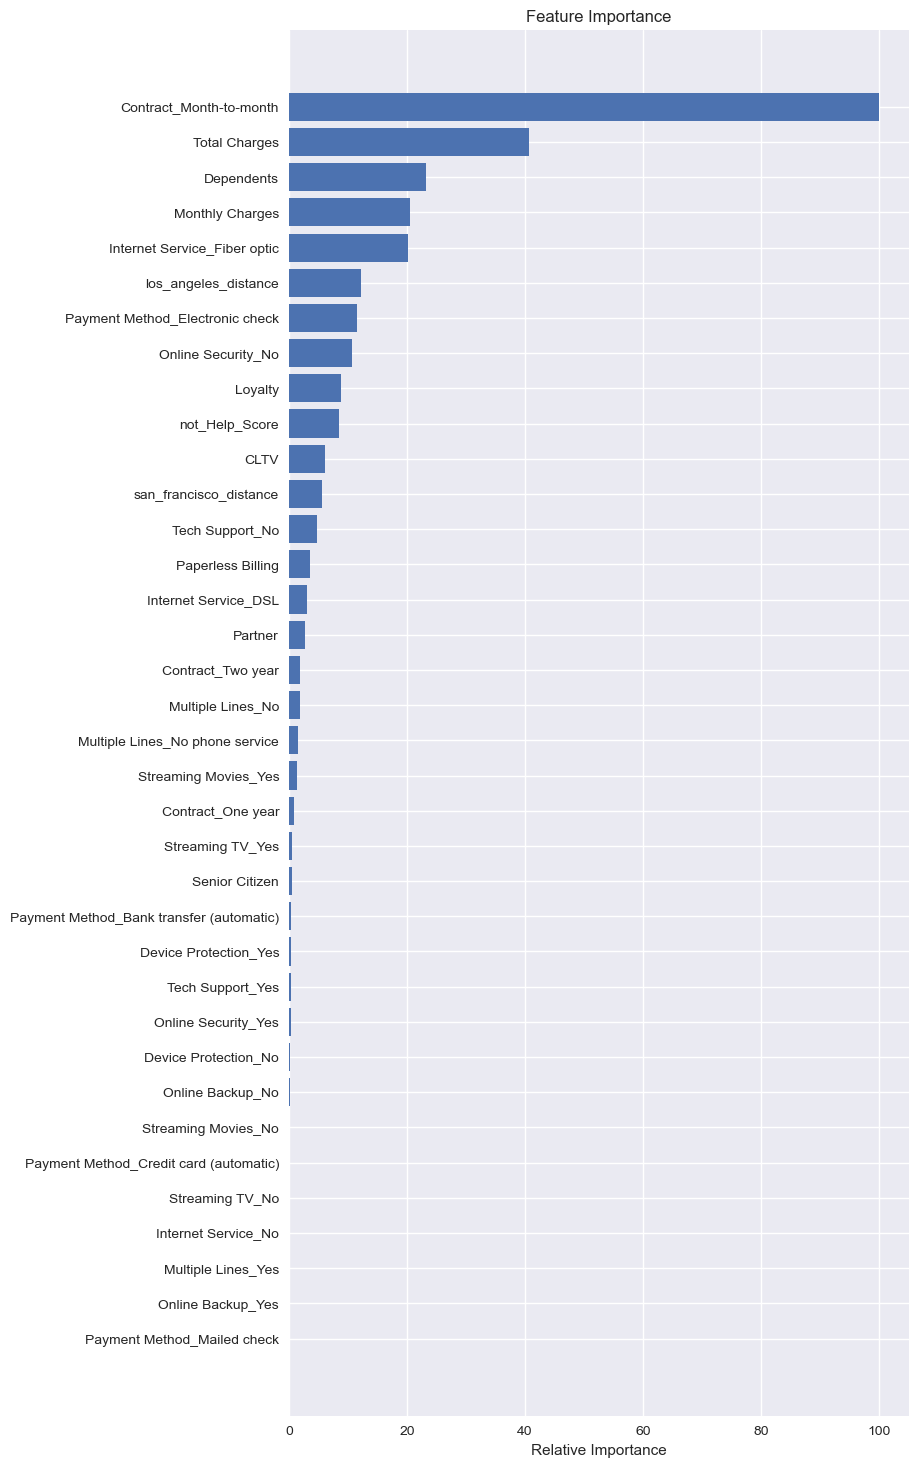

In [163]:
feature_importance = model.best_estimator_.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

## Model Dump

In [164]:
import pickle
# Lets dump our Adaboost model
pickle.dump(model, open('model.pkl','wb'))